### CMS rates hospitals in the US on a scale of 1-5, with the objective of making it easier for patients and consumers to compare the quality of services offered by hospitals.

#### In this project, you will approach the ‘CMS rating problem’ from different angles. You can think of it as ‘re-engineering the CMS rating system’.

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Reading the Dataset

In [2]:
# Reading Data set
df_comp=pd.read_csv('Complications - Hospital.csv')

In [3]:
df_hcahps=pd.read_csv('HCAHPS - Hospital.csv',header=0,encoding = 'unicode_escape')

In [4]:
df_haf = pd.read_csv('Healthcare Associated Infections - Hospital.csv')

In [5]:
df_oie = pd.read_csv('Outpatient Imaging Efficiency - Hospital.csv')

In [6]:
df_rad = pd.read_csv('Readmissions and Deaths - Hospital.csv')

In [7]:
df_tec = pd.read_csv('Timely and Effective Care - Hospital.csv')

In [8]:
df_hgi = pd.read_csv('Hospital General Information.csv',header=0,encoding = 'unicode_escape')

# Data Understanding, Cleaning and Updating

- Keep the rows which has valid Measure ID

In [9]:
measure = ['MORT_30_AMI', 'MORT_30_CABG','MORT_30_COPD','MORT_30_HF','MORT_30_PN','MORT_30_STK','PSI_4_SURG_COMP','HAI_1','HAI_2','HAI_3','HAI_4','HAI_5','HAI_6','COMP_HIP_KNEE','PSI_90_SAFETY','READM_30_AMI','READM_30_CABG','READM_30_COPD','READM_30_HF','READM_30_HIP_KNEE','READM_30_PN','READM_30_STK','READM_30_HOSP_WIDE','H_CLEAN_HSP','H_COMP_1','H_COMP_2','H_COMP_3','H_COMP_4','H_COMP_5','H_COMP_6','H_HSP_RATING','H_QUIET_HSP','H_RECMND','H_COMP_7','CAC_3','IMM_2','IMM_3','OP_4','OP_22','OP_23','PC_01','STK_1','STK_4','STK_6','STK_8','VTE_1','VTE_2','VTE_3','VTE_5','VTE_6','ED_1b','ED_2b','OP_3','OP_5','OP_18b','OP_20','OP_21','OP_8','OP_10','OP_11','OP_13','OP_14'] 

-Let's check the shape

In [10]:
df_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52998 entries, 0 to 52997
Data columns (total 18 columns):
Provider ID             52998 non-null int64
Hospital Name           52998 non-null object
Address                 52998 non-null object
City                    52998 non-null object
State                   52998 non-null object
ZIP Code                52998 non-null int64
County Name             52833 non-null object
Phone Number            52998 non-null int64
Measure Name            52998 non-null object
Measure ID              52998 non-null object
Compared to National    52998 non-null object
Denominator             52998 non-null object
Score                   52998 non-null object
Lower Estimate          52998 non-null object
Higher Estimate         52998 non-null object
Footnote                21874 non-null object
Measure Start Date      52998 non-null object
Measure End Date        52998 non-null object
dtypes: int64(3), object(15)
memory usage: 7.3+ MB


- Let's remove the not required columns and keep only Provider ID and Measure ID

In [11]:
df_comp = df_comp[['Provider ID','Measure ID','Score']]

- Remove the rows where Measure ID is blank

In [12]:
df_comp = df_comp[pd.notnull(df_comp['Measure ID'])]

- Check the different Measure present

In [13]:
df_comp.groupby(['Measure ID']).size().reset_index(name='counts')

,Measure ID,counts
0,COMP_HIP_KNEE,4818
1,PSI_12_POSTOP_PULMEMB_DVT,4818
2,PSI_13_POST_SEPSIS,4818
3,PSI_14_POSTOP_DEHIS,4818
4,PSI_15_ACC_LAC,4818
5,PSI_3_ULCER,4818
6,PSI_4_SURG_COMP,4818
7,PSI_6_IAT_PTX,4818
8,PSI_7_CVCBI,4818
9,PSI_8_POST_HIP,4818


Filter the values which have valid measure values

In [14]:
df_comp = df_comp.loc[df_comp['Measure ID'].isin(measure)]

In [15]:
df_comp.shape

(14454, 3)

- Remove Duplicate rows

In [16]:
df_comp.drop_duplicates(keep='first',inplace=True)
df_comp.shape

(14454, 3)

Pivot the table, to get the unique row for Provider ID

In [17]:
df5 = df_comp.pivot(index='Provider ID',columns='Measure ID', values = 'Score')
df5.head()

Measure ID,COMP_HIP_KNEE,PSI_4_SURG_COMP,PSI_90_SAFETY
Provider ID,,,
10001,3.8,168.26,0.68
10005,3.0,179.05,0.85
10006,3.8,198.33,0.91
10007,Not Available,Not Available,0.79
10008,Not Available,Not Available,0.90


In [18]:
df5.shape

(4818, 3)

In [19]:
df_hcahps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264990 entries, 0 to 264989
Data columns (total 22 columns):
Provider ID                              264990 non-null int64
Hospital Name                            264990 non-null object
Address                                  264990 non-null object
City                                     264990 non-null object
State                                    264990 non-null object
ZIP Code                                 264990 non-null int64
County Name                              264165 non-null object
Phone Number                             264990 non-null int64
HCAHPS Measure ID                        264990 non-null object
HCAHPS Question                          264990 non-null object
HCAHPS Answer Description                264990 non-null object
Patient Survey Star Rating               264990 non-null object
Patient Survey Star Rating Footnote      15720 non-null object
HCAHPS Answer Percent                    264990 non-null obje

- Let's keep Provider ID and Measure ID 

In [20]:
df_hcahps = df_hcahps[['Provider ID','HCAHPS Measure ID','HCAHPS Linear Mean Value']]

- Remove the Null rows

In [21]:
df_hcahps = df_hcahps[pd.notnull(df_hcahps['HCAHPS Measure ID'])]

Check the various Measures prersent in the table

In [22]:
df_hcahps.groupby(['HCAHPS Measure ID']).size().reset_index(name='counts')

,HCAHPS Measure ID,counts
0,H_CLEAN_HSP_A_P,4818
1,H_CLEAN_HSP_SN_P,4818
2,H_CLEAN_HSP_U_P,4818
3,H_CLEAN_LINEAR_SCORE,4818
4,H_CLEAN_STAR_RATING,4818
5,H_COMP_1_A_P,4818
6,H_COMP_1_LINEAR_SCORE,4818
7,H_COMP_1_SN_P,4818
8,H_COMP_1_STAR_RATING,4818
9,H_COMP_1_U_P,4818


Remove the extra information present in Measure field

In [23]:
df_hcahps = df_hcahps.replace(['H_CLEAN_HSP_A_P','H_CLEAN_HSP_SN_P','H_CLEAN_HSP_U_P','H_CLEAN_LINEAR_SCORE','H_CLEAN_STAR_RATING'],'H_CLEAN_HSP')

In [24]:
df_hcahps = df_hcahps.replace(['H_COMP_1_A_P','H_COMP_1_LINEAR_SCORE','H_COMP_1_SN_P','H_COMP_1_STAR_RATING','H_COMP_1_U_P'],'H_COMP_1')

In [25]:
df_hcahps = df_hcahps.replace(['H_COMP_2_A_P','H_COMP_2_LINEAR_SCORE','H_COMP_2_SN_P','H_COMP_2_STAR_RATING','H_COMP_2_U_P'],'H_COMP_2')

In [26]:
df_hcahps = df_hcahps.replace(['H_COMP_3_A_P','H_COMP_3_LINEAR_SCORE','H_COMP_3_SN_P','H_COMP_3_STAR_RATING','H_COMP_3_U_P'],'H_COMP_3')

In [27]:
df_hcahps = df_hcahps.replace(['H_COMP_4_A_P','H_COMP_4_LINEAR_SCORE','H_COMP_4_SN_P','H_COMP_4_STAR_RATING','H_COMP_4_U_P'],'H_COMP_4')

In [28]:
df_hcahps = df_hcahps.replace(['H_COMP_5_A_P','H_COMP_5_LINEAR_SCORE','H_COMP_5_SN_P','H_COMP_5_STAR_RATING','H_COMP_5_U_P'],'H_COMP_5')

In [29]:
df_hcahps = df_hcahps.replace(['H_COMP_6_LINEAR_SCORE','H_COMP_6_N_P','H_COMP_6_STAR_RATING','H_COMP_6_Y_P'],'H_COMP_6')

In [30]:
df_hcahps = df_hcahps.replace(['H_COMP_7_A','H_COMP_7_D_SD','H_COMP_7_LINEAR_SCORE','H_COMP_7_SA','H_COMP_7_STAR_RATING'],'H_COMP_7')

In [31]:
df_hcahps = df_hcahps.replace(['H_HSP_RATING_0_6','H_HSP_RATING_7_8','H_HSP_RATING_9_10','H_HSP_RATING_LINEAR_SCORE','H_HSP_RATING_STAR_RATING'],'H_HSP_RATING')

In [32]:
df_hcahps = df_hcahps.replace(['H_QUIET_HSP_A_P','H_QUIET_HSP_SN_P','H_QUIET_HSP_U_P','H_QUIET_LINEAR_SCORE','H_QUIET_STAR_RATING'],'H_QUIET_HSP')

In [33]:
df_hcahps = df_hcahps.replace(['H_RECMND_DN','H_RECMND_DY','H_RECMND_LINEAR_SCORE','H_RECMND_PY','H_RECMND_STAR_RATING'],'H_RECMND')

- Let's filter the table with the valid measure values

In [34]:
df_hcahps = df_hcahps.loc[df_hcahps['HCAHPS Measure ID'].isin(measure)]

Remove the Duplicate Rows

In [35]:
df_hcahps = df_hcahps.drop_duplicates(subset=['Provider ID', 'HCAHPS Measure ID'], keep='first')

- Check the shape of the table

In [36]:
df_hcahps.shape

(52998, 3)

In [37]:
df_hcahps = df_hcahps.rename(columns = {"HCAHPS Measure ID": "Measure ID"}) 

In [38]:
df_hcahps.groupby(['Measure ID']).size().reset_index(name='counts')

,Measure ID,counts
0,H_CLEAN_HSP,4818
1,H_COMP_1,4818
2,H_COMP_2,4818
3,H_COMP_3,4818
4,H_COMP_4,4818
5,H_COMP_5,4818
6,H_COMP_6,4818
7,H_COMP_7,4818
8,H_HSP_RATING,4818
9,H_QUIET_HSP,4818


Pivot the table, to get unique value for Provider ID

In [39]:
df9 = df_hcahps.pivot(index='Provider ID',columns='Measure ID', values = 'HCAHPS Linear Mean Value')
df9.head()

Measure ID,H_CLEAN_HSP,H_COMP_1,H_COMP_2,H_COMP_3,H_COMP_4,H_COMP_5,H_COMP_6,H_COMP_7,H_HSP_RATING,H_QUIET_HSP,H_RECMND
Provider ID,,,,,,,,,,,
10001,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,87,Not Applicable,Not Applicable,Not Applicable,Not Applicable
10005,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,88,Not Applicable,Not Applicable,Not Applicable,Not Applicable
10006,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,83,Not Applicable,Not Applicable,Not Applicable,Not Applicable
10007,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,86,Not Applicable,Not Applicable,Not Applicable,Not Applicable
10008,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Available,Not Applicable,Not Applicable,Not Applicable,Not Applicable


In [40]:
df9.shape

(4818, 11)

In [41]:
df_haf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231264 entries, 0 to 231263
Data columns (total 15 columns):
Provider ID             231264 non-null int64
Hospital Name           231264 non-null object
Address                 231264 non-null object
City                    231264 non-null object
State                   231264 non-null object
ZIP Code                231264 non-null int64
County Name             230544 non-null object
Phone Number            231264 non-null int64
Measure Name            231264 non-null object
Measure ID              231264 non-null object
Compared to National    38544 non-null object
Score                   231264 non-null object
Footnote                103373 non-null object
Measure Start Date      231264 non-null object
Measure End Date        231264 non-null object
dtypes: int64(3), object(12)
memory usage: 26.5+ MB


Keep Provider ID and Measure ID column and remove other columns 

In [42]:
df_haf = df_haf[['Provider ID','Measure ID','Score']]
df_haf.shape

(231264, 3)

Check the values of Measaure ID in the table

In [43]:
df_haf.groupby(['Measure ID']).size().reset_index(name='counts')

,Measure ID,counts
0,HAI_1_CI_LOWER,4818
1,HAI_1_CI_UPPER,4818
2,HAI_1_DOPC_DAYS,4818
3,HAI_1_ELIGCASES,4818
4,HAI_1_NUMERATOR,4818
5,HAI_1_SIR,4818
6,HAI_1a_CI_LOWER,4818
7,HAI_1a_CI_UPPER,4818
8,HAI_1a_DOPC_DAYS,4818
9,HAI_1a_ELIGCASES,4818


Remove the extra information present in the field value

In [44]:
df_haf = df_haf.replace(['HAI_1_CI_LOWER','HAI_1_CI_UPPER','HAI_1_DOPC_DAYS','HAI_1_ELIGCASES','HAI_1_NUMERATOR','HAI_1_SIR','HAI_1a_CI_LOWER','HAI_1a_CI_UPPER','HAI_1a_DOPC_DAYS','HAI_1a_ELIGCASES','HAI_1a_NUMERATOR','HAI_1a_SIR'],'HAI_1')

In [45]:
df_haf = df_haf.replace(['HAI_2_CI_LOWER','HAI_2_CI_UPPER','HAI_2_DOPC_DAYS','HAI_2_ELIGCASES','HAI_2_NUMERATOR','HAI_2_SIR','HAI_2a_CI_LOWER','HAI_2a_CI_UPPER','HAI_2a_DOPC_DAYS','HAI_2a_ELIGCASES','HAI_2a_NUMERATOR','HAI_2a_SIR'],'HAI_2')

In [46]:
df_haf = df_haf.replace(['HAI_3_CI_LOWER','HAI_3_CI_UPPER','HAI_3_DOPC_DAYS','HAI_3_ELIGCASES','HAI_3_NUMERATOR','HAI_3_SIR'],'HAI_3')

In [47]:
df_haf = df_haf.replace(['HAI_4_CI_LOWER','HAI_4_CI_UPPER','HAI_4_DOPC_DAYS','HAI_4_ELIGCASES','HAI_4_NUMERATOR','HAI_4_SIR'],'HAI_4')

In [48]:
df_haf = df_haf.replace(['HAI_5_CI_LOWER','HAI_5_CI_UPPER','HAI_5_DOPC_DAYS','HAI_5_ELIGCASES','HAI_5_NUMERATOR','HAI_5_SIR'],'HAI_5')

In [49]:
df_haf = df_haf.replace(['HAI_6_CI_LOWER','HAI_6_CI_UPPER','HAI_6_DOPC_DAYS','HAI_6_ELIGCASES','HAI_6_NUMERATOR','HAI_6_SIR'],'HAI_6')

- let remove duplicate and null rows

In [50]:
df_haf = df_haf[pd.notnull(df_haf['Measure ID'])]
#df_haf.drop_duplicates(keep='first',inplace=True)
df_haf = df_haf.drop_duplicates(subset=['Provider ID', 'Measure ID'], keep='first')

Filter the value with Measure filed values

In [51]:
df_haf = df_haf.loc[df_haf['Measure ID'].isin(measure)]

In [52]:
df_haf.shape

(28908, 3)

- Pivot the table, to get unique row for Provider ID

In [53]:
df10 = df_haf.pivot(index='Provider ID',columns='Measure ID', values = 'Score')
df10.head()

Measure ID,HAI_1,HAI_2,HAI_3,HAI_4,HAI_5,HAI_6
Provider ID,,,,,,
10001,1.03,0.974,0.95,Not Available,0.107,0.562
10005,0.337,0.167,0.019,Not Available,0.233,0.177
10006,0.138,0.373,0.016,Not Available,0.401,0.309
10007,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
10008,Not Available,Not Available,Not Available,Not Available,Not Available,0.029


In [54]:
df10.shape

(4818, 6)

In [55]:
df_oie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28908 entries, 0 to 28907
Data columns (total 14 columns):
Provider ID           28908 non-null int64
Hospital Name         28908 non-null object
Address               28908 non-null object
City                  28908 non-null object
State                 28908 non-null object
ZIP Code              28908 non-null int64
County Name           28818 non-null object
Phone Number          28908 non-null int64
Measure ID            28908 non-null object
Measure Name          28908 non-null object
Score                 28908 non-null object
Footnote              12595 non-null object
Measure Start Date    28908 non-null object
Measure End Date      28908 non-null object
dtypes: int64(3), object(11)
memory usage: 3.1+ MB


Keep Provider ID and Measure ID columns

In [56]:
df_oie = df_oie[['Provider ID','Measure ID','Score']]
df_oie.shape

(28908, 3)

Validate the valid values of the table

In [57]:
df_oie.groupby(['Measure ID']).size().reset_index(name='counts')

,Measure ID,counts
0,OP_10,4818
1,OP_11,4818
2,OP_13,4818
3,OP_14,4818
4,OP_8,4818
5,OP_9,4818


Filter the valid Measures

In [58]:
df_oie = df_oie.loc[df_oie['Measure ID'].isin(measure)]

Remove the Null and Duplicate Values

In [59]:
df_oie = df_oie[pd.notnull(df_oie['Measure ID'])]
df_oie.drop_duplicates(keep='first',inplace=True)

In [60]:
df_oie.shape

(24090, 3)

Pivot the table to get the unique row for the Provider id

In [61]:
df6 = df_oie.pivot(index='Provider ID',columns='Measure ID', values = 'Score')
df6.head()

Measure ID,OP_10,OP_11,OP_13,OP_14,OP_8
Provider ID,,,,,
10001,6.4,0.9,7.1,2.4,38.1
10005,13.3,10.2,5.3,4.0,42.8
10006,11.8,4.6,0.0,4.6,45.6
10007,24.3,6.1,Not Available,Not Available,Not Available
10008,3.6,Not Available,Not Available,0.6,Not Available


In [62]:
df6.shape

(4818, 5)

In [63]:
df_rad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67452 entries, 0 to 67451
Data columns (total 18 columns):
Provider ID             67452 non-null int64
Hospital Name           67452 non-null object
Address                 67452 non-null object
City                    67452 non-null object
State                   67452 non-null object
ZIP Code                67452 non-null int64
County Name             67242 non-null object
Phone Number            67452 non-null int64
Measure Name            67452 non-null object
Measure ID              67452 non-null object
Compared to National    67452 non-null object
Denominator             67452 non-null object
Score                   67452 non-null object
Lower Estimate          67452 non-null object
Higher Estimate         67452 non-null object
Footnote                25742 non-null object
Measure Start Date      67452 non-null object
Measure End Date        67452 non-null object
dtypes: int64(3), object(15)
memory usage: 9.3+ MB


Remove columns other than Provider and Measure ID

In [64]:
df_rad = df_rad[['Provider ID','Measure ID','Score']]
df_rad.shape

(67452, 3)

Validate the values of the  table

In [65]:
df_rad.groupby(['Measure ID']).size().reset_index(name='counts')

,Measure ID,counts
0,MORT_30_AMI,4818
1,MORT_30_CABG,4818
2,MORT_30_COPD,4818
3,MORT_30_HF,4818
4,MORT_30_PN,4818
5,MORT_30_STK,4818
6,READM_30_AMI,4818
7,READM_30_CABG,4818
8,READM_30_COPD,4818
9,READM_30_HF,4818


Filter the table with valid values

In [66]:
df_rad = df_rad.loc[df_rad['Measure ID'].isin(measure)]

Remove the Null and Duplicate values

In [67]:
df_rad = df_rad[pd.notnull(df_rad['Measure ID'])]
df_rad.drop_duplicates(keep='first',inplace=True)
df_rad.shape

(67452, 3)

Pivot the table, to get unique row for Provider ID

In [68]:
df7 = df_rad.pivot(index='Provider ID',columns='Measure ID', values = 'Score')
df7.head()

Measure ID,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK
Provider ID,,,,,,,,,,,,,,
10001,12.5,4.2,9.3,12.4,15.5,15.4,16.5,15.1,21.1,21.4,5.1,15.4,18.7,12.7
10005,16.0,Not Available,7.6,15.5,20.8,15.5,16.7,Not Available,18.0,21.9,5.7,14.9,16.4,13.4
10006,16.7,4.1,7.1,15.6,18.2,17.9,16.1,15.2,19.8,20.6,5.0,15.4,17.9,12.0
10007,Not Available,Not Available,9.3,14.4,18.8,16.6,Not Available,Not Available,19.9,21.1,Not Available,16.6,17.3,12.7
10008,Not Available,Not Available,8.2,12.7,15.7,Not Available,Not Available,Not Available,19.2,23.1,Not Available,15.7,16.0,Not Available


In [69]:
df7.shape

(4818, 14)

In [70]:
df_tec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207174 entries, 0 to 207173
Data columns (total 16 columns):
Provider ID           207174 non-null int64
Hospital Name         207174 non-null object
Address               207174 non-null object
City                  207174 non-null object
State                 207174 non-null object
ZIP Code              207174 non-null int64
County Name           206529 non-null object
Phone Number          207174 non-null int64
Condition             207174 non-null object
Measure ID            207174 non-null object
Measure Name          207174 non-null object
Score                 207174 non-null object
Sample                202356 non-null object
Footnote              160185 non-null object
Measure Start Date    207174 non-null object
Measure End Date      207174 non-null object
dtypes: int64(3), object(13)
memory usage: 25.3+ MB


Keep Provider ID and Measure ID columns and remove other information

In [71]:
df_tec = df_tec[['Provider ID','Measure ID','Score']]
df_tec.shape

(207174, 3)

Validate the value for Measure column

In [72]:
df_tec.groupby(['Measure ID']).size().reset_index(name='counts')

,Measure ID,counts
0,AMI_7a,4818
1,AMI_8a,4818
2,CAC_3,4818
3,EDV,4818
4,ED_1b,4818
5,ED_2b,4818
6,HF_2,4818
7,IMM_2,4818
8,IMM_3_OP_27_FAC_ADHPCT,4818
9,OP_1,4818


Remove the extra information from the value

In [73]:
df_tec = df_tec.replace(['IMM_3_OP_27_FAC_ADHPCT'],'IMM_3')

In [74]:
df_tec = df_tec.replace(['OP_3b'],'OP_3')

Remove the Null and duplicate values

In [75]:
df_tec = df_tec[pd.notnull(df_tec['Measure ID'])]
df_tec.drop_duplicates(keep='first',inplace=True)
df_tec.shape

(207174, 3)

In [76]:
df_tec = df_tec.loc[df_tec['Measure ID'].isin(measure)]

Pivot the table to get the unique row for Provider ID

In [77]:
df8 = df_tec.pivot(index='Provider ID',columns='Measure ID', values = 'Score')
df8.head()

Measure ID,CAC_3,ED_1b,ED_2b,IMM_2,IMM_3,OP_18b,OP_20,OP_21,OP_22,OP_23,...,PC_01,STK_1,STK_4,STK_6,STK_8,VTE_1,VTE_2,VTE_3,VTE_5,VTE_6
Provider ID,,,,,,,,,,,,,,,,,,,,,
10001,Not Available,269,68,97,81,196,65,99,4,Not Available,...,0,99,67,99,87,97,99,91,90,0
10005,Not Available,243,71,99,83,117,27,60,2,86,...,1,98,Not Available,88,100,95,94,100,100,Not Available
10006,Not Available,217,78,100,87,133,10,58,1,Not Available,...,0,99,Not Available,97,90,98,89,86,92,0
10007,Not Available,219,68,99,53,119,38,90,1,Not Available,...,Not Available,80,Not Available,71,Not Available,97,99,Not Available,Not Available,Not Available
10008,Not Available,180,56,95,43,98,27,49,1,Not Available,...,Not Available,Not Available,Not Available,Not Available,Not Available,99,Not Available,Not Available,Not Available,Not Available


In [78]:
df8.shape

(4818, 23)

- Let's Merge all the dataframe on Provider_ID

In [79]:
df = pd.merge(df5, df6, on='Provider ID', how = 'outer').merge(df7,on='Provider ID', how = 'outer').merge(df8,on='Provider ID', how = 'outer').merge(df9,on='Provider ID', how = 'outer').merge(df10,on='Provider ID', how = 'outer')

In [80]:
df.shape

(4818, 62)

In [81]:
df.head()

Measure ID,COMP_HIP_KNEE,PSI_4_SURG_COMP,PSI_90_SAFETY,OP_10,OP_11,OP_13,OP_14,OP_8,MORT_30_AMI,MORT_30_CABG,...,H_COMP_7,H_HSP_RATING,H_QUIET_HSP,H_RECMND,HAI_1,HAI_2,HAI_3,HAI_4,HAI_5,HAI_6
Provider ID,,,,,,,,,,,,,,,,,,,,,
10001,3.8,168.26,0.68,6.4,0.9,7.1,2.4,38.1,12.5,4.2,...,Not Applicable,Not Applicable,Not Applicable,Not Applicable,1.03,0.974,0.95,Not Available,0.107,0.562
10005,3.0,179.05,0.85,13.3,10.2,5.3,4.0,42.8,16.0,Not Available,...,Not Applicable,Not Applicable,Not Applicable,Not Applicable,0.337,0.167,0.019,Not Available,0.233,0.177
10006,3.8,198.33,0.91,11.8,4.6,0.0,4.6,45.6,16.7,4.1,...,Not Applicable,Not Applicable,Not Applicable,Not Applicable,0.138,0.373,0.016,Not Available,0.401,0.309
10007,Not Available,Not Available,0.79,24.3,6.1,Not Available,Not Available,Not Available,Not Available,Not Available,...,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
10008,Not Available,Not Available,0.90,3.6,Not Available,Not Available,0.6,Not Available,Not Available,Not Available,...,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Available,Not Available,Not Available,Not Available,Not Available,0.029


In [82]:
df_hgi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 28 columns):
Provider ID                                                      4818 non-null int64
Hospital Name                                                    4818 non-null object
Address                                                          4818 non-null object
City                                                             4818 non-null object
State                                                            4818 non-null object
ZIP Code                                                         4818 non-null int64
County Name                                                      4803 non-null object
Phone Number                                                     4818 non-null int64
Hospital Type                                                    4818 non-null object
Hospital Ownership                                               4818 non-null object
Emergency Services                  

Remove the other columns and keep Provider ID and Hospital Rating

In [83]:
df_hgi = df_hgi[['Provider ID','Hospital overall rating']]

Remove the Null and Duplicate rows

In [84]:
df_hgi = df_hgi[pd.notnull(df_hgi['Hospital overall rating'])]
df_hgi.drop_duplicates(keep='first',inplace=True)

In [85]:
df_hgi.shape

(4818, 2)

### Merge the Hospital General Information with Rating and df

In [86]:
df_final =  pd.merge(df_hgi,df, on='Provider ID', how = 'left')

In [87]:
df_final.shape

(4818, 64)

Replace all the values of Not Available and Not Applicable to 0

In [88]:
df_final = df_final.replace(['Not Available','Not Applicable' ],0)

In [89]:
df_final = df_final[df_final['Hospital overall rating'] != 0]
df_final.shape

(3648, 64)

In [90]:
df_final.head()

,Provider ID,Hospital overall rating,COMP_HIP_KNEE,PSI_4_SURG_COMP,PSI_90_SAFETY,OP_10,OP_11,OP_13,OP_14,OP_8,...,H_COMP_7,H_HSP_RATING,H_QUIET_HSP,H_RECMND,HAI_1,HAI_2,HAI_3,HAI_4,HAI_5,HAI_6
0,10001,3,3.8,168.26,0.68,6.4,0.9,7.1,2.4,38.1,...,0,0,0,0,1.03,0.974,0.95,0,0.107,0.562
1,10005,3,3.0,179.05,0.85,13.3,10.2,5.3,4.0,42.8,...,0,0,0,0,0.337,0.167,0.019,0,0.233,0.177
2,10006,2,3.8,198.33,0.91,11.8,4.6,0.0,4.6,45.6,...,0,0,0,0,0.138,0.373,0.016,0,0.401,0.309
3,10007,3,0,0,0.79,24.3,6.1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10008,3,0,0,0.90,3.6,0,0,0.6,0,...,0,0,0,0,0,0,0,0,0,0.029


In [91]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3648 entries, 0 to 4815
Data columns (total 64 columns):
Provider ID                3648 non-null int64
Hospital overall rating    3648 non-null object
COMP_HIP_KNEE              3648 non-null object
PSI_4_SURG_COMP            3648 non-null object
PSI_90_SAFETY              3648 non-null object
OP_10                      3648 non-null object
OP_11                      3648 non-null object
OP_13                      3648 non-null object
OP_14                      3648 non-null object
OP_8                       3648 non-null object
MORT_30_AMI                3648 non-null object
MORT_30_CABG               3648 non-null object
MORT_30_COPD               3648 non-null object
MORT_30_HF                 3648 non-null object
MORT_30_PN                 3648 non-null object
MORT_30_STK                3648 non-null object
READM_30_AMI               3648 non-null object
READM_30_CABG              3648 non-null object
READM_30_COPD              364

Convert Object to int

In [92]:
df_final['Hospital overall rating']  = df_final['Hospital overall rating'].astype(int)

In [93]:
df_final['COMP_HIP_KNEE']  = df_final['COMP_HIP_KNEE'].astype(float)

In [94]:
 df_final['PSI_4_SURG_COMP']  = df_final['PSI_4_SURG_COMP'].astype(float)

In [95]:
df_final['PSI_90_SAFETY']  = df_final['PSI_90_SAFETY'].astype(float)


In [96]:
df_final['OP_10']  = df_final['OP_10'].astype(float)

In [97]:
df_final['OP_11']  = df_final['OP_11'].astype(float)

In [98]:
df_final['OP_13']  = df_final['OP_13'].astype(float)

In [99]:
df_final['OP_14']  = df_final['OP_14'].astype(float)

In [100]:
df_final['OP_8']  = df_final['OP_8'].astype(float)

In [101]:
df_final['MORT_30_AMI']  = df_final['MORT_30_AMI'].astype(float)

In [102]:
df_final['MORT_30_CABG']  = df_final['MORT_30_CABG'].astype(float)

In [103]:
df_final['MORT_30_COPD']  = df_final['MORT_30_COPD'].astype(float)

In [104]:
df_final['MORT_30_HF']  = df_final['MORT_30_HF'].astype(float)

In [105]:
df_final['MORT_30_PN']  = df_final['MORT_30_PN'].astype(float)

In [106]:
df_final['MORT_30_STK']  = df_final['MORT_30_STK'].astype(float)

In [107]:
df_final['READM_30_AMI']  = df_final['READM_30_AMI'].astype(float)

In [108]:
df_final['READM_30_CABG']  = df_final['READM_30_CABG'].astype(float)

In [109]:
df_final['READM_30_COPD']  = df_final['READM_30_COPD'].astype(float)

In [110]:
df_final['READM_30_HF']  = df_final['READM_30_HF'].astype(float)

In [111]:
df_final['READM_30_HIP_KNEE']  = df_final['READM_30_HIP_KNEE'].astype(float)

In [112]:
df_final['READM_30_HOSP_WIDE']  = df_final['READM_30_HOSP_WIDE'].astype(float)

In [113]:
df_final['READM_30_PN']  = df_final['READM_30_PN'].astype(float)

In [114]:
df_final['READM_30_STK']  = df_final['READM_30_STK'].astype(float)

In [115]:
df_final['CAC_3']  = df_final['CAC_3'].astype(float)

In [116]:
df_final['ED_1b']  = df_final['ED_1b'].astype(float)

In [117]:
df_final['ED_2b']  = df_final['ED_2b'].astype(float)

In [118]:
df_final['IMM_2']  = df_final['IMM_2'].astype(float)

In [119]:
df_final['IMM_3']  = df_final['IMM_3'].astype(float)

In [120]:
df_final['OP_18b']  = df_final['OP_18b'].astype(float)

In [121]:
df_final['OP_20']  = df_final['OP_20'].astype(float)

In [122]:
df_final['OP_21']  = df_final['OP_21'].astype(float)

In [123]:
df_final['OP_22']  = df_final['OP_22'].astype(float)

In [124]:
df_final['OP_23']  = df_final['OP_23'].astype(float)

In [125]:
df_final['OP_3']  = df_final['OP_3'].astype(float)

In [126]:
df_final['OP_4']  = df_final['OP_4'].astype(float)

In [127]:
df_final['OP_5']  = df_final['OP_5'].astype(float)

In [128]:
df_final['PC_01']  = df_final['PC_01'].astype(float)

In [129]:
df_final['STK_1']  = df_final['STK_1'].astype(float)

In [130]:
df_final['STK_4']  = df_final['STK_4'].astype(float)

In [131]:
df_final['STK_6']  = df_final['STK_6'].astype(float)

In [132]:
df_final['STK_8']  = df_final['STK_8'].astype(float)

In [133]:
df_final['VTE_1']  = df_final['VTE_1'].astype(float)

In [134]:
df_final['VTE_2']  = df_final['VTE_2'].astype(float)

In [135]:
df_final['VTE_3']  = df_final['VTE_3'].astype(float)

In [136]:
df_final['VTE_5']  = df_final['VTE_5'].astype(float)

In [137]:
df_final['VTE_6']  = df_final['VTE_6'].astype(float)

In [138]:
df_final['H_COMP_6']  = df_final['H_COMP_6'].astype(float)

In [139]:
df_final['HAI_1']  = df_final['HAI_1'].astype(float)

In [140]:
df_final['HAI_2']  = df_final['HAI_2'].astype(float)

In [141]:
df_final['HAI_3']  = df_final['HAI_3'].astype(float)

In [142]:
df_final['HAI_4']  = df_final['HAI_4'].astype(float)

In [143]:
df_final['HAI_5']  = df_final['HAI_5'].astype(float)

In [144]:
df_final['HAI_6']  = df_final['HAI_6'].astype(float)

# Perform EDA for Analysis

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Text(0,0.5,'Count')

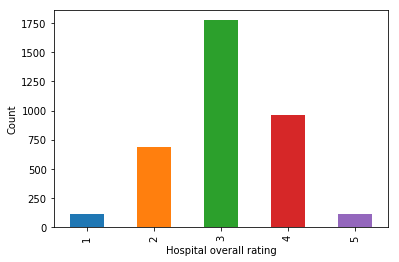

In [146]:
df_final.groupby('Hospital overall rating').size().plot(kind='bar')
plt.ylabel('Count')

- Co-relation among the Variables

In [147]:
cor = df_final.corr().abs()

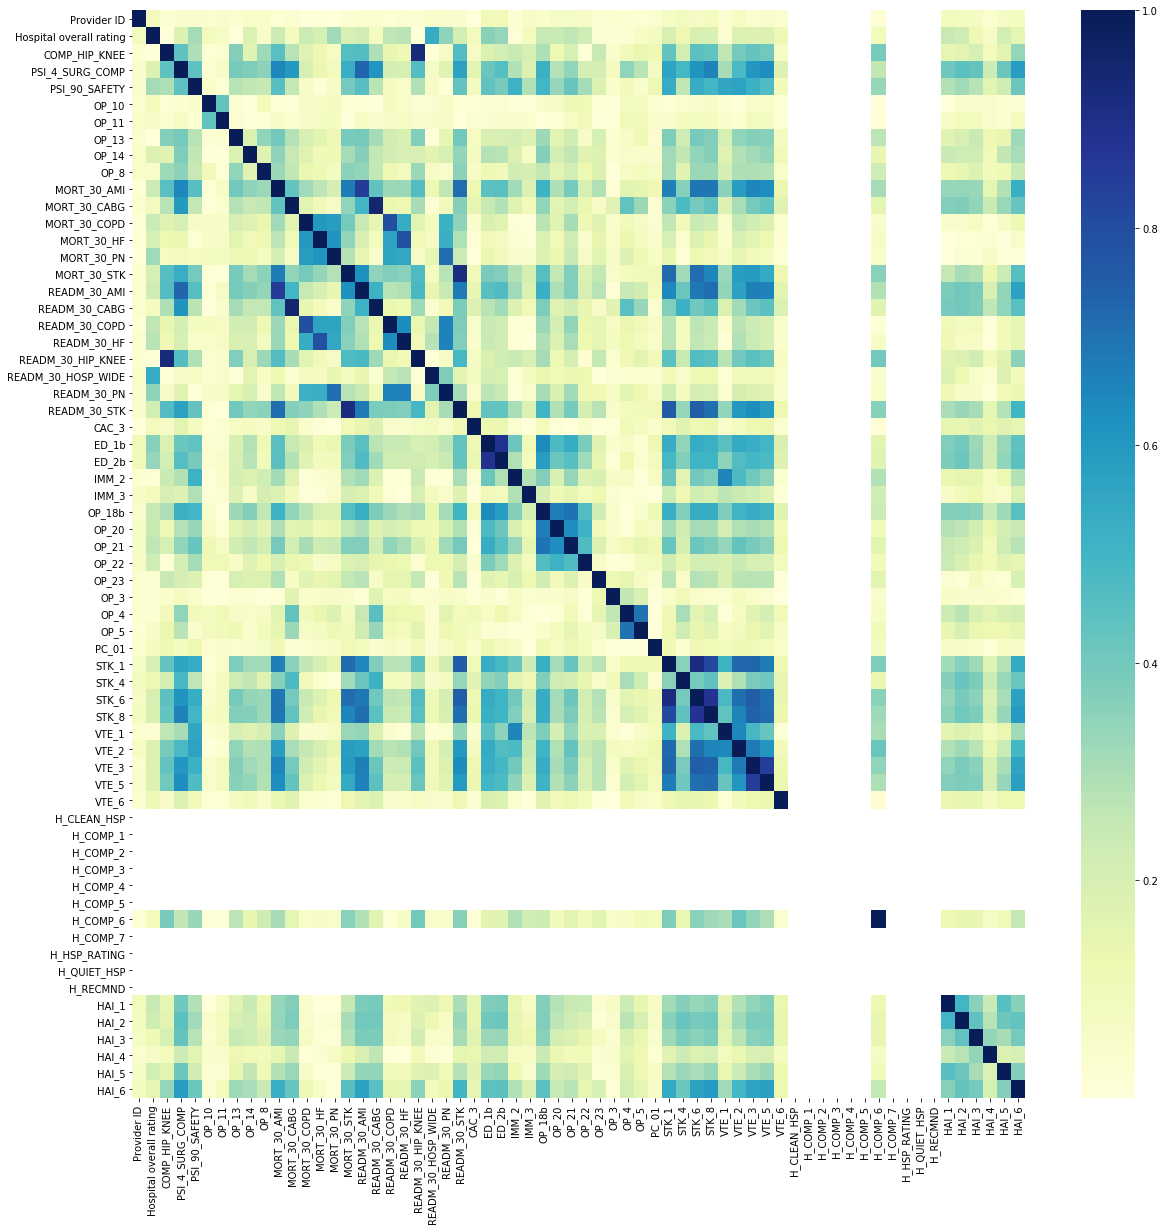

In [148]:
plt.figure(figsize=(20,20))

# heatmap
sns.heatmap(cor, cmap="YlGnBu")
plt.show()

- Describe the data frame and validate the outliners

In [149]:
df_des = df_final.drop(['Provider ID','Hospital overall rating'], axis=1)

In [150]:
df_des.describe()

,COMP_HIP_KNEE,PSI_4_SURG_COMP,PSI_90_SAFETY,OP_10,OP_11,OP_13,OP_14,OP_8,MORT_30_AMI,MORT_30_CABG,...,H_COMP_7,H_HSP_RATING,H_QUIET_HSP,H_RECMND,HAI_1,HAI_2,HAI_3,HAI_4,HAI_5,HAI_6
count,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,...,3648.0,3648.0,3648.0,3648.0,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000
mean,2.203755,68.123251,0.742955,8.099671,2.703043,2.849644,1.739391,16.577522,9.179057,0.946080,...,0.0,0.0,0.0,0.0,0.139307,0.156398,0.189988,0.053274,0.166538,0.418575
std,1.442945,69.616229,0.369000,9.599056,5.391218,2.768345,1.982042,20.251109,6.772885,1.572723,...,0.0,0.0,0.0,0.0,0.239604,0.238404,0.347217,0.186803,0.355601,0.391996
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.700000,2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.017000
50%,2.700000,0.000000,0.840000,5.300000,0.600000,3.000000,1.300000,0.000000,13.200000,0.000000,...,0.0,0.0,0.0,0.0,0.009000,0.031000,0.000000,0.000000,0.000000,0.372000
75%,3.200000,135.487500,0.940000,9.600000,2.800000,5.000000,2.900000,37.925000,14.400000,2.400000,...,0.0,0.0,0.0,0.0,0.209000,0.237000,0.258250,0.000000,0.185000,0.697250
max,6.000000,212.160000,2.140000,82.600000,56.300000,13.600000,14.000000,63.400000,20.000000,8.300000,...,0.0,0.0,0.0,0.0,2.460000,2.937000,2.650000,1.953000,4.430000,2.399000


In [151]:
df_out = df_final.drop(['Provider ID'], axis = 1)

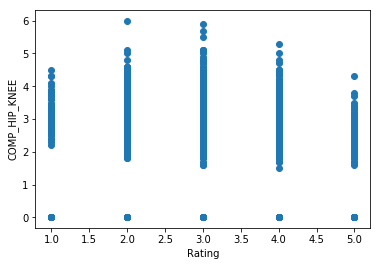

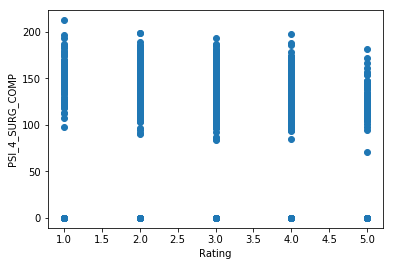

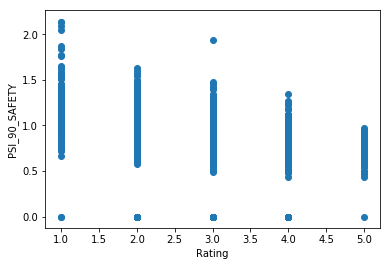

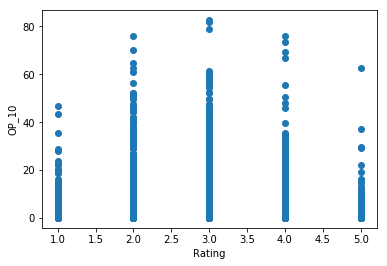

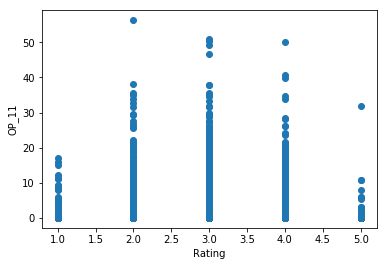

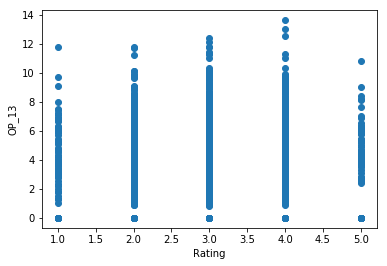

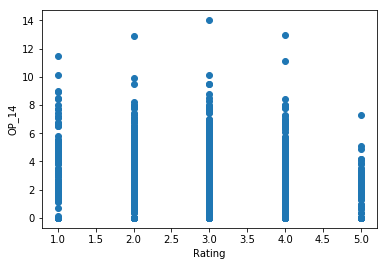

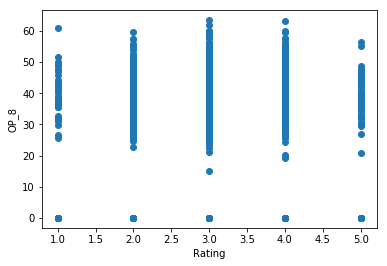

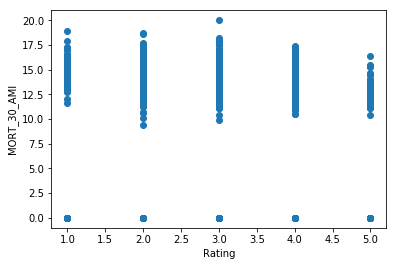

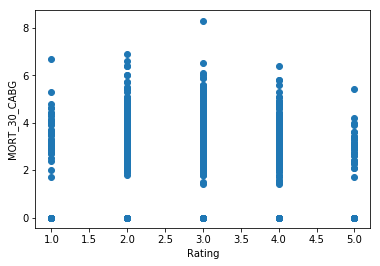

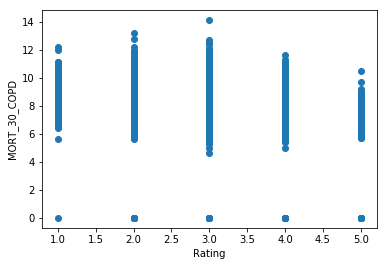

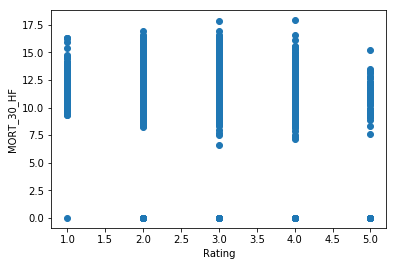

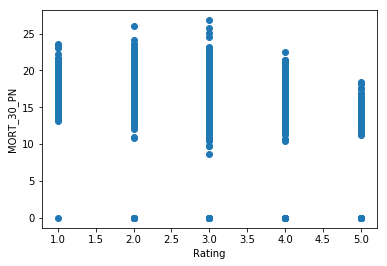

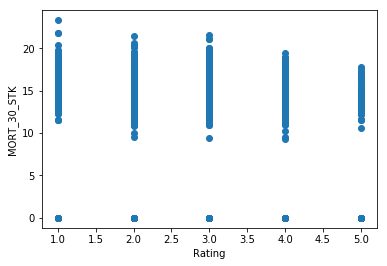

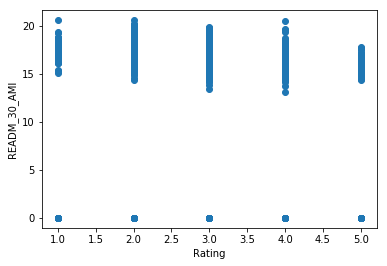

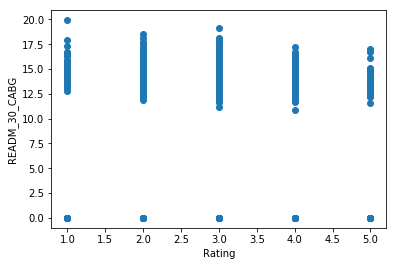

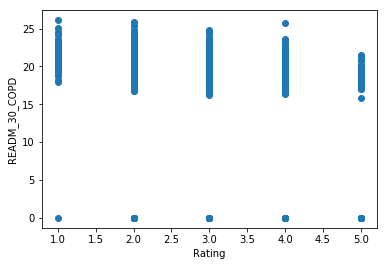

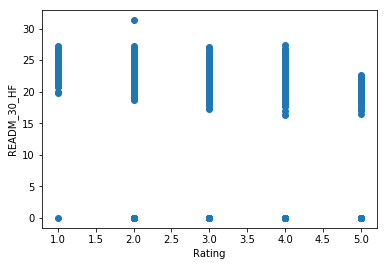

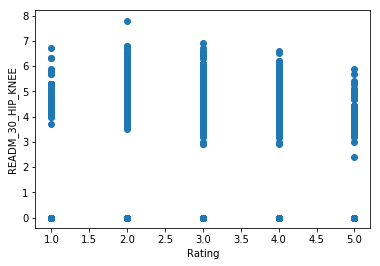

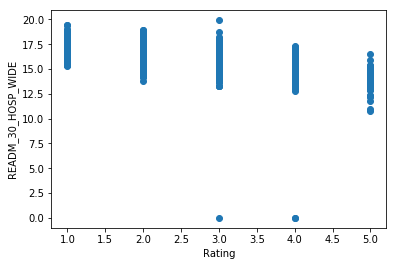

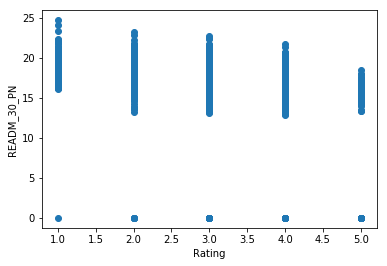

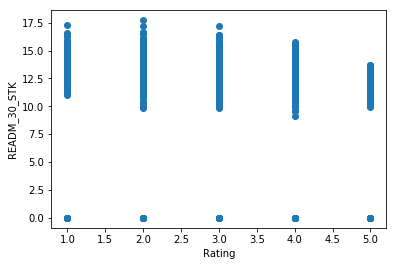

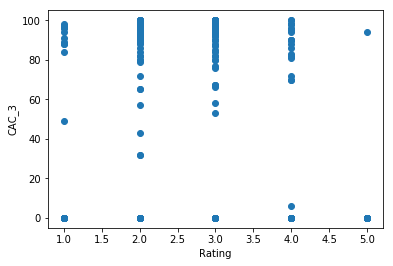

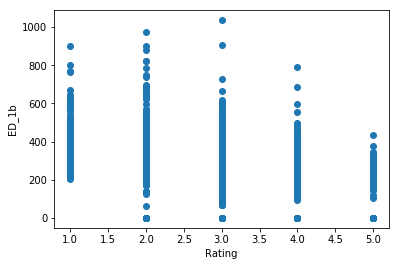

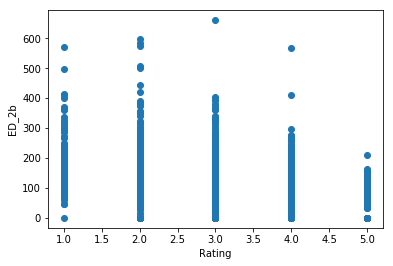

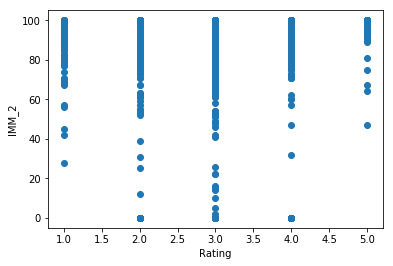

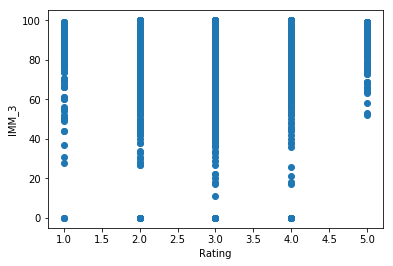

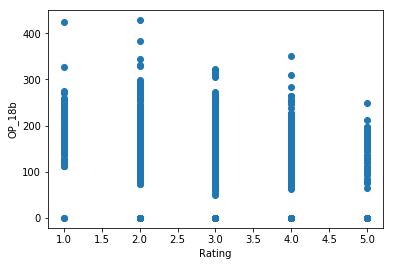

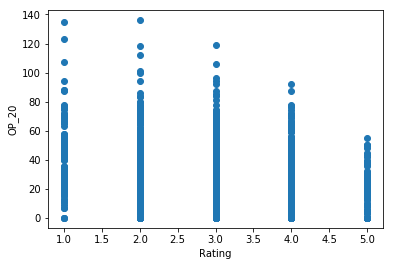

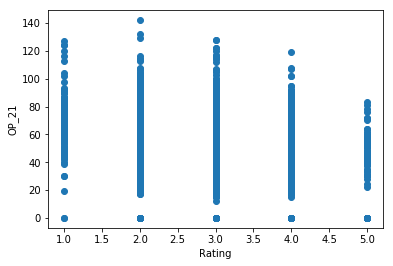

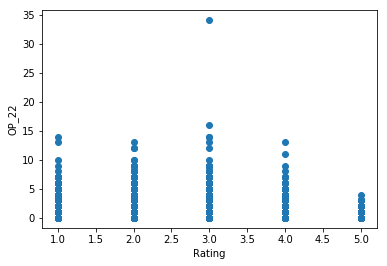

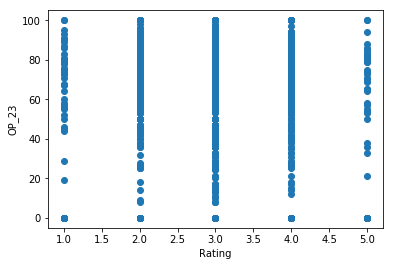

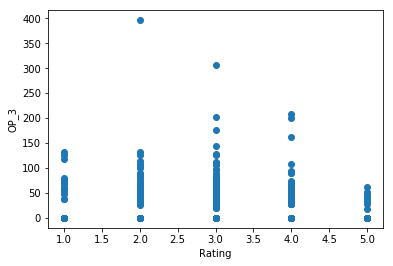

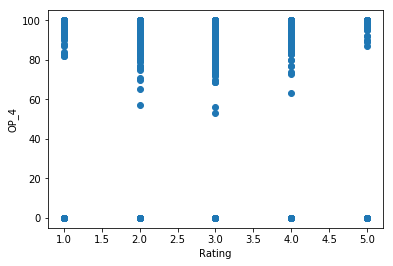

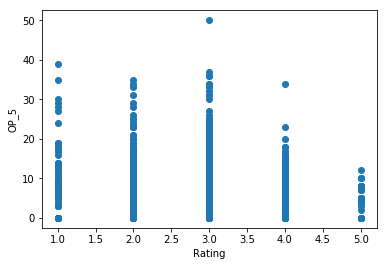

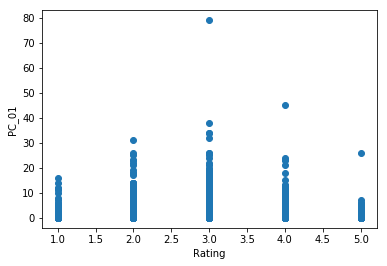

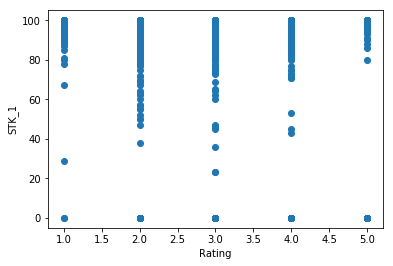

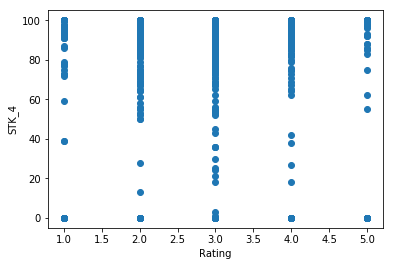

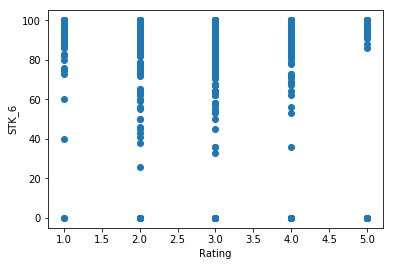

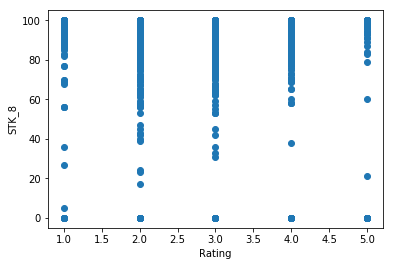

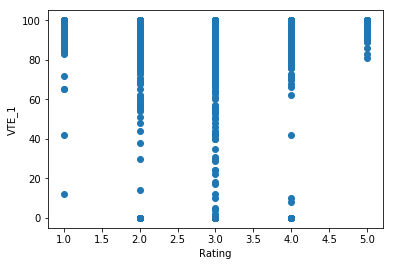

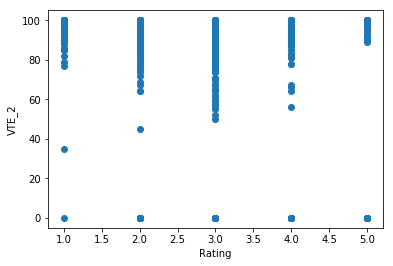

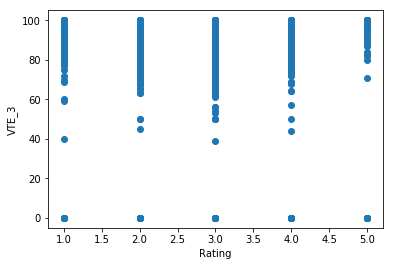

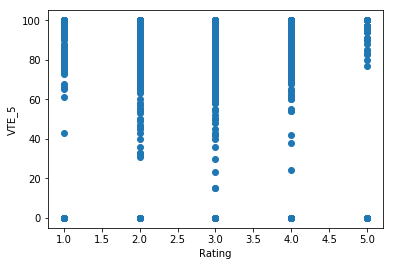

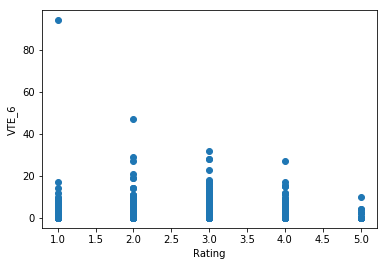

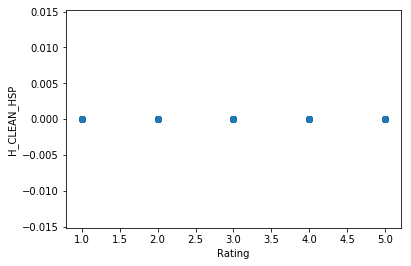

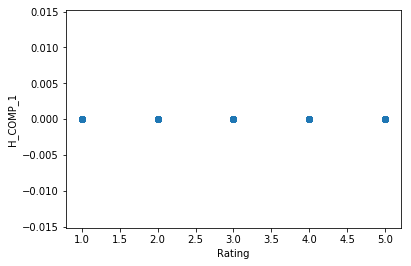

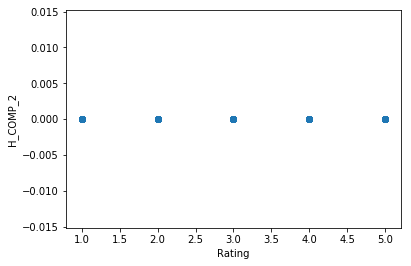

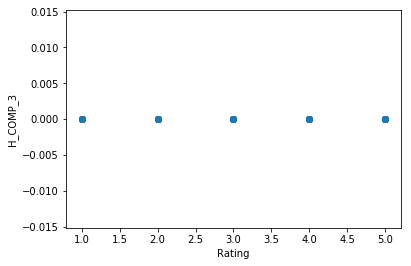

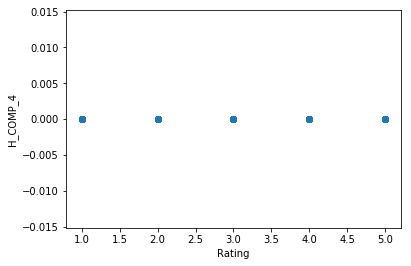

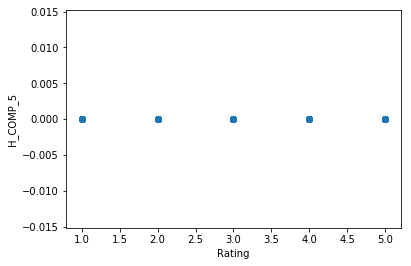

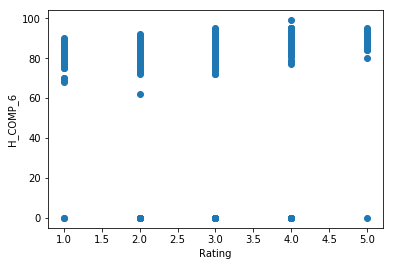

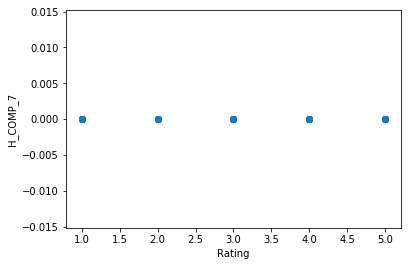

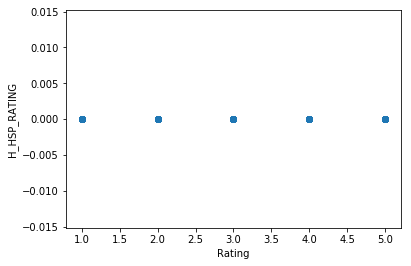

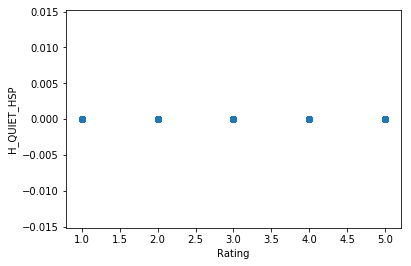

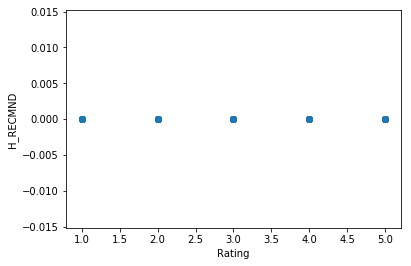

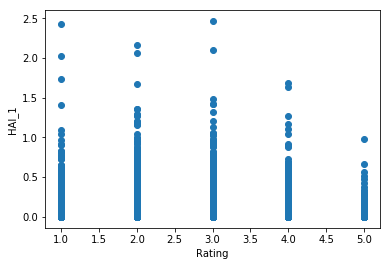

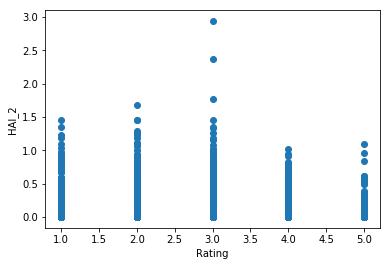

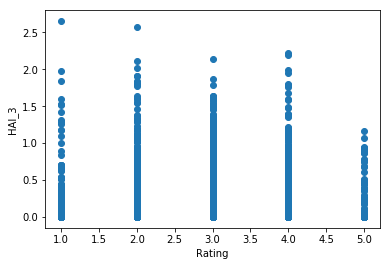

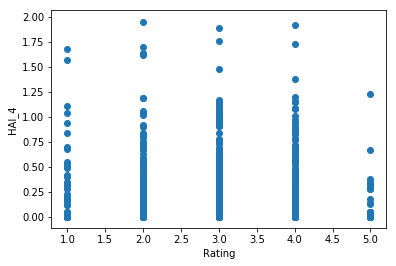

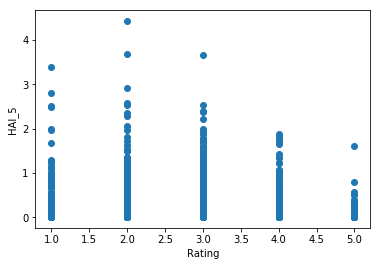

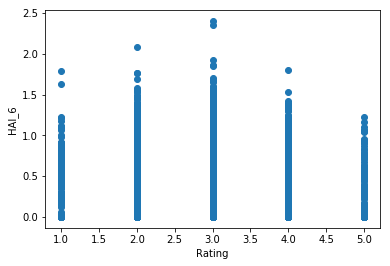

In [152]:
plt.figure()
for col in range(1, df_out.shape[1]):
    plt.scatter(df_out["Hospital overall rating"], df_out.iloc[:, col])
    plt.xlabel("Rating")
    plt.ylabel(df_out.columns[col])
    plt.show()

# Linear Regression

## Splitting the Data into Training and Testing Sets

In [153]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3648 entries, 0 to 4815
Data columns (total 64 columns):
Provider ID                3648 non-null int64
Hospital overall rating    3648 non-null int32
COMP_HIP_KNEE              3648 non-null float64
PSI_4_SURG_COMP            3648 non-null float64
PSI_90_SAFETY              3648 non-null float64
OP_10                      3648 non-null float64
OP_11                      3648 non-null float64
OP_13                      3648 non-null float64
OP_14                      3648 non-null float64
OP_8                       3648 non-null float64
MORT_30_AMI                3648 non-null float64
MORT_30_CABG               3648 non-null float64
MORT_30_COPD               3648 non-null float64
MORT_30_HF                 3648 non-null float64
MORT_30_PN                 3648 non-null float64
MORT_30_STK                3648 non-null float64
READM_30_AMI               3648 non-null float64
READM_30_CABG              3648 non-null float64
READM_30_COPD  

In [154]:
from sklearn.model_selection import train_test_split

In [155]:
# Putting feature variable to X
X = df_final.drop(['Hospital overall rating'], axis=1)
X.head()

,Provider ID,COMP_HIP_KNEE,PSI_4_SURG_COMP,PSI_90_SAFETY,OP_10,OP_11,OP_13,OP_14,OP_8,MORT_30_AMI,...,H_COMP_7,H_HSP_RATING,H_QUIET_HSP,H_RECMND,HAI_1,HAI_2,HAI_3,HAI_4,HAI_5,HAI_6
0,10001,3.8,168.26,0.68,6.4,0.9,7.1,2.4,38.1,12.5,...,0,0,0,0,1.030,0.974,0.950,0.0,0.107,0.562
1,10005,3.0,179.05,0.85,13.3,10.2,5.3,4.0,42.8,16.0,...,0,0,0,0,0.337,0.167,0.019,0.0,0.233,0.177
2,10006,3.8,198.33,0.91,11.8,4.6,0.0,4.6,45.6,16.7,...,0,0,0,0,0.138,0.373,0.016,0.0,0.401,0.309
3,10007,0.0,0.00,0.79,24.3,6.1,0.0,0.0,0.0,0.0,...,0,0,0,0,0.000,0.000,0.000,0.0,0.000,0.000
4,10008,0.0,0.00,0.90,3.6,0.0,0.0,0.6,0.0,0.0,...,0,0,0,0,0.000,0.000,0.000,0.0,0.000,0.029


In [156]:
# Putting response variable to y
y = df_final['Hospital overall rating']
y.head()

0    3
1    3
2    2
3    3
4    3
Name: Hospital overall rating, dtype: int32

In [157]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

##  Feature Scaling

In [158]:
from sklearn.preprocessing import StandardScaler

In [159]:
df_final.columns

Index(['Provider ID', 'Hospital overall rating', 'COMP_HIP_KNEE',
       'PSI_4_SURG_COMP', 'PSI_90_SAFETY', 'OP_10', 'OP_11', 'OP_13', 'OP_14',
       'OP_8', 'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF',
       'MORT_30_PN', 'MORT_30_STK', 'READM_30_AMI', 'READM_30_CABG',
       'READM_30_COPD', 'READM_30_HF', 'READM_30_HIP_KNEE',
       'READM_30_HOSP_WIDE', 'READM_30_PN', 'READM_30_STK', 'CAC_3', 'ED_1b',
       'ED_2b', 'IMM_2', 'IMM_3', 'OP_18b', 'OP_20', 'OP_21', 'OP_22', 'OP_23',
       'OP_3', 'OP_4', 'OP_5', 'PC_01', 'STK_1', 'STK_4', 'STK_6', 'STK_8',
       'VTE_1', 'VTE_2', 'VTE_3', 'VTE_5', 'VTE_6', 'H_CLEAN_HSP', 'H_COMP_1',
       'H_COMP_2', 'H_COMP_3', 'H_COMP_4', 'H_COMP_5', 'H_COMP_6', 'H_COMP_7',
       'H_HSP_RATING', 'H_QUIET_HSP', 'H_RECMND', 'HAI_1', 'HAI_2', 'HAI_3',
       'HAI_4', 'HAI_5', 'HAI_6'],
      dtype='object')

In [160]:
# Apply scaler() to all the columns 
scaler = StandardScaler()

X_train[['COMP_HIP_KNEE', 'PSI_4_SURG_COMP',\
       'PSI_90_SAFETY', 'OP_10', 'OP_11', 'OP_13', 'OP_14', 'OP_8',\
       'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF',\
       'MORT_30_PN', 'MORT_30_STK', 'READM_30_AMI', 'READM_30_CABG',\
       'READM_30_COPD', 'READM_30_HF', 'READM_30_HIP_KNEE',\
       'READM_30_HOSP_WIDE', 'READM_30_PN', 'READM_30_STK', 'CAC_3', 'ED_1b',\
       'ED_2b', 'IMM_2', 'IMM_3', 'OP_18b', 'OP_20', 'OP_21', 'OP_22', 'OP_23',\
       'OP_3', 'OP_4', 'OP_5', 'PC_01', 'STK_1', 'STK_4', 'STK_6', 'STK_8',\
       'VTE_1', 'VTE_2', 'VTE_3', 'VTE_5', 'VTE_6', 'H_CLEAN_HSP', 'H_COMP_1',\
       'H_COMP_2', 'H_COMP_3', 'H_COMP_4', 'H_COMP_5', 'H_COMP_6', 'H_COMP_7',\
       'H_HSP_RATING', 'H_QUIET_HSP', 'H_RECMND', 'HAI_1', 'HAI_2', 'HAI_3',\
       'HAI_4', 'HAI_5', 'HAI_6']] = scaler.fit_transform(X_train[['COMP_HIP_KNEE', 'PSI_4_SURG_COMP',\
       'PSI_90_SAFETY', 'OP_10', 'OP_11', 'OP_13', 'OP_14', 'OP_8',\
       'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF',\
       'MORT_30_PN', 'MORT_30_STK', 'READM_30_AMI', 'READM_30_CABG',\
       'READM_30_COPD', 'READM_30_HF', 'READM_30_HIP_KNEE',\
       'READM_30_HOSP_WIDE', 'READM_30_PN', 'READM_30_STK', 'CAC_3', 'ED_1b',\
       'ED_2b', 'IMM_2', 'IMM_3', 'OP_18b', 'OP_20', 'OP_21', 'OP_22', 'OP_23',\
       'OP_3', 'OP_4', 'OP_5', 'PC_01', 'STK_1', 'STK_4', 'STK_6', 'STK_8',\
       'VTE_1', 'VTE_2', 'VTE_3', 'VTE_5', 'VTE_6', 'H_CLEAN_HSP', 'H_COMP_1',\
       'H_COMP_2', 'H_COMP_3', 'H_COMP_4', 'H_COMP_5', 'H_COMP_6', 'H_COMP_7',\
       'H_HSP_RATING', 'H_QUIET_HSP', 'H_RECMND', 'HAI_1', 'HAI_2', 'HAI_3',\
       'HAI_4', 'HAI_5', 'HAI_6']])

X_train.head()

,Provider ID,COMP_HIP_KNEE,PSI_4_SURG_COMP,PSI_90_SAFETY,OP_10,OP_11,OP_13,OP_14,OP_8,MORT_30_AMI,...,H_COMP_7,H_HSP_RATING,H_QUIET_HSP,H_RECMND,HAI_1,HAI_2,HAI_3,HAI_4,HAI_5,HAI_6
4110,450586,-1.535337,-0.980084,0.398726,-0.657105,-0.489466,-1.033674,-0.878648,-0.821473,-1.354907,...,0.0,0.0,0.0,0.0,-0.588893,-0.653507,-0.555375,-0.287619,-0.469805,-1.069947
4025,450162,-0.281808,-0.980084,0.398726,4.578421,5.935060,1.318769,-0.878648,1.569896,-1.354907,...,0.0,0.0,0.0,0.0,-0.588893,-0.204022,-0.555375,-0.287619,-0.469805,-1.069947
4464,500015,0.832440,0.993960,0.535015,-0.475788,-0.286392,-0.671760,0.436797,-0.821473,0.787504,...,0.0,0.0,0.0,0.0,-0.296446,0.054644,-0.555375,-0.287619,-0.469805,1.469687
3983,450042,1.459205,0.983755,0.780337,-0.079157,-0.157163,0.848280,-0.322113,1.589659,0.861380,...,0.0,0.0,0.0,0.0,0.301350,0.436282,0.405751,-0.287619,0.253327,-0.295230
119,30038,0.344956,1.144461,0.862110,-0.815757,-0.083318,1.608300,0.335609,-0.821473,0.876155,...,0.0,0.0,0.0,0.0,-0.120118,1.420059,-0.515447,-0.287619,0.337412,1.066937


## Model Building

### RFE

In [161]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [162]:
# Running RFE with the output number of the variable equal to 25
lm = LinearRegression()
lm.fit(X_train, y_train)
# running RFE
rfe = RFE(lm, 25)
rfe = rfe.fit(X_train, y_train)

In [163]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Provider ID', False, 29),
 ('COMP_HIP_KNEE', True, 1),
 ('PSI_4_SURG_COMP', True, 1),
 ('PSI_90_SAFETY', True, 1),
 ('OP_10', True, 1),
 ('OP_11', False, 27),
 ('OP_13', True, 1),
 ('OP_14', False, 11),
 ('OP_8', True, 1),
 ('MORT_30_AMI', True, 1),
 ('MORT_30_CABG', True, 1),
 ('MORT_30_COPD', True, 1),
 ('MORT_30_HF', True, 1),
 ('MORT_30_PN', True, 1),
 ('MORT_30_STK', True, 1),
 ('READM_30_AMI', False, 13),
 ('READM_30_CABG', True, 1),
 ('READM_30_COPD', True, 1),
 ('READM_30_HF', True, 1),
 ('READM_30_HIP_KNEE', True, 1),
 ('READM_30_HOSP_WIDE', True, 1),
 ('READM_30_PN', False, 5),
 ('READM_30_STK', True, 1),
 ('CAC_3', False, 25),
 ('ED_1b', True, 1),
 ('ED_2b', False, 4),
 ('IMM_2', True, 1),
 ('IMM_3', True, 1),
 ('OP_18b', False, 2),
 ('OP_20', False, 3),
 ('OP_21', False, 14),
 ('OP_22', False, 17),
 ('OP_23', False, 26),
 ('OP_3', False, 19),
 ('OP_4', False, 7),
 ('OP_5', False, 8),
 ('PC_01', False, 23),
 ('STK_1', True, 1),
 ('STK_4', False, 12),
 ('STK_6', False, 9),

In [164]:
col = X_train.columns[rfe.support_]
col

Index(['COMP_HIP_KNEE', 'PSI_4_SURG_COMP', 'PSI_90_SAFETY', 'OP_10', 'OP_13',
       'OP_8', 'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF',
       'MORT_30_PN', 'MORT_30_STK', 'READM_30_CABG', 'READM_30_COPD',
       'READM_30_HF', 'READM_30_HIP_KNEE', 'READM_30_HOSP_WIDE',
       'READM_30_STK', 'ED_1b', 'IMM_2', 'IMM_3', 'STK_1', 'VTE_1', 'H_COMP_6',
       'HAI_1'],
      dtype='object')

In [165]:
X_train.columns[~rfe.support_]

Index(['Provider ID', 'OP_11', 'OP_14', 'READM_30_AMI', 'READM_30_PN', 'CAC_3',
       'ED_2b', 'OP_18b', 'OP_20', 'OP_21', 'OP_22', 'OP_23', 'OP_3', 'OP_4',
       'OP_5', 'PC_01', 'STK_4', 'STK_6', 'STK_8', 'VTE_2', 'VTE_3', 'VTE_5',
       'VTE_6', 'H_CLEAN_HSP', 'H_COMP_1', 'H_COMP_2', 'H_COMP_3', 'H_COMP_4',
       'H_COMP_5', 'H_COMP_7', 'H_HSP_RATING', 'H_QUIET_HSP', 'H_RECMND',
       'HAI_2', 'HAI_3', 'HAI_4', 'HAI_5', 'HAI_6'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [166]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [167]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [168]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [169]:
lm.params

const                 3.090873
COMP_HIP_KNEE        -0.054287
PSI_4_SURG_COMP      -0.042234
PSI_90_SAFETY        -0.353505
OP_10                -0.055120
OP_13                 0.050864
OP_8                  0.061677
MORT_30_AMI          -0.045727
MORT_30_CABG         -0.060559
MORT_30_COPD         -0.116079
MORT_30_HF           -0.069967
MORT_30_PN           -0.171754
MORT_30_STK          -0.085465
READM_30_CABG         0.118246
READM_30_COPD         0.128557
READM_30_HF           0.066834
READM_30_HIP_KNEE     0.082357
READM_30_HOSP_WIDE   -0.359676
READM_30_STK          0.061899
ED_1b                -0.174953
IMM_2                 0.118374
IMM_3                 0.067576
STK_1                 0.050913
VTE_1                 0.082226
H_COMP_6              0.103778
HAI_1                -0.067253
dtype: float64

In [170]:
#Let's see the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Hospital overall rating   R-squared:                       0.549
Model:                                 OLS   Adj. R-squared:                  0.545
Method:                      Least Squares   F-statistic:                     123.1
Date:                     Fri, 20 Dec 2019   Prob (F-statistic):               0.00
Time:                             07:33:40   Log-Likelihood:                -2117.0
No. Observations:                     2553   AIC:                             4286.
Df Residuals:                         2527   BIC:                             4438.
Df Model:                               25                                         
Covariance Type:                 nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.0909      0.011    280.222      0.000       3.069       3.113
COMP_HIP_KNEE         -0.0543      0.030     -1.822      0.069      -0.113       0.004
PSI_4_SURG_COMP       -0.0422      0.018     -2.393      0.017      -0.077      -0.008
PSI_90_SAFETY         -0.3535      0.015    -22.836      0.000      -0.384      -0.323
OP_10                 -0.0551      0.011     -4.893      0.000      -0.077      -0.033
OP_13                  0.0509      0.013      3.897      0.000       0.025       0.076
OP_8                   0.0617      0.013      4.841      0.000       0.037       0.087
MORT_30_AMI           -0.0457      0.018     -2.492      0.013      -0.082      -0.010
MORT_30_CABG          -0.0606      0.037     -1.647      0.100      -0.133       0.012
MORT_30_COPD          -0.1161      0.021     -5.594      0.000      -0.157      -0.075
MORT_30_HF            -0.0700      0.021     -3.278      0.001      -0.112      -0.028
MORT_30_PN            -0.1718      0.015    -11.286      0.000      -0.202      -0.142
MORT_30_STK           -0.0855      0.029     -2.957      0.003      -0.142      -0.029
READM_30_CABG          0.1182      0.037      3.166      0.002       0.045       0.191
READM_30_COPD          0.1286      0.021      6.039      0.000       0.087       0.170
READM_30_HF            0.0668      0.022      3.098      0.002       0.025       0.109
READM_30_HIP_KNEE      0.0824      0.030      2.724      0.007       0.023       0.142
READM_30_HOSP_WIDE    -0.3597      0.013    -28.741      0.000      -0.384      -0.335
READM_30_STK           0.0619      0.031      1.985      0.047       0.001       0.123
ED_1b                 -0.1750      0.015    -11.549      0.000      -0.205      -0.145
IMM_2                  0.1184      0.016      7.504      0.000       0.087       0.149
IMM_3                  0.0676      0.012      5.674      0.000       0.044       0.091
STK_1                  0.0509      0.020      2.532      0.011       0.011       0.090
VTE_1                  0.0822      0.017      4.963      0.000       0.050       0.115
H_COMP_6               0.1038      0.013      8.005      0.000       0.078       0.129
HAI_1                 -0.0673      0.013     -5.122      0.000      -0.093      -0.042
==============================================================================
Omnibus:                      898.828   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16239.085
Skew:                          -1.192   Prob(JB):                         0.00
Kurtosis:                      15.123   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors 

In [171]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,READM_30_CABG,11.47
8,MORT_30_CABG,11.11
18,READM_30_STK,7.99
16,READM_30_HIP_KNEE,7.52
1,COMP_HIP_KNEE,7.30
12,MORT_30_STK,6.87
15,READM_30_HF,3.83
10,MORT_30_HF,3.74
14,READM_30_COPD,3.72
9,MORT_30_COPD,3.54


#### Removing variables manually for model

Adj. R-square is 54.5% . 'READM_30_CABG' seems to have high VIF and 'MORT_30_CABG' has high p-values. But going with VIF values. So removing 'READM_30_CABG':

In [172]:
X_train_new = X_train_rfe.drop(["READM_30_CABG"], axis = 1)

In [173]:
# Adding a constant variable 
X_train_new_1 = sm.add_constant(X_train_new)

In [174]:
# Running the linear model
lm_1 = sm.OLS(y_train,X_train_new_1).fit()   

In [175]:
lm_1.params

const                 3.090873
COMP_HIP_KNEE        -0.051094
PSI_4_SURG_COMP      -0.036720
PSI_90_SAFETY        -0.352826
OP_10                -0.055770
OP_13                 0.053873
OP_8                  0.061769
MORT_30_AMI          -0.047818
MORT_30_CABG          0.046840
MORT_30_COPD         -0.118668
MORT_30_HF           -0.071233
MORT_30_PN           -0.174730
MORT_30_STK          -0.087655
READM_30_COPD         0.131982
READM_30_HF           0.067965
READM_30_HIP_KNEE     0.080979
READM_30_HOSP_WIDE   -0.359762
READM_30_STK          0.065824
ED_1b                -0.171959
IMM_2                 0.117350
IMM_3                 0.067213
STK_1                 0.050371
VTE_1                 0.081297
H_COMP_6              0.103115
HAI_1                -0.065388
dtype: float64

In [176]:
#Let's see the summary of our linear model
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Hospital overall rating   R-squared:                       0.547
Model:                                 OLS   Adj. R-squared:                  0.543
Method:                      Least Squares   F-statistic:                     127.4
Date:                     Fri, 20 Dec 2019   Prob (F-statistic):               0.00
Time:                             07:33:41   Log-Likelihood:                -2122.0
No. Observations:                     2553   AIC:                             4294.
Df Residuals:                         2528   BIC:                             4440.
Df Model:                               24                                         
Covariance Type:                 nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.0909      0.011    279.723      0.000       3.069       3.113
COMP_HIP_KNEE         -0.0511      0.030     -1.713      0.087      -0.110       0.007
PSI_4_SURG_COMP       -0.0367      0.018     -2.087      0.037      -0.071      -0.002
PSI_90_SAFETY         -0.3528      0.016    -22.754      0.000      -0.383      -0.322
OP_10                 -0.0558      0.011     -4.942      0.000      -0.078      -0.034
OP_13                  0.0539      0.013      4.131      0.000       0.028       0.079
OP_8                   0.0618      0.013      4.839      0.000       0.037       0.087
MORT_30_AMI           -0.0478      0.018     -2.603      0.009      -0.084      -0.012
MORT_30_CABG           0.0468      0.014      3.297      0.001       0.019       0.075
MORT_30_COPD          -0.1187      0.021     -5.713      0.000      -0.159      -0.078
MORT_30_HF            -0.0712      0.021     -3.332      0.001      -0.113      -0.029
MORT_30_PN            -0.1747      0.015    -11.483      0.000      -0.205      -0.145
MORT_30_STK           -0.0877      0.029     -3.028      0.002      -0.144      -0.031
READM_30_COPD          0.1320      0.021      6.197      0.000       0.090       0.174
READM_30_HF            0.0680      0.022      3.145      0.002       0.026       0.110
READM_30_HIP_KNEE      0.0810      0.030      2.673      0.008       0.022       0.140
READM_30_HOSP_WIDE    -0.3598      0.013    -28.696      0.000      -0.384      -0.335
READM_30_STK           0.0658      0.031      2.109      0.035       0.005       0.127
ED_1b                 -0.1720      0.015    -11.353      0.000      -0.202      -0.142
IMM_2                  0.1173      0.016      7.427      0.000       0.086       0.148
IMM_3                  0.0672      0.012      5.634      0.000       0.044       0.091
STK_1                  0.0504      0.020      2.501      0.012       0.011       0.090
VTE_1                  0.0813      0.017      4.899      0.000       0.049       0.114
H_COMP_6               0.1031      0.013      7.941      0.000       0.078       0.129
HAI_1                 -0.0654      0.013     -4.976      0.000      -0.091      -0.040
==============================================================================
Omnibus:                      894.801   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16075.867
Skew:                          -1.186   Prob(JB):                         0.00
Kurtosis:                      15.062   Cond. No.                         10.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [177]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,READM_30_STK,7.98
15,READM_30_HIP_KNEE,7.51
1,COMP_HIP_KNEE,7.29
12,MORT_30_STK,6.86
14,READM_30_HF,3.83
10,MORT_30_HF,3.74
13,READM_30_COPD,3.71
9,MORT_30_COPD,3.53
21,STK_1,3.32
7,MORT_30_AMI,2.77


Adj. R-square is 54.3% (not much change). 'READM_30_STK' seems to have high VIF and 'COMP_HIP_KNEE' has high p-values. But going with VIF values. So removing 'READM_30_STK':

In [178]:
X_train_new_1 = X_train_new_1.drop(["READM_30_STK"], axis = 1)

In [179]:
# Adding a constant variable  
X_train_new_1 = sm.add_constant(X_train_new_1)

In [180]:
# Running the linear model
lm_2 = sm.OLS(y_train,X_train_new_1).fit()   

In [181]:
lm_2.params

const                 3.090873
COMP_HIP_KNEE        -0.053921
PSI_4_SURG_COMP      -0.034518
PSI_90_SAFETY        -0.351996
OP_10                -0.054978
OP_13                 0.055038
OP_8                  0.063145
MORT_30_AMI          -0.042423
MORT_30_CABG          0.046545
MORT_30_COPD         -0.120512
MORT_30_HF           -0.075665
MORT_30_PN           -0.177104
MORT_30_STK          -0.040985
READM_30_COPD         0.135139
READM_30_HF           0.072969
READM_30_HIP_KNEE     0.085373
READM_30_HOSP_WIDE   -0.356720
ED_1b                -0.170244
IMM_2                 0.117837
IMM_3                 0.065858
STK_1                 0.059389
VTE_1                 0.078175
H_COMP_6              0.103716
HAI_1                -0.065201
dtype: float64

In [182]:
#Let's see the summary of our linear model
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Hospital overall rating   R-squared:                       0.547
Model:                                 OLS   Adj. R-squared:                  0.542
Method:                      Least Squares   F-statistic:                     132.5
Date:                     Fri, 20 Dec 2019   Prob (F-statistic):               0.00
Time:                             07:33:41   Log-Likelihood:                -2124.3
No. Observations:                     2553   AIC:                             4297.
Df Residuals:                         2529   BIC:                             4437.
Df Model:                               23                                         
Covariance Type:                 nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.0909      0.011    279.533      0.000       3.069       3.113
COMP_HIP_KNEE         -0.0539      0.030     -1.808      0.071      -0.112       0.005
PSI_4_SURG_COMP       -0.0345      0.018     -1.964      0.050      -0.069   -5.81e-05
PSI_90_SAFETY         -0.3520      0.016    -22.693      0.000      -0.382      -0.322
OP_10                 -0.0550      0.011     -4.872      0.000      -0.077      -0.033
OP_13                  0.0550      0.013      4.221      0.000       0.029       0.081
OP_8                   0.0631      0.013      4.950      0.000       0.038       0.088
MORT_30_AMI           -0.0424      0.018     -2.330      0.020      -0.078      -0.007
MORT_30_CABG           0.0465      0.014      3.274      0.001       0.019       0.074
MORT_30_COPD          -0.1205      0.021     -5.803      0.000      -0.161      -0.080
MORT_30_HF            -0.0757      0.021     -3.554      0.000      -0.117      -0.034
MORT_30_PN            -0.1771      0.015    -11.663      0.000      -0.207      -0.147
MORT_30_STK           -0.0410      0.019     -2.194      0.028      -0.078      -0.004
READM_30_COPD          0.1351      0.021      6.357      0.000       0.093       0.177
READM_30_HF            0.0730      0.021      3.395      0.001       0.031       0.115
READM_30_HIP_KNEE      0.0854      0.030      2.823      0.005       0.026       0.145
READM_30_HOSP_WIDE    -0.3567      0.012    -28.624      0.000      -0.381      -0.332
ED_1b                 -0.1702      0.015    -11.248      0.000      -0.200      -0.141
IMM_2                  0.1178      0.016      7.454      0.000       0.087       0.149
IMM_3                  0.0659      0.012      5.525      0.000       0.042       0.089
STK_1                  0.0594      0.020      3.015      0.003       0.021       0.098
VTE_1                  0.0782      0.017      4.726      0.000       0.046       0.111
H_COMP_6               0.1037      0.013      7.984      0.000       0.078       0.129
HAI_1                 -0.0652      0.013     -4.959      0.000      -0.091      -0.039
==============================================================================
Omnibus:                      871.518   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14914.458
Skew:                          -1.158   Prob(JB):                         0.00
Kurtosis:                      14.612   Cond. No.                         9.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [183]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,READM_30_HIP_KNEE,7.48
1,COMP_HIP_KNEE,7.27
14,READM_30_HF,3.78
10,MORT_30_HF,3.71
13,READM_30_COPD,3.70
9,MORT_30_COPD,3.53
20,STK_1,3.17
12,MORT_30_STK,2.85
7,MORT_30_AMI,2.71
2,PSI_4_SURG_COMP,2.53


Adj. R-square is 54.2% (not much change). 'READM_30_HIP_KNEE' seems to have high VIF and 'COMP_HIP_KNEE' has high p-values. But going with VIF values. So removing 'READM_30_HIP_KNEE':

In [184]:
X_train_new_2 = X_train_new_1.drop(["READM_30_HIP_KNEE"], axis = 1)

In [185]:
# Adding a constant variable  
X_train_new_2 = sm.add_constant(X_train_new_2)

In [186]:
# Running the linear model
lm_3 = sm.OLS(y_train,X_train_new_2).fit()   

In [187]:
lm_3.params

const                 3.090873
COMP_HIP_KNEE         0.020840
PSI_4_SURG_COMP      -0.031523
PSI_90_SAFETY        -0.353499
OP_10                -0.055475
OP_13                 0.055986
OP_8                  0.063268
MORT_30_AMI          -0.040210
MORT_30_CABG          0.048489
MORT_30_COPD         -0.119617
MORT_30_HF           -0.077006
MORT_30_PN           -0.177113
MORT_30_STK          -0.038440
READM_30_COPD         0.132486
READM_30_HF           0.072927
READM_30_HOSP_WIDE   -0.354123
ED_1b                -0.171624
IMM_2                 0.118000
IMM_3                 0.065632
STK_1                 0.058248
VTE_1                 0.080020
H_COMP_6              0.106223
HAI_1                -0.065049
dtype: float64

In [188]:
#Let's see the summary of our linear model
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Hospital overall rating   R-squared:                       0.545
Model:                                 OLS   Adj. R-squared:                  0.541
Method:                      Least Squares   F-statistic:                     137.8
Date:                     Fri, 20 Dec 2019   Prob (F-statistic):               0.00
Time:                             07:33:42   Log-Likelihood:                -2128.3
No. Observations:                     2553   AIC:                             4303.
Df Residuals:                         2530   BIC:                             4437.
Df Model:                               22                                         
Covariance Type:                 nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.0909      0.011    279.148      0.000       3.069       3.113
COMP_HIP_KNEE          0.0208      0.014      1.517      0.129      -0.006       0.048
PSI_4_SURG_COMP       -0.0315      0.018     -1.795      0.073      -0.066       0.003
PSI_90_SAFETY         -0.3535      0.016    -22.771      0.000      -0.384      -0.323
OP_10                 -0.0555      0.011     -4.910      0.000      -0.078      -0.033
OP_13                  0.0560      0.013      4.289      0.000       0.030       0.082
OP_8                   0.0633      0.013      4.953      0.000       0.038       0.088
MORT_30_AMI           -0.0402      0.018     -2.207      0.027      -0.076      -0.004
MORT_30_CABG           0.0485      0.014      3.410      0.001       0.021       0.076
MORT_30_COPD          -0.1196      0.021     -5.753      0.000      -0.160      -0.079
MORT_30_HF            -0.0770      0.021     -3.613      0.000      -0.119      -0.035
MORT_30_PN            -0.1771      0.015    -11.648      0.000      -0.207      -0.147
MORT_30_STK           -0.0384      0.019     -2.058      0.040      -0.075      -0.002
READM_30_COPD          0.1325      0.021      6.230      0.000       0.091       0.174
READM_30_HF            0.0729      0.022      3.388      0.001       0.031       0.115
READM_30_HOSP_WIDE    -0.3541      0.012    -28.455      0.000      -0.379      -0.330
ED_1b                 -0.1716      0.015    -11.330      0.000      -0.201      -0.142
IMM_2                  0.1180      0.016      7.454      0.000       0.087       0.149
IMM_3                  0.0656      0.012      5.498      0.000       0.042       0.089
STK_1                  0.0582      0.020      2.954      0.003       0.020       0.097
VTE_1                  0.0800      0.017      4.835      0.000       0.048       0.112
H_COMP_6               0.1062      0.013      8.184      0.000       0.081       0.132
HAI_1                 -0.0650      0.013     -4.941      0.000      -0.091      -0.039
==============================================================================
Omnibus:                      859.290   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14421.786
Skew:                          -1.141   Prob(JB):                         0.00
Kurtosis:                      14.418   Cond. No.                         7.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [189]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,READM_30_HF,3.78
10,MORT_30_HF,3.70
13,READM_30_COPD,3.69
9,MORT_30_COPD,3.53
19,STK_1,3.17
12,MORT_30_STK,2.85
7,MORT_30_AMI,2.71
2,PSI_4_SURG_COMP,2.52
20,VTE_1,2.23
17,IMM_2,2.04


Adj. R-square is 54.1% (not much change). VIF seems good but 'COMP_HIP_KNEE' has high p-values. So removing 'COMP_HIP_KNEE':

In [190]:
X_train_new_3 = X_train_new_2.drop(["COMP_HIP_KNEE"], axis = 1)

In [191]:
# Adding a constant variable  
X_train_new_3 = sm.add_constant(X_train_new_3)

In [192]:
# Running the linear model
lm_4 = sm.OLS(y_train,X_train_new_3).fit()

In [193]:
lm_4.params

const                 3.090873
PSI_4_SURG_COMP      -0.027615
PSI_90_SAFETY        -0.354035
OP_10                -0.055922
OP_13                 0.058296
OP_8                  0.065062
MORT_30_AMI          -0.037866
MORT_30_CABG          0.048619
MORT_30_COPD         -0.119006
MORT_30_HF           -0.076990
MORT_30_PN           -0.176943
MORT_30_STK          -0.035765
READM_30_COPD         0.131981
READM_30_HF           0.071957
READM_30_HOSP_WIDE   -0.353801
ED_1b                -0.173452
IMM_2                 0.117605
IMM_3                 0.066345
STK_1                 0.059483
VTE_1                 0.081031
H_COMP_6              0.110474
HAI_1                -0.065633
dtype: float64

In [194]:
#Let's see the summary of our linear model
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Hospital overall rating   R-squared:                       0.545
Model:                                 OLS   Adj. R-squared:                  0.541
Method:                      Least Squares   F-statistic:                     144.2
Date:                     Fri, 20 Dec 2019   Prob (F-statistic):               0.00
Time:                             07:33:43   Log-Likelihood:                -2129.4
No. Observations:                     2553   AIC:                             4303.
Df Residuals:                         2531   BIC:                             4431.
Df Model:                               21                                         
Covariance Type:                 nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.0909      0.011    279.077      0.000       3.069       3.113
PSI_4_SURG_COMP       -0.0276      0.017     -1.589      0.112      -0.062       0.006
PSI_90_SAFETY         -0.3540      0.016    -22.806      0.000      -0.384      -0.324
OP_10                 -0.0559      0.011     -4.949      0.000      -0.078      -0.034
OP_13                  0.0583      0.013      4.496      0.000       0.033       0.084
OP_8                   0.0651      0.013      5.114      0.000       0.040       0.090
MORT_30_AMI           -0.0379      0.018     -2.086      0.037      -0.073      -0.002
MORT_30_CABG           0.0486      0.014      3.418      0.001       0.021       0.077
MORT_30_COPD          -0.1190      0.021     -5.723      0.000      -0.160      -0.078
MORT_30_HF            -0.0770      0.021     -3.612      0.000      -0.119      -0.035
MORT_30_PN            -0.1769      0.015    -11.634      0.000      -0.207      -0.147
MORT_30_STK           -0.0358      0.019     -1.922      0.055      -0.072       0.001
READM_30_COPD          0.1320      0.021      6.205      0.000       0.090       0.174
READM_30_HF            0.0720      0.022      3.344      0.001       0.030       0.114
READM_30_HOSP_WIDE    -0.3538      0.012    -28.426      0.000      -0.378      -0.329
ED_1b                 -0.1735      0.015    -11.484      0.000      -0.203      -0.144
IMM_2                  0.1176      0.016      7.428      0.000       0.087       0.149
IMM_3                  0.0663      0.012      5.561      0.000       0.043       0.090
STK_1                  0.0595      0.020      3.018      0.003       0.021       0.098
VTE_1                  0.0810      0.017      4.899      0.000       0.049       0.113
H_COMP_6               0.1105      0.013      8.716      0.000       0.086       0.135
HAI_1                 -0.0656      0.013     -4.986      0.000      -0.091      -0.040
==============================================================================
Omnibus:                      869.622   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14745.264
Skew:                          -1.157   Prob(JB):                         0.00
Kurtosis:                      14.544   Cond. No.                         6.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [195]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,READM_30_HF,3.78
9,MORT_30_HF,3.70
12,READM_30_COPD,3.69
8,MORT_30_COPD,3.52
18,STK_1,3.17
11,MORT_30_STK,2.82
6,MORT_30_AMI,2.69
1,PSI_4_SURG_COMP,2.46
19,VTE_1,2.23
16,IMM_2,2.04


Adj. R-square is 54.1% (same). VIF seems good but 'PSI_4_SURG_COMP' has high p-values. So removing 'PSI_4_SURG_COMP':

In [196]:
X_train_new_4 = X_train_new_3.drop(["PSI_4_SURG_COMP"], axis = 1)

In [197]:
# Adding a constant variable  
X_train_new_4 = sm.add_constant(X_train_new_4)

In [198]:
# Running the linear model
lm_5 = sm.OLS(y_train,X_train_new_4).fit()

In [199]:
lm_5.params

const                 3.090873
PSI_90_SAFETY        -0.356144
OP_10                -0.054874
OP_13                 0.056248
OP_8                  0.063187
MORT_30_AMI          -0.045824
MORT_30_CABG          0.039842
MORT_30_COPD         -0.118452
MORT_30_HF           -0.075948
MORT_30_PN           -0.176057
MORT_30_STK          -0.037499
READM_30_COPD         0.131265
READM_30_HF           0.071663
READM_30_HOSP_WIDE   -0.353386
ED_1b                -0.175260
IMM_2                 0.117721
IMM_3                 0.066161
STK_1                 0.057012
VTE_1                 0.082020
H_COMP_6              0.110855
HAI_1                -0.068344
dtype: float64

In [200]:
#Let's see the summary of our linear model
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Hospital overall rating   R-squared:                       0.544
Model:                                 OLS   Adj. R-squared:                  0.541
Method:                      Least Squares   F-statistic:                     151.2
Date:                     Fri, 20 Dec 2019   Prob (F-statistic):               0.00
Time:                             07:33:43   Log-Likelihood:                -2130.7
No. Observations:                     2553   AIC:                             4303.
Df Residuals:                         2532   BIC:                             4426.
Df Model:                               20                                         
Covariance Type:                 nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.0909      0.011    278.993      0.000       3.069       3.113
PSI_90_SAFETY         -0.3561      0.015    -23.019      0.000      -0.386      -0.326
OP_10                 -0.0549      0.011     -4.864      0.000      -0.077      -0.033
OP_13                  0.0562      0.013      4.358      0.000       0.031       0.082
OP_8                   0.0632      0.013      4.987      0.000       0.038       0.088
MORT_30_AMI           -0.0458      0.017     -2.625      0.009      -0.080      -0.012
MORT_30_CABG           0.0398      0.013      3.039      0.002       0.014       0.066
MORT_30_COPD          -0.1185      0.021     -5.696      0.000      -0.159      -0.078
MORT_30_HF            -0.0759      0.021     -3.563      0.000      -0.118      -0.034
MORT_30_PN            -0.1761      0.015    -11.580      0.000      -0.206      -0.146
MORT_30_STK           -0.0375      0.019     -2.019      0.044      -0.074      -0.001
READM_30_COPD          0.1313      0.021      6.171      0.000       0.090       0.173
READM_30_HF            0.0717      0.022      3.329      0.001       0.029       0.114
READM_30_HOSP_WIDE    -0.3534      0.012    -28.390      0.000      -0.378      -0.329
ED_1b                 -0.1753      0.015    -11.633      0.000      -0.205      -0.146
IMM_2                  0.1177      0.016      7.433      0.000       0.087       0.149
IMM_3                  0.0662      0.012      5.544      0.000       0.043       0.090
STK_1                  0.0570      0.020      2.901      0.004       0.018       0.096
VTE_1                  0.0820      0.017      4.961      0.000       0.050       0.114
H_COMP_6               0.1109      0.013      8.745      0.000       0.086       0.136
HAI_1                 -0.0683      0.013     -5.234      0.000      -0.094      -0.043
==============================================================================
Omnibus:                      863.871   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14435.714
Skew:                          -1.150   Prob(JB):                         0.00
Kurtosis:                      14.420   Cond. No.                         6.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [201]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,READM_30_HF,3.78
8,MORT_30_HF,3.70
11,READM_30_COPD,3.69
7,MORT_30_COPD,3.52
17,STK_1,3.15
10,MORT_30_STK,2.81
5,MORT_30_AMI,2.48
18,VTE_1,2.23
15,IMM_2,2.04
1,PSI_90_SAFETY,1.95


Adj. R-square is 54.1% (same). All the VIF values are good. All the p-values are below 0.05. So we can fix this model.

#### Residual Analysis of the train data of model

In [202]:
y_train_predict = lm_5.predict(X_train_new_4)

In [203]:
y_train = y_train.to_frame()

In [204]:
y_train_predict = y_train_predict.to_frame()

In [205]:
z = y_train['Hospital overall rating'] - y_train_predict[0]
z

4110    0.968087
4025    0.848168
4464   -0.882504
3983   -0.924198
119     0.014769
1423   -0.386022
312     0.710210
2341   -0.068247
863     0.031499
1550    0.015765
2931   -0.084915
2859   -0.453351
4773    0.729965
2932   -0.333908
392    -0.208622
3340    0.767067
1534   -0.339762
966    -0.622513
2177    0.576426
137     0.422495
4441   -0.366668
3589   -0.120420
3621    0.635778
4319    0.181027
2610   -0.645462
736    -0.555035
2724    0.004937
1386    0.625202
3617    0.814608
4516    0.121192
          ...   
1106    0.058160
3225   -0.120779
2565   -0.662482
2500   -0.215159
2183    0.517930
3196    0.575508
2839   -0.453544
4121    0.529635
2164   -1.113171
1997    0.737680
3893   -0.786561
1706    0.094932
2496   -0.410673
4370    0.398188
2171    0.028833
342    -0.356826
3632    0.220573
1226   -0.456352
963     0.263501
2017    0.442644
2076    0.434636
57      0.791946
2474   -0.011688
2654    0.157303
413     0.699043
2572   -0.303532
89     -0.238977
2436   -0.1655

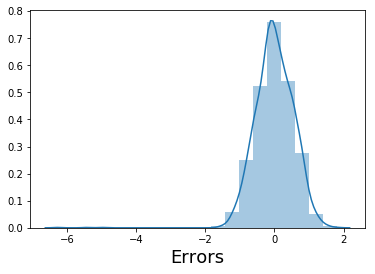

In [206]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(z, bins = 20)
plt.xlabel('Errors', fontsize = 18) 
plt.show()

It is a normal curve

## Feature Scaling

In [207]:
from sklearn.preprocessing import StandardScaler

In [208]:
# Apply scaler() to all the columns 
scaler = StandardScaler()

X_test[['COMP_HIP_KNEE', 'PSI_4_SURG_COMP',\
       'PSI_90_SAFETY', 'OP_10', 'OP_11', 'OP_13', 'OP_14', 'OP_8',\
       'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF',\
       'MORT_30_PN', 'MORT_30_STK', 'READM_30_AMI', 'READM_30_CABG',\
       'READM_30_COPD', 'READM_30_HF', 'READM_30_HIP_KNEE',\
       'READM_30_HOSP_WIDE', 'READM_30_PN', 'READM_30_STK', 'CAC_3', 'ED_1b',\
       'ED_2b', 'IMM_2', 'IMM_3', 'OP_18b', 'OP_20', 'OP_21', 'OP_22', 'OP_23',\
       'OP_3', 'OP_4', 'OP_5', 'PC_01', 'STK_1', 'STK_4', 'STK_6', 'STK_8',\
       'VTE_1', 'VTE_2', 'VTE_3', 'VTE_5', 'VTE_6', 'H_CLEAN_HSP', 'H_COMP_1',\
       'H_COMP_2', 'H_COMP_3', 'H_COMP_4', 'H_COMP_5', 'H_COMP_6', 'H_COMP_7',\
       'H_HSP_RATING', 'H_QUIET_HSP', 'H_RECMND', 'HAI_1', 'HAI_2', 'HAI_3',\
       'HAI_4', 'HAI_5', 'HAI_6']] = scaler.fit_transform(X_test[['COMP_HIP_KNEE', 'PSI_4_SURG_COMP',\
       'PSI_90_SAFETY', 'OP_10', 'OP_11', 'OP_13', 'OP_14', 'OP_8',\
       'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF',\
       'MORT_30_PN', 'MORT_30_STK', 'READM_30_AMI', 'READM_30_CABG',\
       'READM_30_COPD', 'READM_30_HF', 'READM_30_HIP_KNEE',\
       'READM_30_HOSP_WIDE', 'READM_30_PN', 'READM_30_STK', 'CAC_3', 'ED_1b',\
       'ED_2b', 'IMM_2', 'IMM_3', 'OP_18b', 'OP_20', 'OP_21', 'OP_22', 'OP_23',\
       'OP_3', 'OP_4', 'OP_5', 'PC_01', 'STK_1', 'STK_4', 'STK_6', 'STK_8',\
       'VTE_1', 'VTE_2', 'VTE_3', 'VTE_5', 'VTE_6', 'H_CLEAN_HSP', 'H_COMP_1',\
       'H_COMP_2', 'H_COMP_3', 'H_COMP_4', 'H_COMP_5', 'H_COMP_6', 'H_COMP_7',\
       'H_HSP_RATING', 'H_QUIET_HSP', 'H_RECMND', 'HAI_1', 'HAI_2', 'HAI_3',\
       'HAI_4', 'HAI_5', 'HAI_6']])

X_test.head()

,Provider ID,COMP_HIP_KNEE,PSI_4_SURG_COMP,PSI_90_SAFETY,OP_10,OP_11,OP_13,OP_14,OP_8,MORT_30_AMI,...,H_COMP_7,H_HSP_RATING,H_QUIET_HSP,H_RECMND,HAI_1,HAI_2,HAI_3,HAI_4,HAI_5,HAI_6
2611,281320,0.410261,-0.975444,-1.983036,0.358136,0.108198,-1.019885,-0.875526,-0.812298,-1.356729,...,0.0,0.0,0.0,0.0,-0.567660,-0.662482,-0.528268,-0.280026,-0.465102,-1.063552
492,50616,0.615955,1.131677,-0.029883,-0.645104,-0.530085,-1.019885,0.428419,-0.812298,0.648890,...,0.0,0.0,0.0,0.0,-0.567660,-0.633807,0.195072,-0.280026,-0.465102,2.275452
3996,450080,0.615955,-0.975444,0.237672,1.531569,4.970411,0.527292,-0.875526,1.585504,-1.356729,...,0.0,0.0,0.0,0.0,-0.567660,-0.662482,-0.528268,-0.280026,-0.465102,1.791611
3174,360044,0.958778,-0.975444,0.184161,-0.555529,-0.267263,0.131503,1.531757,-0.812298,0.648890,...,0.0,0.0,0.0,0.0,-0.567660,-0.576459,-0.528268,-0.280026,-0.465102,2.015892
3908,440120,0.410261,0.889773,0.451716,-0.250974,-0.417447,0.671216,0.929937,0.643158,0.929087,...,0.0,0.0,0.0,0.0,2.304962,2.426162,1.311083,-0.280026,7.797902,0.677770


In [209]:
X_train_new_4.columns

Index(['const', 'PSI_90_SAFETY', 'OP_10', 'OP_13', 'OP_8', 'MORT_30_AMI',
       'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF', 'MORT_30_PN',
       'MORT_30_STK', 'READM_30_COPD', 'READM_30_HF', 'READM_30_HOSP_WIDE',
       'ED_1b', 'IMM_2', 'IMM_3', 'STK_1', 'VTE_1', 'H_COMP_6', 'HAI_1'],
      dtype='object')

In [210]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[['PSI_90_SAFETY', 'OP_10', 'OP_13', 'OP_8', 'MORT_30_AMI',
       'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF', 'MORT_30_PN',
       'MORT_30_STK', 'READM_30_COPD', 'READM_30_HF', 'READM_30_HOSP_WIDE',
       'ED_1b', 'IMM_2', 'IMM_3', 'STK_1', 'VTE_1', 'H_COMP_6', 'HAI_1']]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [211]:
X_test_new

,const,PSI_90_SAFETY,OP_10,OP_13,OP_8,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,...,READM_30_COPD,READM_30_HF,READM_30_HOSP_WIDE,ED_1b,IMM_2,IMM_3,STK_1,VTE_1,H_COMP_6,HAI_1
2611,1.0,-1.983036,0.358136,-1.019885,-0.812298,-1.356729,-0.597523,-3.267758,-3.767001,0.342492,...,-3.843426,-4.343642,-0.190172,-2.090370,-3.795286,-3.555157,-1.601725,-3.025275,-3.565599,-0.567660
492,1.0,-0.029883,-0.645104,-1.019885,-0.812298,0.648890,-0.597523,0.440842,0.664660,1.096860,...,0.530412,0.156942,-0.077611,0.895466,0.015367,-0.960742,0.669795,0.479416,0.154245,-0.567660
3996,1.0,0.237672,1.531569,0.527292,1.585504,-1.356729,-0.597523,0.268349,0.632074,0.153900,...,0.060326,0.032502,-0.752978,0.102480,0.315081,-0.784850,0.187958,-0.086999,0.154245,-0.567660
3174,1.0,0.184161,-0.555529,0.131503,-0.812298,0.648890,-0.597523,0.440842,-0.084812,0.100017,...,0.203396,0.239902,0.260073,-0.326380,0.101000,0.666263,0.692740,-0.122400,0.287097,-0.567660
3908,1.0,0.451716,-0.250974,0.671216,0.643158,0.929087,3.020131,0.958321,1.120860,1.285453,...,0.407781,0.260642,-0.527856,0.725541,0.229449,-0.301146,0.555072,0.019204,0.287097,2.304962
3224,1.0,0.398205,-0.250974,1.282891,-0.812298,0.693132,-0.597523,-0.119761,-0.997213,-0.384935,...,0.203396,-0.050458,0.034951,0.078205,0.443530,0.358451,0.669795,0.337812,0.331381,0.227896
1254,1.0,-1.983036,1.522611,-1.019885,-0.812298,-1.356729,-0.597523,0.052732,-0.280327,-0.169401,...,-0.062305,0.011762,-0.978100,-0.391113,0.486347,0.622290,-1.601725,0.408614,-3.565599,-0.567660
9,1.0,0.639005,1.092651,-1.019885,1.082262,0.943834,-0.597523,0.483965,0.436560,0.854385,...,0.857427,0.302122,0.372634,-0.569131,0.400714,0.050639,0.463293,0.337812,0.198529,-0.109138
1429,1.0,-0.431216,-0.707806,0.383369,0.697429,0.781615,1.750779,0.009609,-0.215155,-0.438818,...,0.509973,0.239902,0.260073,-0.294013,0.272265,0.798182,0.692740,0.479416,0.331381,2.073742
2306,1.0,0.531983,3.815731,1.354853,1.284545,0.796362,2.004649,-0.119761,0.012945,0.315550,...,0.162519,0.219162,1.273124,0.078205,0.058183,0.138586,0.623906,0.019204,0.287097,-0.164004


In [212]:
# Making predictions
y_pred = lm_5.predict(X_test_new)

In [213]:
y_pred = y_pred.to_frame()
y_pred_final = y_pred.apply(lambda x : round(x,0))
y_pred_final[0] = y_pred_final[0].astype(int)
y_pred_final = y_pred_final.rename(columns = {list(y_pred_final)[0] :'predicted_rating'})
y_pred_final

,predicted_rating
2611,3
492,3
3996,3
3174,3
3908,3
3224,3
1254,4
9,3
1429,4
2306,2


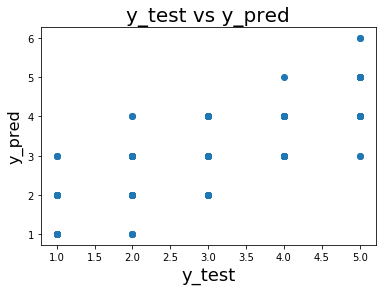

In [214]:
# Plotting y_test and y_pred to understand the spread
plt.scatter(y_test, y_pred_final)
plt.title('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18) 
plt.ylabel('y_pred', fontsize = 16)
plt.show()

In [215]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_final)

0.44278257999298576

In [216]:
y_pred_final = pd.concat([y_test,y_pred_final],axis=1)
y_pred_final = pd.concat([X_test['Provider ID'],y_pred_final],axis=1)
y_pred_final

,Provider ID,Hospital overall rating,predicted_rating
2611,281320,3,3
492,50616,3,3
3996,450080,3,3
3174,360044,3,3
3908,440120,2,3
3224,360143,4,3
1254,141309,4,4
9,10019,2,3
1429,160033,4,4
2306,250019,2,2


In [217]:
# Let's check the overall accuracy.
import sklearn.metrics as metrics
metrics.accuracy_score(y_pred_final['Hospital overall rating'], y_pred_final['predicted_rating'])

0.6136986301369863

The equation of our best fitted line is:

rating = 3.090873 - 0.356144 x PSI_90_SAFETY - 0.054874 x OP_10 + 0.056248 x OP_13 + 0.063187 x OP_8 - 0.045824 x MORT_30_AMI +  0.039842 x MORT_30_CABG - 0.118452 x MORT_30_COPD - 0.075948 x MORT_30_HF -0.176057 x MORT_30_PN - 0.037499 x MORT_30_STK + 0.131265 x READM_30_COPD + 0.071663 x READM_30_HF - 0.353386 x READM_30_HOSP_WIDE - 0.175260 x ED_1b + 0.117721 x IMM_2 + 0.066161 x IMM_3 + 0.057012 x STK_1 + 0.082020 x VTE_1 + 0.110855 x H_COMP_6 - 0.068344 x  HAI_1 

The accuracy is 61.3%

## Let's try Logistic Regression

In [218]:
df_fin = df_final.fillna(0)

In [219]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

standard_scaler = StandardScaler()
X_scaled = standard_scaler.fit_transform(df_fin.drop(['Hospital overall rating'],1))
y = df_fin['Hospital overall rating']

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, train_size=0.7,test_size=0.3,random_state=42)

- Simple Model

In [221]:
logr = LogisticRegression()
mod = logr.fit(X_train,y_train)
predict=mod.predict(X_train)
predict

array([2, 3, 3, ..., 3, 4, 3])

In [222]:
print(metrics.accuracy_score(y_train, predict))

0.6694085389737564


In [223]:
confusion = metrics.confusion_matrix(y_train, predict )
print(confusion)

[[  29   54    6    0    0]
 [   0  238  246    2    0]
 [   0   47 1065  112    0]
 [   0    2  311  355    7]
 [   0    0    4   53   22]]


### Check accuracy on test set

In [224]:
predict_test=mod.predict(X_test)
predict_test

array([3, 3, 3, ..., 3, 3, 2])

In [225]:
confusion = metrics.confusion_matrix(y_test, predict_test )
print(confusion)

[[  4  23   1   0   0]
 [  0  68 128   2   0]
 [  0  30 452  66   0]
 [  0   0 130 157   2]
 [  0   0   2  24   6]]


In [226]:
print(metrics.accuracy_score(y_test, predict_test))

0.6273972602739726


## Logistic Regression giving the accuracy of 62.7 % 

# Random Forest

In [227]:
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split

In [228]:
df_final = df_final.dropna()

In [229]:
# Putting feature variable to X
X = df_final.drop('Hospital overall rating',axis=1)

# Putting response variable to y
y = df_final['Hospital overall rating']

In [230]:
# split X and y into cross-validation (75%) and testing (25%) data sets
X_cv, X_test, y_cv, y_test = train_test_split(X, y, test_size=0.25)

Top 10 features are: 
READM_30_HOSP_WIDE
PSI_90_SAFETY
H_COMP_6
MORT_30_PN
READM_30_PN
MORT_30_HF
READM_30_HF
ED_2b
MORT_30_COPD
OP_18b


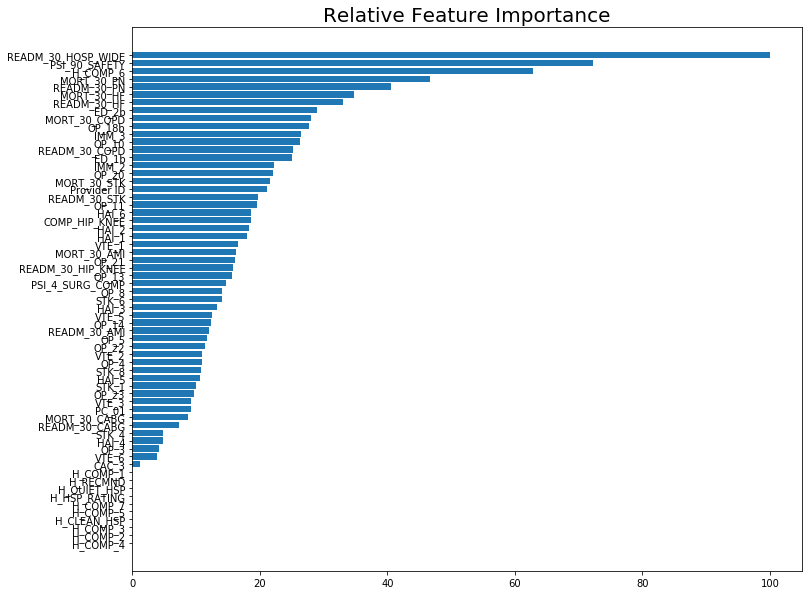

In [231]:
# fit Random Forest model to the cross-validation data
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_cv, y_cv)
importances = forest.feature_importances_

# make importance relative to the max importance
feature_importance = 100.0 * (importances / importances.max())
sorted_idx = np.argsort(feature_importance)
feature_names = list(X_cv.columns.values)
feature_names_sort = [feature_names[indice] for indice in sorted_idx]
pos = np.arange(sorted_idx.shape[0]) + .5
print ('Top 10 features are: ')
for feature in feature_names_sort[::-1][:10]:
    print (feature)

# plot the result
plt.figure(figsize=(12, 10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names_sort)
plt.title('Relative Feature Importance', fontsize=20)
plt.show()

In [232]:
# make a smaller feature set which only contains the top 10 features
top10 = X_cv[['READM_30_HOSP_WIDE','PSI_90_SAFETY','H_COMP_6','MORT_30_PN','READM_30_PN','READM_30_HF','MORT_30_HF','MORT_30_COPD','ED_2b','ED_1b']]
top10.head()

,READM_30_HOSP_WIDE,PSI_90_SAFETY,H_COMP_6,MORT_30_PN,READM_30_PN,READM_30_HF,MORT_30_HF,MORT_30_COPD,ED_2b,ED_1b
1563,16.3,0.70,90.0,18.2,16.9,24.4,15.3,10.6,42.0,177.0
788,16.6,0.88,80.0,16.9,16.8,22.7,11.4,9.0,88.0,310.0
1565,15.1,0.89,83.0,15.9,16.8,20.7,12.9,7.3,53.0,200.0
3055,14.8,0.61,89.0,17.0,16.8,20.4,13.2,10.0,98.0,256.0
3159,16.2,0.84,82.0,13.2,18.4,22.4,12.4,6.8,49.0,262.0


## Default Hyperparameters

### Perform Random Forest on Top 10 features

In [233]:
from sklearn.model_selection import cross_val_score

In [234]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier()
RF_score = cross_val_score(clf1, X_cv, y_cv, cv=10, scoring='accuracy').mean()
RF_score

0.613993473951415

In [235]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [236]:
# fit
rfc.fit(X_cv,y_cv)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [237]:
# Making predictions
predictions = rfc.predict(X_test)

In [238]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [239]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.67      0.19      0.29        32
           2       0.58      0.55      0.56       179
           3       0.65      0.80      0.72       440
           4       0.68      0.53      0.59       233
           5       1.00      0.29      0.44        28

    accuracy                           0.65       912
   macro avg       0.71      0.47      0.52       912
weighted avg       0.65      0.65      0.63       912



In [240]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[  6  23   3   0   0]
 [  2  99  76   2   0]
 [  1  47 353  39   0]
 [  0   3 107 123   0]
 [  0   0   2  18   8]]


In [241]:
print(accuracy_score(y_test,predictions))

0.6458333333333334


## Hyperparameter Tuning

### Tuning max_depth

In [242]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
rf.fit(X_cv, y_cv)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [243]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.015396,0.000799,0.002196,0.000393,2,{'max_depth': 2},0.508197,0.492701,0.495430,0.494505,...,0.499635,0.006703,4,0.518519,0.498172,0.504797,0.498174,0.501370,0.504206,0.007564
1,0.028785,0.000749,0.002000,0.000003,7,{'max_depth': 7},0.635701,0.620438,0.599634,0.622711,...,0.620980,0.011876,2,0.780521,0.798446,0.778438,0.793151,0.778995,0.785910,0.008274
2,0.044578,0.002060,0.002799,0.000749,12,{'max_depth': 12},0.652095,0.624088,0.636197,0.602564,...,0.630848,0.016703,1,0.969822,0.966636,0.969849,0.965297,0.963470,0.967015,0.002513
3,0.046380,0.001202,0.002394,0.000488,17,{'max_depth': 17},0.615665,0.629562,0.612431,0.608059,...,0.615863,0.007292,3,0.984454,0.989488,0.983554,0.984932,0.989498,0.986385,0.002576


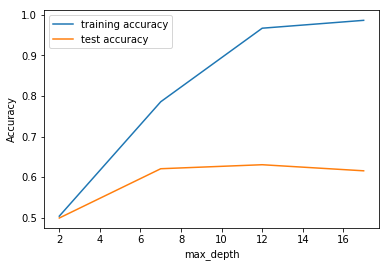

In [244]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


### Tuning n_estimators

In [245]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
rf.fit(X_cv, y_cv)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [246]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.179501,0.003666,0.010599,0.000497,100,{'n_estimators': 100},0.593807,0.563869,0.564899,0.569597,...,0.579313,0.016609,1,0.611797,0.605576,0.604386,0.610959,0.618721,0.610288,0.005117
1,0.908485,0.032727,0.048773,0.001598,500,{'n_estimators': 500},0.575592,0.571168,0.561243,0.576923,...,0.570906,0.005537,2,0.595336,0.600548,0.605756,0.613699,0.594064,0.601881,0.007217
2,1.654454,0.046035,0.091944,0.003635,900,{'n_estimators': 900},0.570128,0.560219,0.563071,0.580586,...,0.569810,0.007501,3,0.592593,0.597806,0.603929,0.614612,0.590868,0.599961,0.008626
3,2.465460,0.146829,0.137723,0.018958,1300,{'n_estimators': 1300},0.570128,0.552920,0.563071,0.582418,...,0.568348,0.009909,4,0.598537,0.599634,0.602558,0.613242,0.594064,0.601607,0.006426


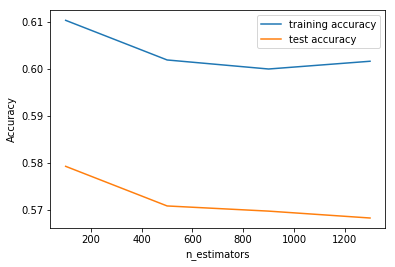

In [247]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning max_features

In [248]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
rf.fit(X_cv, y_cv)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [249]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.017390,0.000800,0.002198,0.000400,4,{'max_features': 4},0.559199,0.549270,0.517367,0.549451,...,0.548611,0.017062,5,0.575674,0.593236,0.560530,0.605023,0.581279,0.583148,0.015174
1,0.023187,0.000747,0.002399,0.000490,8,{'max_features': 8},0.562842,0.563869,0.586837,0.560440,...,0.570541,0.010379,4,0.625514,0.631627,0.639561,0.610502,0.603653,0.622172,0.013282
2,0.029583,0.001019,0.001799,0.000400,14,{'max_features': 14},0.599271,0.598540,0.608775,0.644689,...,0.614401,0.017149,3,0.645633,0.659049,0.671083,0.656164,0.654795,0.657345,0.008206
3,0.041376,0.000799,0.002399,0.000490,20,{'max_features': 20},0.646630,0.625912,0.636197,0.604396,...,0.631579,0.015424,1,0.685871,0.669104,0.684788,0.653881,0.679909,0.674711,0.011987
4,0.047777,0.002712,0.002603,0.000493,24,{'max_features': 24},0.644809,0.616788,0.601463,0.626374,...,0.631213,0.022610,2,0.691358,0.682358,0.665601,0.695890,0.666210,0.680284,0.012523


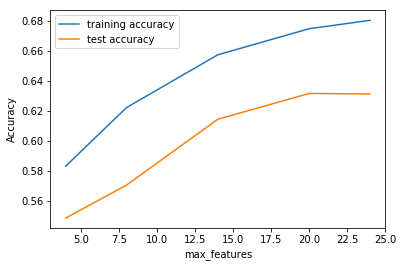

In [250]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning min_samples_leaf

In [251]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
rf.fit(X_cv, y_cv)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [252]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.020196,0.001170,0.001999,8.176054e-07,100,{'min_samples_leaf': 100},0.566485,0.523723,0.553931,0.565934,...,0.552266,0.015549,1,0.597622,0.553931,0.559616,0.596347,0.552511,0.572006,0.020538
1,0.017794,0.000758,0.002004,7.028457e-06,150,{'min_samples_leaf': 150},0.555556,0.529197,0.552102,0.558608,...,0.542398,0.016581,2,0.567901,0.536563,0.559159,0.582192,0.525114,0.554186,0.020750
2,0.016596,0.000489,0.001996,3.686170e-06,200,{'min_samples_leaf': 200},0.493625,0.523723,0.506399,0.501832,...,0.506944,0.009911,3,0.496571,0.529250,0.521243,0.531507,0.518265,0.519367,0.012405
3,0.014993,0.000629,0.001998,8.759539e-06,250,{'min_samples_leaf': 250},0.495446,0.487226,0.493601,0.523810,...,0.497442,0.013580,4,0.501143,0.488117,0.502056,0.521918,0.488584,0.500364,0.012303
4,0.015395,0.000797,0.001998,1.933397e-06,300,{'min_samples_leaf': 300},0.486339,0.487226,0.486289,0.520147,...,0.495614,0.013044,5,0.486968,0.486746,0.486980,0.507763,0.492237,0.492139,0.008081


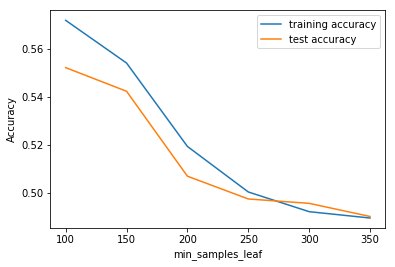

In [253]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning min_samples_split

In [254]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
rf.fit(X_cv, y_cv)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [255]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.024383,0.003001,0.002002,6.547445e-06,200,{'min_samples_split': 200},0.571949,0.562044,0.588665,0.593407,...,0.584795,0.016204,1,0.609968,0.617916,0.624029,0.596804,0.631963,0.616136,0.012065
1,0.022791,0.004661,0.002198,3.990174e-04,250,{'min_samples_split': 250},0.557377,0.585766,0.585009,0.578755,...,0.570906,0.015532,2,0.587563,0.609689,0.620375,0.594064,0.567123,0.595763,0.018385
2,0.020593,0.001858,0.002395,4.926409e-04,300,{'min_samples_split': 300},0.566485,0.538321,0.577697,0.553114,...,0.561038,0.013854,3,0.592135,0.558044,0.614893,0.581279,0.569406,0.583151,0.019550
3,0.025385,0.001743,0.002599,4.899407e-04,350,{'min_samples_split': 350},0.561020,0.552920,0.539305,0.553114,...,0.552997,0.007529,4,0.560128,0.582724,0.555505,0.577626,0.559817,0.567160,0.010872
4,0.018393,0.001014,0.001999,1.907349e-07,400,{'min_samples_split': 400},0.530055,0.518248,0.550274,0.551282,...,0.531433,0.017343,5,0.546868,0.525137,0.565555,0.555708,0.507763,0.540206,0.021009


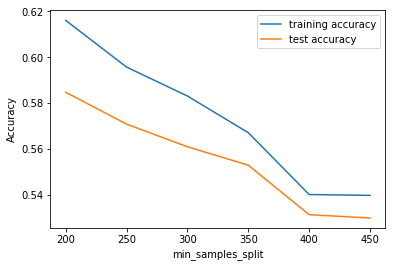

In [256]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Grid Search to Find Optimal Hyperparameters

In [257]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,6,7],
    'min_samples_leaf': [125,150,175],
    'min_samples_split': [275,300,325],
    'n_estimators': [100,900,1000], 
    'max_features': [5,6,8]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [258]:
# Fit the grid search to the data
grid_search.fit(X_cv, y_cv)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   38.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 729 out of 729 | elapsed:  2.7min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [259]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.5376461988304093 using {'max_depth': 6, 'max_features': 8, 'min_samples_leaf': 125, 'min_samples_split': 275, 'n_estimators': 100}


## Fitting the final model

In [260]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=7,
                             min_samples_leaf=125, 
                             min_samples_split=275,
                             max_features=8,
                             n_estimators=100)

In [261]:
# fit
rfc.fit(X_cv,y_cv)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=125, min_samples_split=275,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [262]:
# predict
y_test_pred = rfc.predict(X_test)

In [263]:
y_test_pred[:10]

array([3, 4, 3, 3, 3, 3, 3, 2, 3, 3])

In [264]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [265]:
# Let's see the head
y_pred_1.head()

,0
0,3
1,4
2,3
3,3
4,3


In [266]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Hospital overall rating
2919,3
1240,5
4037,2
1997,4
3014,2


In [267]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [268]:
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
y_pred_final = pd.concat([X_test['Provider ID'],y_pred_final],axis=1)
y_pred_final = y_pred_final.dropna()
y_pred_final.reset_index(drop=True, inplace=True)
y_pred_final.head()

,Provider ID,Hospital overall rating,0
0,10039.0,4.0,3.0
1,10040.0,3.0,3.0
2,10044.0,3.0,3.0
3,10046.0,3.0,3.0
4,10049.0,4.0,3.0


In [269]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'predicted_rating'})

In [270]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Provider ID','Hospital overall rating','predicted_rating'], axis=1)

In [271]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Provider ID,Hospital overall rating,predicted_rating
0,10039.0,4.0,3.0
1,10040.0,3.0,3.0
2,10044.0,3.0,3.0
3,10046.0,3.0,3.0
4,10049.0,4.0,3.0


In [272]:
# Let's check the overall accuracy.
import sklearn.metrics as metrics
metrics.accuracy_score(y_pred_final['Hospital overall rating'], y_pred_final['predicted_rating'])

0.5706806282722513

In [273]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [274]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.67      0.19      0.29        32
           2       0.58      0.55      0.56       179
           3       0.65      0.80      0.72       440
           4       0.68      0.53      0.59       233
           5       1.00      0.29      0.44        28

    accuracy                           0.65       912
   macro avg       0.71      0.47      0.52       912
weighted avg       0.65      0.65      0.63       912



In [275]:
print(confusion_matrix(y_test,predictions))

[[  6  23   3   0   0]
 [  2  99  76   2   0]
 [  1  47 353  39   0]
 [  0   3 107 123   0]
 [  0   0   2  18   8]]


In [276]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier()
RF_score = cross_val_score(clf1, X_cv, y_cv, cv=10, scoring='accuracy').mean()
RF_score

0.61123498959209

### The accuracy is 64%

## PCA and Clustering

In [277]:
from sklearn.preprocessing import StandardScaler

In [278]:
df_pca = df_final.drop(['Provider ID'],1)

In [279]:
df_pca.columns

Index(['Hospital overall rating', 'COMP_HIP_KNEE', 'PSI_4_SURG_COMP',
       'PSI_90_SAFETY', 'OP_10', 'OP_11', 'OP_13', 'OP_14', 'OP_8',
       'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF',
       'MORT_30_PN', 'MORT_30_STK', 'READM_30_AMI', 'READM_30_CABG',
       'READM_30_COPD', 'READM_30_HF', 'READM_30_HIP_KNEE',
       'READM_30_HOSP_WIDE', 'READM_30_PN', 'READM_30_STK', 'CAC_3', 'ED_1b',
       'ED_2b', 'IMM_2', 'IMM_3', 'OP_18b', 'OP_20', 'OP_21', 'OP_22', 'OP_23',
       'OP_3', 'OP_4', 'OP_5', 'PC_01', 'STK_1', 'STK_4', 'STK_6', 'STK_8',
       'VTE_1', 'VTE_2', 'VTE_3', 'VTE_5', 'VTE_6', 'H_CLEAN_HSP', 'H_COMP_1',
       'H_COMP_2', 'H_COMP_3', 'H_COMP_4', 'H_COMP_5', 'H_COMP_6', 'H_COMP_7',
       'H_HSP_RATING', 'H_QUIET_HSP', 'H_RECMND', 'HAI_1', 'HAI_2', 'HAI_3',
       'HAI_4', 'HAI_5', 'HAI_6'],
      dtype='object')

In [280]:
numeric = ['COMP_HIP_KNEE','PSI_4_SURG_COMP', 'PSI_90_SAFETY', 'OP_10', 'OP_11', 'OP_13', 'OP_14','OP_8', 'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF','MORT_30_PN', 'MORT_30_STK', 'READM_30_AMI', 'READM_30_CABG','READM_30_COPD', 'READM_30_HF', 'READM_30_HIP_KNEE','READM_30_HOSP_WIDE', 'READM_30_PN', 'READM_30_STK', 'CAC_3', 'ED_1b','ED_2b', 'IMM_2', 'IMM_3', 'OP_18b', 'OP_20', 'OP_21', 'OP_22', 'OP_23','OP_3', 'OP_4', 'OP_5', 'PC_01', 'STK_1', 'STK_4', 'STK_6', 'STK_8','VTE_1', 'VTE_2', 'VTE_3', 'VTE_5', 'VTE_6', 'H_CLEAN_HSP', 'H_COMP_1','H_COMP_2', 'H_COMP_3', 'H_COMP_4', 'H_COMP_5', 'H_COMP_6', 'H_COMP_7','H_HSP_RATING', 'H_QUIET_HSP', 'H_RECMND', 'HAI_1', 'HAI_2', 'HAI_3','HAI_4', 'HAI_5', 'HAI_6']

In [281]:
scaler = StandardScaler()
df_pca[numeric] = scaler.fit_transform(df_pca[numeric])
df_pca

,Hospital overall rating,COMP_HIP_KNEE,PSI_4_SURG_COMP,PSI_90_SAFETY,OP_10,OP_11,OP_13,OP_14,OP_8,MORT_30_AMI,...,H_COMP_7,H_HSP_RATING,H_QUIET_HSP,H_RECMND,HAI_1,HAI_2,HAI_3,HAI_4,HAI_5,HAI_6
0,3,1.106393,1.438608,-0.170633,-0.177091,-0.334487,1.535552,0.333343,1.062926,0.490396,...,0.0,0.0,0.0,0.0,3.717869,3.429952,2.189166,-0.285226,-0.167453,0.365935
1,3,0.551895,1.593622,0.290135,0.541828,1.390778,0.885255,1.140701,1.295044,1.007234,...,0.0,0.0,0.0,0.0,0.825197,0.044476,-0.492519,-0.285226,0.186926,-0.616352
2,2,1.106393,1.870607,0.452759,0.385542,0.351909,-1.029508,1.443461,1.433327,1.110601,...,0.0,0.0,0.0,0.0,-0.005455,0.908674,-0.501160,-0.285226,0.659431,-0.279568
3,3,-1.527472,-0.978688,0.127511,1.687932,0.630177,-1.029508,-0.877696,-0.818710,-1.355451,...,0.0,0.0,0.0,0.0,-0.581484,-0.656112,-0.547247,-0.285226,-0.468393,-1.067949
4,3,-1.527472,-0.978688,0.425655,-0.468826,-0.501448,-1.029508,-0.574936,-0.818710,-1.355451,...,0.0,0.0,0.0,0.0,-0.581484,-0.656112,-0.547247,-0.285226,-0.468393,-0.993959
5,2,1.037080,1.290059,0.669591,-0.593856,1.427880,-1.029508,0.837942,0.969091,0.697131,...,0.0,0.0,0.0,0.0,0.712496,0.241647,1.457536,-0.285226,0.442866,0.309804
6,3,0.413270,-0.978688,0.425655,-0.208348,1.502085,0.090448,-0.877696,-0.818710,1.125368,...,0.0,0.0,0.0,0.0,-0.581484,-0.656112,-0.547247,-0.285226,-0.468393,-0.970996
7,3,0.413270,1.262188,0.154615,2.427689,-0.223179,0.668490,0.938862,1.048110,0.815266,...,0.0,0.0,0.0,0.0,-0.026325,0.027695,0.216068,-0.285226,0.662243,0.210300
9,2,-0.279852,0.966240,0.642487,1.344101,-0.353038,-1.029508,1.342541,1.077742,0.948167,...,0.0,0.0,0.0,0.0,-0.093111,-0.639332,-0.486758,-0.285226,0.811307,-0.685240
10,4,1.175705,-0.978688,0.723799,-0.406311,-0.260282,-0.487594,-0.877696,1.793850,-1.355451,...,0.0,0.0,0.0,0.0,-0.581484,-0.656112,-0.547247,-0.285226,-0.468393,-1.037333


In [282]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [283]:
# PCA on the data
pca.fit(df_pca)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [284]:
pca.components_

array([[ 6.45741528e-02, -1.38514555e-01, -2.00670915e-01, ...,
        -7.07758679e-02, -1.14583134e-01, -1.76322062e-01],
       [ 1.24763215e-01,  4.88128366e-02,  8.86693767e-02, ...,
         9.56677582e-02,  7.01083303e-02,  8.89671840e-02],
       [-1.37005844e-01, -1.50967975e-01,  1.05829934e-01, ...,
         1.34823816e-01,  1.87674738e-01,  3.83693767e-02],
       ...,
       [ 0.00000000e+00,  2.08793249e-17, -4.26083447e-17, ...,
         2.57782688e-17, -1.47586092e-17,  1.43575002e-17],
       [-0.00000000e+00, -8.71625964e-19,  9.72821501e-18, ...,
         1.63669417e-18,  9.70175137e-18,  1.52102723e-17],
       [-0.00000000e+00,  6.49570948e-17,  3.01798332e-17, ...,
        -8.92611031e-18, -3.85569275e-18,  6.69615833e-17]])

In [285]:
pca.explained_variance_ratio_

array([2.84331299e-01, 8.55267758e-02, 5.65983904e-02, 5.30322365e-02,
       3.14823526e-02, 2.58180299e-02, 2.50031575e-02, 2.17934022e-02,
       2.03010062e-02, 1.93057632e-02, 1.87816394e-02, 1.76088588e-02,
       1.72909134e-02, 1.67209737e-02, 1.59104113e-02, 1.56638545e-02,
       1.50940595e-02, 1.48694872e-02, 1.44716411e-02, 1.34046742e-02,
       1.32699869e-02, 1.25144199e-02, 1.20422409e-02, 1.14248448e-02,
       1.11253161e-02, 1.08238272e-02, 1.07539340e-02, 1.03914501e-02,
       9.98164588e-03, 9.80236592e-03, 9.47051334e-03, 9.36905142e-03,
       9.08566435e-03, 8.38844757e-03, 7.27047533e-03, 7.10357246e-03,
       6.33209553e-03, 5.89081673e-03, 5.38919136e-03, 4.80613668e-03,
       4.27314966e-03, 4.04580114e-03, 3.28018262e-03, 3.09102858e-03,
       2.86105617e-03, 2.66295806e-03, 2.50090485e-03, 2.47156166e-03,
       1.66670623e-03, 1.40601556e-03, 1.36403825e-03, 1.21912358e-03,
       9.12550439e-04, 1.48048062e-33, 1.48048062e-33, 1.48048062e-33,
      

### Screeplot

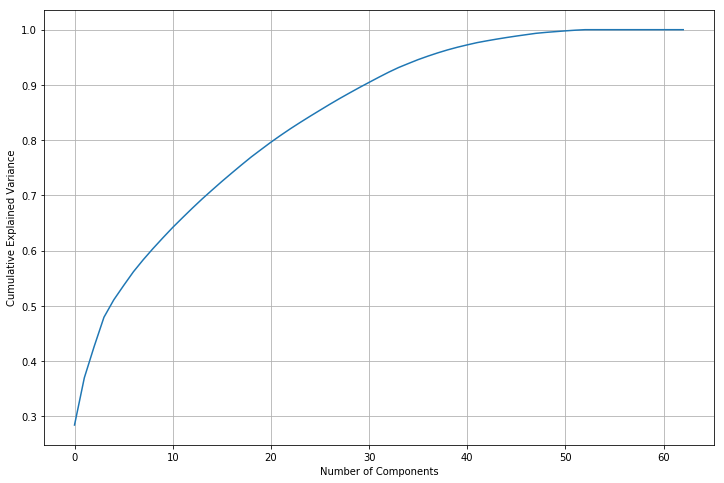

In [286]:
# Plotting the cumulative variance against the number of components
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

Choosing PC as 30 since it gives around 91% variance

In [287]:
colnames = list(df_pca.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df

,PC1,PC2,Feature
0,0.064574,0.124763,Hospital overall rating
1,-0.138515,0.048813,COMP_HIP_KNEE
2,-0.200671,0.088669,PSI_4_SURG_COMP
3,-0.160433,0.080013,PSI_90_SAFETY
4,0.000572,-0.077254,OP_10
5,0.013939,-0.093889,OP_11
6,-0.125737,0.001614,OP_13
7,-0.117569,-0.025588,OP_14
8,-0.105388,0.026120,OP_8
9,-0.207765,-0.019465,MORT_30_AMI


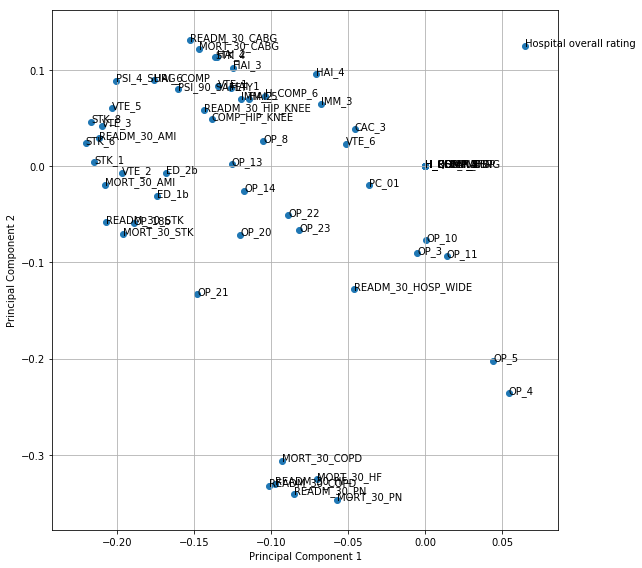

In [288]:
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.grid()
plt.show()

In [289]:
#Using Incremental PCA for efficiency
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=30)

In [290]:
df_train_pca = pca_final.fit_transform(df_pca)
df_pca = pd.DataFrame(df_train_pca)
df_pca.columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30']
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,5.427481,-1.120923,-2.548290,0.447019,2.133258,-1.712844,0.566260,0.438519,-0.165055,-0.450322,...,0.336660,-1.503012,0.399244,0.690113,1.154693,1.108973,-1.511086,1.675995,-0.023504,-0.006194
1,2.523057,1.535194,2.072356,-0.974311,1.071333,0.740672,0.924230,-0.603819,-1.210139,-0.249087,...,0.017987,0.520117,-0.631096,0.234696,0.208867,-0.478368,-1.099142,0.636289,0.864221,0.088463
2,3.159210,-0.411730,-1.003491,-2.047033,0.982577,1.072525,-1.088508,0.181333,-0.273746,-1.202890,...,-1.342731,1.027495,0.112044,1.175422,-1.026101,-0.249708,-0.727875,0.521395,0.716684,1.030721
3,-2.209012,2.869897,0.413703,1.718694,0.877342,1.093745,-1.837763,-0.365285,0.228626,0.702780,...,0.314153,-0.367608,0.844359,0.273561,0.366564,-0.901863,1.309857,0.612574,-0.493739,-0.058538
4,-5.197569,0.840449,-2.087396,1.451486,-0.390197,-0.789553,-2.116200,0.488144,0.323963,-0.860497,...,-1.178240,-0.701378,-0.822633,0.448409,0.156849,-0.224975,0.171658,0.350553,-1.453870,-0.235723
5,2.944246,-0.473955,-2.879332,0.140414,2.010421,-0.071031,0.835219,3.047635,-1.877791,1.301809,...,-1.047748,-0.158565,-0.909463,1.429191,0.138102,0.975703,-0.339690,1.417087,0.613589,-0.144360
6,1.079605,2.730590,1.800317,-0.595882,0.003914,1.131999,-1.657015,0.685746,0.714635,1.794889,...,0.283195,-0.268680,-0.359481,-1.120082,1.203818,-0.308496,0.736178,1.690231,1.262478,0.076468
7,3.641555,-0.510727,-0.571426,-0.952618,2.362091,0.568243,-1.068801,0.147050,-0.599825,-0.159066,...,-0.176599,0.496704,-1.042703,1.071279,-0.749089,-0.450500,0.316298,-0.469595,0.753097,0.512959
8,1.268025,1.973103,1.230108,-0.157558,-0.193458,1.629132,0.150201,-0.106860,0.398475,0.463390,...,-1.786223,0.606038,-0.334075,0.688067,0.309596,-0.747569,0.220715,-0.522611,0.748816,-0.157771
9,-2.513867,0.223825,2.321295,-0.545613,1.404211,-1.126924,-0.074161,0.409185,1.796764,-0.540929,...,-0.562399,0.732363,0.960918,0.710903,0.114697,0.235602,-0.120534,-0.165155,-0.351257,-0.150347


### Coorrelation Matrix
There shouldn't be any correlation between the PCs

In [291]:
corrmat = np.corrcoef(df_train_pca.transpose())

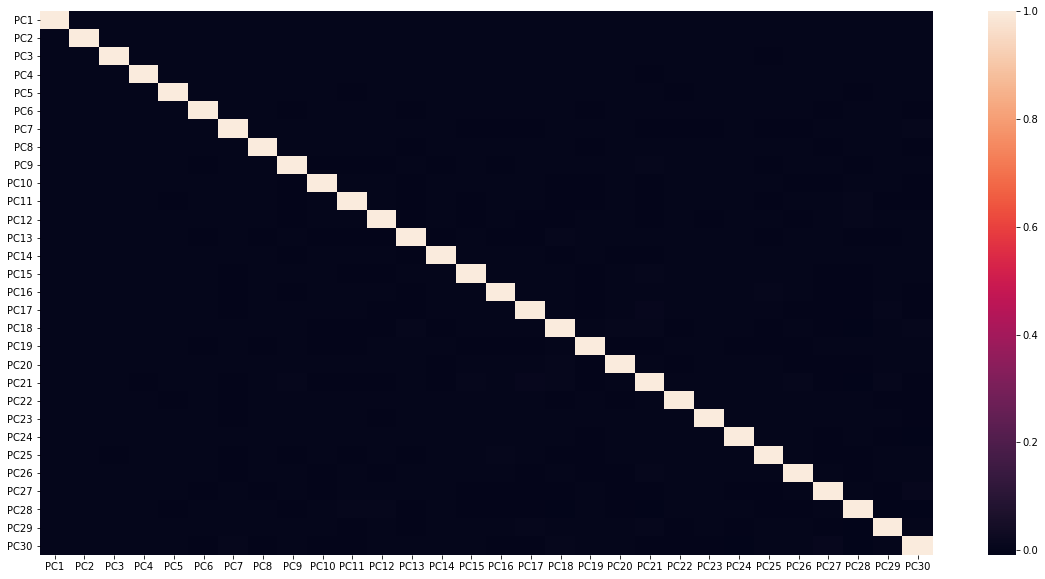

In [292]:
plt.figure(figsize = (20,10))
sns.heatmap(df_pca.corr())
plt.show()

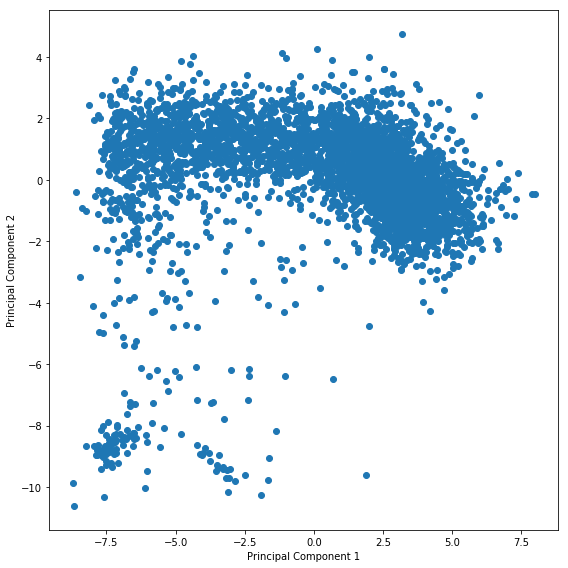

In [293]:
fig = plt.figure(figsize = (8,8))
plt.scatter(df_pca.PC1, df_pca.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

In [294]:
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("maximum correlation:",corrmat_nodiag.max(), ", minimum correlation: ", corrmat_nodiag.min(),)

maximum correlation: 0.008905082481963797 , minimum correlation:  -0.008789390255056177


The correlations are almost 0

In [295]:
provider = pd.DataFrame(df_final['Provider ID'])
provider.reset_index(inplace = True,drop = True)
provider

,Provider ID
0,10001
1,10005
2,10006
3,10007
4,10008
5,10011
6,10012
7,10016
8,10019
9,10021


In [296]:
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,5.427481,-1.120923,-2.548290,0.447019,2.133258,-1.712844,0.566260,0.438519,-0.165055,-0.450322,...,0.336660,-1.503012,0.399244,0.690113,1.154693,1.108973,-1.511086,1.675995,-0.023504,-0.006194
1,2.523057,1.535194,2.072356,-0.974311,1.071333,0.740672,0.924230,-0.603819,-1.210139,-0.249087,...,0.017987,0.520117,-0.631096,0.234696,0.208867,-0.478368,-1.099142,0.636289,0.864221,0.088463
2,3.159210,-0.411730,-1.003491,-2.047033,0.982577,1.072525,-1.088508,0.181333,-0.273746,-1.202890,...,-1.342731,1.027495,0.112044,1.175422,-1.026101,-0.249708,-0.727875,0.521395,0.716684,1.030721
3,-2.209012,2.869897,0.413703,1.718694,0.877342,1.093745,-1.837763,-0.365285,0.228626,0.702780,...,0.314153,-0.367608,0.844359,0.273561,0.366564,-0.901863,1.309857,0.612574,-0.493739,-0.058538
4,-5.197569,0.840449,-2.087396,1.451486,-0.390197,-0.789553,-2.116200,0.488144,0.323963,-0.860497,...,-1.178240,-0.701378,-0.822633,0.448409,0.156849,-0.224975,0.171658,0.350553,-1.453870,-0.235723
5,2.944246,-0.473955,-2.879332,0.140414,2.010421,-0.071031,0.835219,3.047635,-1.877791,1.301809,...,-1.047748,-0.158565,-0.909463,1.429191,0.138102,0.975703,-0.339690,1.417087,0.613589,-0.144360
6,1.079605,2.730590,1.800317,-0.595882,0.003914,1.131999,-1.657015,0.685746,0.714635,1.794889,...,0.283195,-0.268680,-0.359481,-1.120082,1.203818,-0.308496,0.736178,1.690231,1.262478,0.076468
7,3.641555,-0.510727,-0.571426,-0.952618,2.362091,0.568243,-1.068801,0.147050,-0.599825,-0.159066,...,-0.176599,0.496704,-1.042703,1.071279,-0.749089,-0.450500,0.316298,-0.469595,0.753097,0.512959
8,1.268025,1.973103,1.230108,-0.157558,-0.193458,1.629132,0.150201,-0.106860,0.398475,0.463390,...,-1.786223,0.606038,-0.334075,0.688067,0.309596,-0.747569,0.220715,-0.522611,0.748816,-0.157771
9,-2.513867,0.223825,2.321295,-0.545613,1.404211,-1.126924,-0.074161,0.409185,1.796764,-0.540929,...,-0.562399,0.732363,0.960918,0.710903,0.114697,0.235602,-0.120534,-0.165155,-0.351257,-0.150347


In [297]:
df_pca = pd.concat([provider, df_pca], axis=1)
df_pca

,Provider ID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,10001,5.427481,-1.120923,-2.548290,0.447019,2.133258,-1.712844,0.566260,0.438519,-0.165055,...,0.336660,-1.503012,0.399244,0.690113,1.154693,1.108973,-1.511086,1.675995,-0.023504,-0.006194
1,10005,2.523057,1.535194,2.072356,-0.974311,1.071333,0.740672,0.924230,-0.603819,-1.210139,...,0.017987,0.520117,-0.631096,0.234696,0.208867,-0.478368,-1.099142,0.636289,0.864221,0.088463
2,10006,3.159210,-0.411730,-1.003491,-2.047033,0.982577,1.072525,-1.088508,0.181333,-0.273746,...,-1.342731,1.027495,0.112044,1.175422,-1.026101,-0.249708,-0.727875,0.521395,0.716684,1.030721
3,10007,-2.209012,2.869897,0.413703,1.718694,0.877342,1.093745,-1.837763,-0.365285,0.228626,...,0.314153,-0.367608,0.844359,0.273561,0.366564,-0.901863,1.309857,0.612574,-0.493739,-0.058538
4,10008,-5.197569,0.840449,-2.087396,1.451486,-0.390197,-0.789553,-2.116200,0.488144,0.323963,...,-1.178240,-0.701378,-0.822633,0.448409,0.156849,-0.224975,0.171658,0.350553,-1.453870,-0.235723
5,10011,2.944246,-0.473955,-2.879332,0.140414,2.010421,-0.071031,0.835219,3.047635,-1.877791,...,-1.047748,-0.158565,-0.909463,1.429191,0.138102,0.975703,-0.339690,1.417087,0.613589,-0.144360
6,10012,1.079605,2.730590,1.800317,-0.595882,0.003914,1.131999,-1.657015,0.685746,0.714635,...,0.283195,-0.268680,-0.359481,-1.120082,1.203818,-0.308496,0.736178,1.690231,1.262478,0.076468
7,10016,3.641555,-0.510727,-0.571426,-0.952618,2.362091,0.568243,-1.068801,0.147050,-0.599825,...,-0.176599,0.496704,-1.042703,1.071279,-0.749089,-0.450500,0.316298,-0.469595,0.753097,0.512959
8,10019,1.268025,1.973103,1.230108,-0.157558,-0.193458,1.629132,0.150201,-0.106860,0.398475,...,-1.786223,0.606038,-0.334075,0.688067,0.309596,-0.747569,0.220715,-0.522611,0.748816,-0.157771
9,10021,-2.513867,0.223825,2.321295,-0.545613,1.404211,-1.126924,-0.074161,0.409185,1.796764,...,-0.562399,0.732363,0.960918,0.710903,0.114697,0.235602,-0.120534,-0.165155,-0.351257,-0.150347


### Outliers Treatment

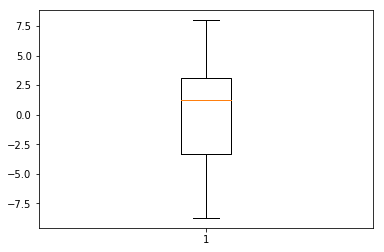

In [298]:
plt.boxplot(df_pca.PC1)
Q1 = df_pca.PC1.quantile(0.25)
Q3 = df_pca.PC1.quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC1 >= Q1 - 1.5*IQR) & (df_pca.PC1 <= Q3 + 1.5*IQR)]
plt.show()

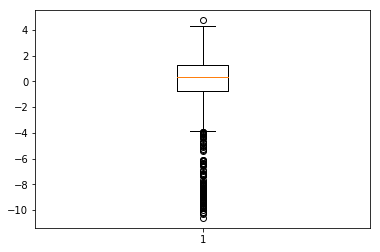

In [299]:
plt.boxplot(df_pca.PC2)
Q1 = df_pca.PC2.quantile(0.25)
Q3 = df_pca.PC2.quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC2 >= Q1 - 1.5*IQR) & (df_pca.PC2 <= Q3 + 1.5*IQR)]
plt.show()

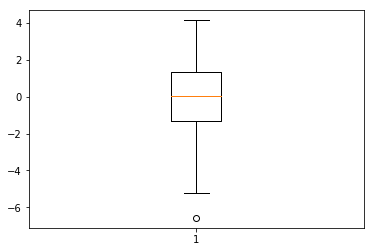

In [300]:
plt.boxplot(df_pca.PC3)
Q1 = df_pca.PC3.quantile(0.25)
Q3 = df_pca.PC3.quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC3 >= Q1 - 1.5*IQR) & (df_pca.PC3 <= Q3 + 1.5*IQR)]
plt.show()

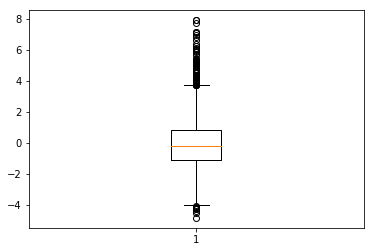

In [301]:
plt.boxplot(df_pca.PC4)
Q1 = df_pca.PC4.quantile(0.25)
Q3 = df_pca.PC4.quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC4 >= Q1 - 1.5*IQR) & (df_pca.PC4 <= Q3 + 1.5*IQR)]
plt.show()

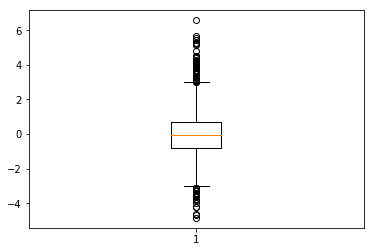

In [302]:
plt.boxplot(df_pca.PC5)
Q1 = df_pca.PC5.quantile(0.25)
Q3 = df_pca.PC5.quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC5 >= Q1 - 1.5*IQR) & (df_pca.PC5 <= Q3 + 1.5*IQR)]
plt.show()

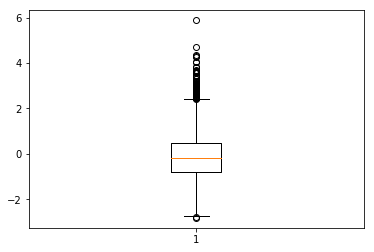

In [303]:
plt.boxplot(df_pca.PC6)
Q1 = df_pca.PC6.quantile(0.25)
Q3 = df_pca.PC6.quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC6 >= Q1 - 1.5*IQR) & (df_pca.PC6 <= Q3 + 1.5*IQR)]
plt.show()

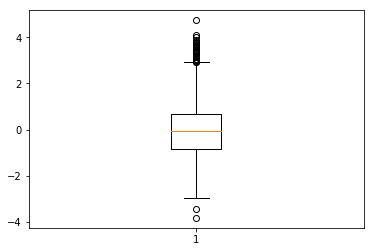

In [304]:
plt.boxplot(df_pca.PC7)
Q1 = df_pca.PC7.quantile(0.25)
Q3 = df_pca.PC7.quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC7 >= Q1 - 1.5*IQR) & (df_pca.PC7 <= Q3 + 1.5*IQR)]
plt.show()

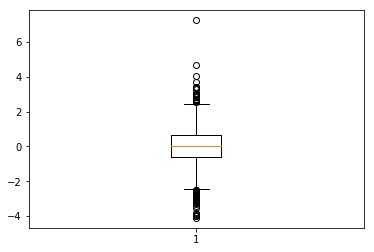

In [305]:
plt.boxplot(df_pca.PC8)
Q1 = df_pca.PC8.quantile(0.25)
Q3 = df_pca.PC8.quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC8 >= Q1 - 1.5*IQR) & (df_pca.PC8 <= Q3 + 1.5*IQR)]
plt.show()

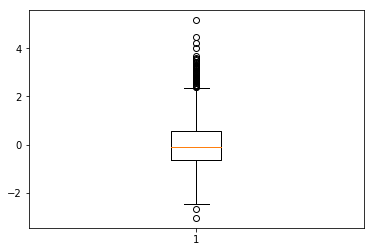

In [306]:
plt.boxplot(df_pca.PC9)
Q1 = df_pca.PC9.quantile(0.25)
Q3 = df_pca.PC9.quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC9 >= Q1 - 1.5*IQR) & (df_pca.PC9 <= Q3 + 1.5*IQR)]
plt.show()

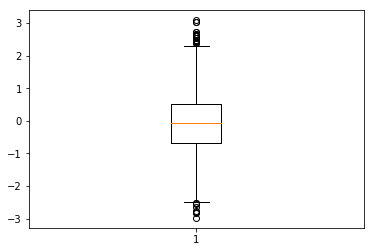

In [307]:
plt.boxplot(df_pca.PC10)
Q1 = df_pca.PC10.quantile(0.25)
Q3 = df_pca.PC10.quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC10 >= Q1 - 1.5*IQR) & (df_pca.PC10 <= Q3 + 1.5*IQR)]
plt.show()

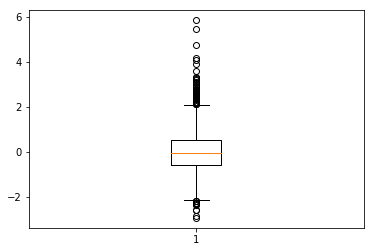

In [308]:
plt.boxplot(df_pca.PC11)
Q1 = df_pca.PC11.quantile(0.25)
Q3 = df_pca.PC11.quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC11 >= Q1 - 1.5*IQR) & (df_pca.PC11 <= Q3 + 1.5*IQR)]
plt.show()

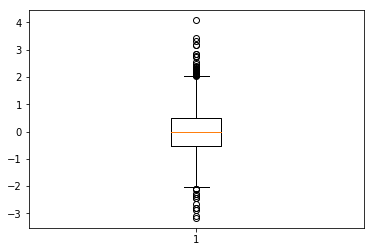

In [309]:
plt.boxplot(df_pca.PC12)
Q1 = df_pca.PC12.quantile(0.25)
Q3 = df_pca.PC12.quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC12 >= Q1 - 1.5*IQR) & (df_pca.PC12 <= Q3 + 1.5*IQR)]
plt.show()

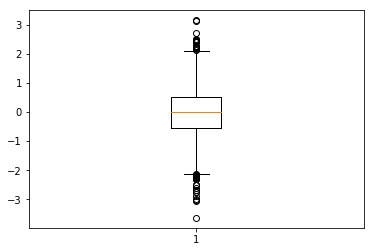

In [310]:
plt.boxplot(df_pca.PC13)
Q1 = df_pca.PC13.quantile(0.25)
Q3 = df_pca.PC13.quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC13 >= Q1 - 1.5*IQR) & (df_pca.PC13 <= Q3 + 1.5*IQR)]
plt.show()

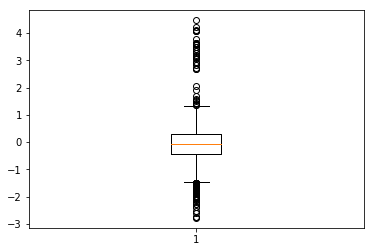

In [311]:
plt.boxplot(df_pca.PC14)
Q1 = df_pca.PC14.quantile(0.25)
Q3 = df_pca.PC14.quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC14 >= Q1 - 1.5*IQR) & (df_pca.PC14 <= Q3 + 1.5*IQR)]
plt.show()

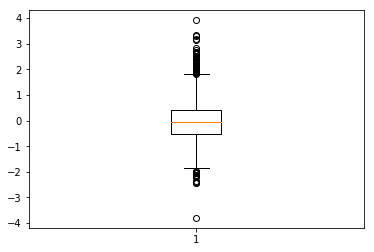

In [312]:
plt.boxplot(df_pca.PC15)
Q1 = df_pca.PC15.quantile(0.25)
Q3 = df_pca.PC15.quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC15 >= Q1 - 1.5*IQR) & (df_pca.PC15 <= Q3 + 1.5*IQR)]
plt.show()

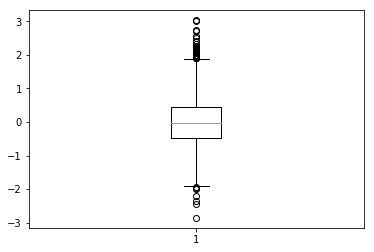

In [313]:
plt.boxplot(df_pca.PC16)
Q1 = df_pca.PC16.quantile(0.25)
Q3 = df_pca.PC16.quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC16 >= Q1 - 1.5*IQR) & (df_pca.PC16 <= Q3 + 1.5*IQR)]
plt.show()

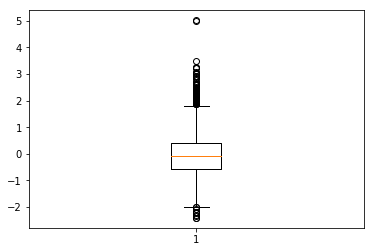

In [314]:
plt.boxplot(df_pca.PC17)
Q1 = df_pca.PC17.quantile(0.25)
Q3 = df_pca.PC17.quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC17 >= Q1 - 1.5*IQR) & (df_pca.PC17 <= Q3 + 1.5*IQR)]
plt.show()

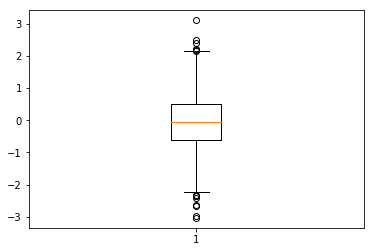

In [315]:
plt.boxplot(df_pca.PC18)
Q1 = df_pca.PC18.quantile(0.25)
Q3 = df_pca.PC18.quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC18 >= Q1 - 1.5*IQR) & (df_pca.PC18 <= Q3 + 1.5*IQR)]
plt.show()

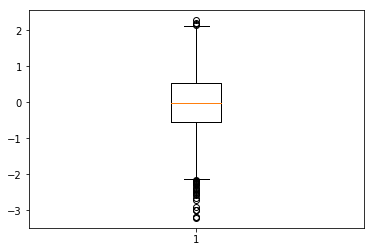

In [316]:
plt.boxplot(df_pca.PC19)
Q1 = df_pca.PC19.quantile(0.25)
Q3 = df_pca.PC19.quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC19 >= Q1 - 1.5*IQR) & (df_pca.PC19 <= Q3 + 1.5*IQR)]
plt.show()

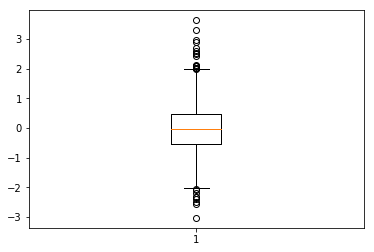

In [317]:
plt.boxplot(df_pca.PC20)
Q1 = df_pca.PC20.quantile(0.25)
Q3 = df_pca.PC20.quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC20 >= Q1 - 1.5*IQR) & (df_pca.PC20 <= Q3 + 1.5*IQR)]
plt.show()

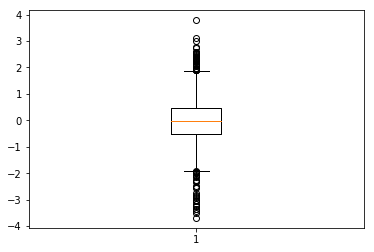

In [318]:
plt.boxplot(df_pca.PC21)
Q1 = df_pca.PC21.quantile(0.25)
Q3 = df_pca.PC21.quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC21 >= Q1 - 1.5*IQR) & (df_pca.PC21 <= Q3 + 1.5*IQR)]
plt.show()

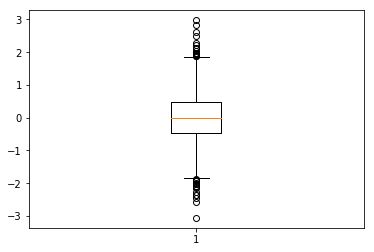

In [319]:
plt.boxplot(df_pca.PC22)
Q1 = df_pca.PC22.quantile(0.25)
Q3 = df_pca.PC22.quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC22 >= Q1 - 1.5*IQR) & (df_pca.PC22 <= Q3 + 1.5*IQR)]
plt.show()

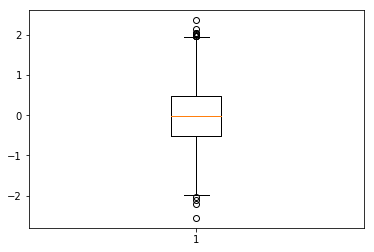

In [320]:
plt.boxplot(df_pca.PC23)
Q1 = df_pca.PC23.quantile(0.25)
Q3 = df_pca.PC23.quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC23 >= Q1 - 1.5*IQR) & (df_pca.PC23 <= Q3 + 1.5*IQR)]
plt.show()

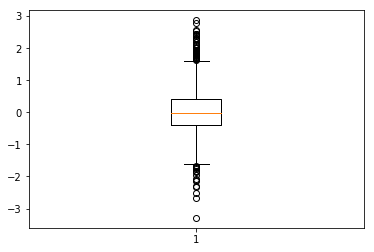

In [321]:
plt.boxplot(df_pca.PC24)
Q1 = df_pca.PC24.quantile(0.25)
Q3 = df_pca.PC24.quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC24 >= Q1 - 1.5*IQR) & (df_pca.PC24 <= Q3 + 1.5*IQR)]
plt.show()

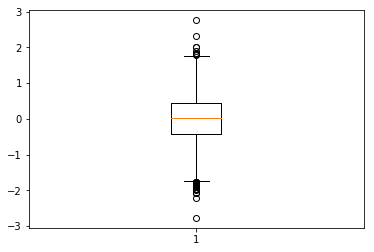

In [322]:
plt.boxplot(df_pca.PC25)
Q1 = df_pca.PC25.quantile(0.25)
Q3 = df_pca.PC25.quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC25 >= Q1 - 1.5*IQR) & (df_pca.PC25 <= Q3 + 1.5*IQR)]
plt.show()

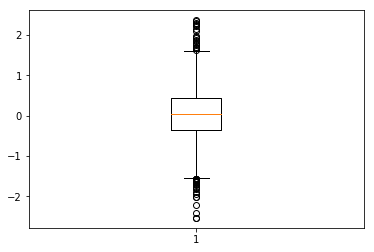

In [323]:
plt.boxplot(df_pca.PC26)
Q1 = df_pca.PC26.quantile(0.25)
Q3 = df_pca.PC26.quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC26 >= Q1 - 1.5*IQR) & (df_pca.PC26 <= Q3 + 1.5*IQR)]
plt.show()

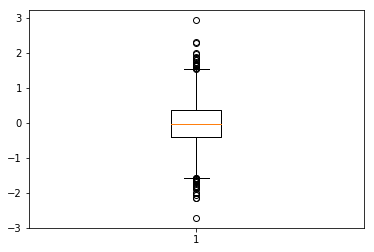

In [324]:
plt.boxplot(df_pca.PC27)
Q1 = df_pca.PC27.quantile(0.25)
Q3 = df_pca.PC27.quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC27 >= Q1 - 1.5*IQR) & (df_pca.PC27 <= Q3 + 1.5*IQR)]
plt.show()

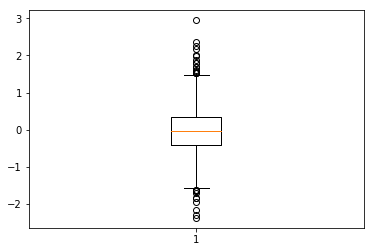

In [325]:
plt.boxplot(df_pca.PC28)
Q1 = df_pca.PC28.quantile(0.25)
Q3 = df_pca.PC28.quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC28 >= Q1 - 1.5*IQR) & (df_pca.PC28 <= Q3 + 1.5*IQR)]
plt.show()

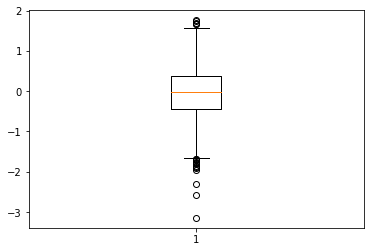

In [326]:
plt.boxplot(df_pca.PC29)
Q1 = df_pca.PC29.quantile(0.25)
Q3 = df_pca.PC29.quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC29 >= Q1 - 1.5*IQR) & (df_pca.PC29 <= Q3 + 1.5*IQR)]
plt.show()

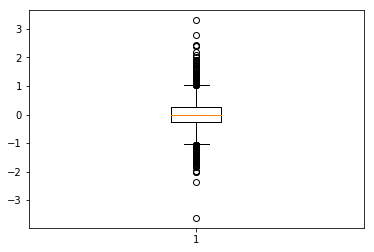

In [327]:
plt.boxplot(df_pca.PC30)
Q1 = df_pca.PC30.quantile(0.25)
Q3 = df_pca.PC30.quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC30 >= Q1 - 1.5*IQR) & (df_pca.PC30 <= Q3 + 1.5*IQR)]
plt.show()

In [328]:
# Checking the shape of the data set
df_pca.shape

(2022, 31)

In [329]:
# Making provider dataset
provider_1 = pd.DataFrame(df_pca["Provider ID"])

In [330]:
# Dropping provider to proceed with clustering
df_pca = df_pca.drop(['Provider ID'],1)
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
1,2.523057,1.535194,2.072356,-0.974311,1.071333,0.740672,0.924230,-0.603819,-1.210139,-0.249087,...,0.017987,0.520117,-0.631096,0.234696,0.208867,-0.478368,-1.099142,0.636289,0.864221,0.088463
2,3.159210,-0.411730,-1.003491,-2.047033,0.982577,1.072525,-1.088508,0.181333,-0.273746,-1.202890,...,-1.342731,1.027495,0.112044,1.175422,-1.026101,-0.249708,-0.727875,0.521395,0.716684,1.030721
3,-2.209012,2.869897,0.413703,1.718694,0.877342,1.093745,-1.837763,-0.365285,0.228626,0.702780,...,0.314153,-0.367608,0.844359,0.273561,0.366564,-0.901863,1.309857,0.612574,-0.493739,-0.058538
4,-5.197569,0.840449,-2.087396,1.451486,-0.390197,-0.789553,-2.116200,0.488144,0.323963,-0.860497,...,-1.178240,-0.701378,-0.822633,0.448409,0.156849,-0.224975,0.171658,0.350553,-1.453870,-0.235723
7,3.641555,-0.510727,-0.571426,-0.952618,2.362091,0.568243,-1.068801,0.147050,-0.599825,-0.159066,...,-0.176599,0.496704,-1.042703,1.071279,-0.749089,-0.450500,0.316298,-0.469595,0.753097,0.512959
8,1.268025,1.973103,1.230108,-0.157558,-0.193458,1.629132,0.150201,-0.106860,0.398475,0.463390,...,-1.786223,0.606038,-0.334075,0.688067,0.309596,-0.747569,0.220715,-0.522611,0.748816,-0.157771
9,-2.513867,0.223825,2.321295,-0.545613,1.404211,-1.126924,-0.074161,0.409185,1.796764,-0.540929,...,-0.562399,0.732363,0.960918,0.710903,0.114697,0.235602,-0.120534,-0.165155,-0.351257,-0.150347
10,-4.825132,1.411508,-0.035219,1.723726,0.561204,-0.841359,-1.176897,-0.624625,0.951386,-0.359678,...,0.601836,-0.208727,-0.035749,0.537126,-0.608736,-0.186358,-0.159331,-0.171933,-0.247424,-0.213545
14,-5.222604,0.920438,-0.663343,2.133025,0.004483,-2.105873,-1.433051,-0.451929,0.347948,-0.809769,...,-1.404981,-0.213952,-0.699512,-0.234300,-0.073426,0.182103,0.086412,0.629536,-1.042163,-0.218330
15,5.624186,-1.140138,-2.150904,0.546434,1.806138,0.088852,1.323075,-0.184471,0.155544,-0.532571,...,1.116029,0.581532,-0.357343,-0.695251,0.700885,-0.619868,1.282685,-0.973583,-0.060400,-1.043362


### Hopkins Statistics
Hopkins Statistics help us to decide whether the cluters can be formed easily or not. If the values are:
- 0.01 - 0.3 : Low chase of clustering
- around 0.5 : Random 
- 0.7 - 0.99 : High chance of clustering

In [331]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [332]:
hopkins(df_pca)

0.7020243489629402

Since the value is 0.7 and is between 0.7 - 0.99, there is a high chance of clustering to be formed

### K- Means

In [333]:
# To perform KMeans clustering 
from sklearn.cluster import KMeans

In [334]:
# Kmeans with K=3
model_clus4 = KMeans(n_clusters = 3, max_iter=50)
model_clus4.fit(df_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Silhouette Analysis
- Value of the silhouette score range is in between -1 to 1.
- A score closer to 1 : The data point is very similar to other data points in the cluster
- A score closer to -1 : The data point is not similar to the data points in its cluster.

In [335]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(df_pca)
    sse_.append([k, silhouette_score(df_pca, kmeans.labels_)])

In [336]:
no_of_clusters = [2, 3, 4, 5, 6]
for n_clusters in no_of_clusters: 
  
    cluster = KMeans(n_clusters = n_clusters) 
    cluster_labels = cluster.fit_predict(df_pca) 
  
    # The silhouette_score gives the  
    # average value for all the samples. 
    silhouette_avg = silhouette_score(df_pca, cluster_labels) 
  
    print("For no of clusters =", n_clusters, 
          " The average silhouette_score is :", silhouette_avg) 

For no of clusters = 2  The average silhouette_score is : 0.3148907280195092
For no of clusters = 3  The average silhouette_score is : 0.2043970364423357
For no of clusters = 4  The average silhouette_score is : 0.1756200227264287
For no of clusters = 5  The average silhouette_score is : 0.14552316688209305
For no of clusters = 6  The average silhouette_score is : 0.12831001382502097


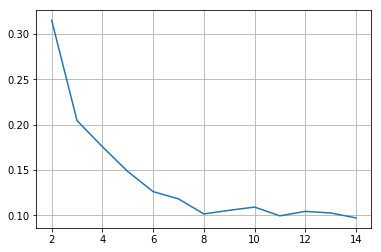

In [337]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
plt.grid()
plt.show()

### Sum of Squared Distances

In [338]:
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_pca)
    ssd.append(model_clus.inertia_)

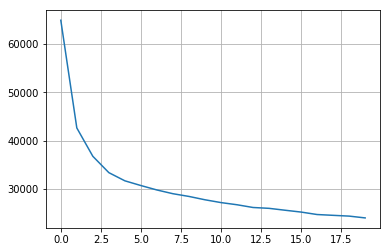

In [339]:
plt.plot(ssd)
plt.grid()
plt.show()

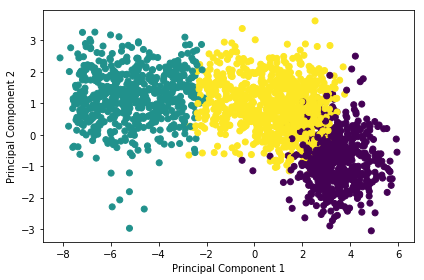

In [340]:
plt.scatter(df_pca['PC1'], df_pca['PC2'],c=model_clus4.labels_)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

### Analysis of clusters formed

In [341]:
df_pca.index = pd.RangeIndex(len(df_pca.index))
df_pca_km = pd.concat([df_pca, pd.Series(model_clus4.labels_)], axis=1)
df_pca_km.columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30', 'ClusterID']
df_pca_km

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,ClusterID
0,2.523057,1.535194,2.072356,-0.974311,1.071333,0.740672,0.924230,-0.603819,-1.210139,-0.249087,...,0.520117,-0.631096,0.234696,0.208867,-0.478368,-1.099142,0.636289,0.864221,0.088463,2
1,3.159210,-0.411730,-1.003491,-2.047033,0.982577,1.072525,-1.088508,0.181333,-0.273746,-1.202890,...,1.027495,0.112044,1.175422,-1.026101,-0.249708,-0.727875,0.521395,0.716684,1.030721,0
2,-2.209012,2.869897,0.413703,1.718694,0.877342,1.093745,-1.837763,-0.365285,0.228626,0.702780,...,-0.367608,0.844359,0.273561,0.366564,-0.901863,1.309857,0.612574,-0.493739,-0.058538,1
3,-5.197569,0.840449,-2.087396,1.451486,-0.390197,-0.789553,-2.116200,0.488144,0.323963,-0.860497,...,-0.701378,-0.822633,0.448409,0.156849,-0.224975,0.171658,0.350553,-1.453870,-0.235723,1
4,3.641555,-0.510727,-0.571426,-0.952618,2.362091,0.568243,-1.068801,0.147050,-0.599825,-0.159066,...,0.496704,-1.042703,1.071279,-0.749089,-0.450500,0.316298,-0.469595,0.753097,0.512959,0
5,1.268025,1.973103,1.230108,-0.157558,-0.193458,1.629132,0.150201,-0.106860,0.398475,0.463390,...,0.606038,-0.334075,0.688067,0.309596,-0.747569,0.220715,-0.522611,0.748816,-0.157771,2
6,-2.513867,0.223825,2.321295,-0.545613,1.404211,-1.126924,-0.074161,0.409185,1.796764,-0.540929,...,0.732363,0.960918,0.710903,0.114697,0.235602,-0.120534,-0.165155,-0.351257,-0.150347,2
7,-4.825132,1.411508,-0.035219,1.723726,0.561204,-0.841359,-1.176897,-0.624625,0.951386,-0.359678,...,-0.208727,-0.035749,0.537126,-0.608736,-0.186358,-0.159331,-0.171933,-0.247424,-0.213545,1
8,-5.222604,0.920438,-0.663343,2.133025,0.004483,-2.105873,-1.433051,-0.451929,0.347948,-0.809769,...,-0.213952,-0.699512,-0.234300,-0.073426,0.182103,0.086412,0.629536,-1.042163,-0.218330,1
9,5.624186,-1.140138,-2.150904,0.546434,1.806138,0.088852,1.323075,-0.184471,0.155544,-0.532571,...,0.581532,-0.357343,-0.695251,0.700885,-0.619868,1.282685,-0.973583,-0.060400,-1.043362,0


In [342]:
df_pca_km.shape

(2022, 31)

In [343]:
# Merging country and the above data set
df_pca_km = pd.merge(df_pca_km,provider_1,on=df_pca_km['PC1'])
df_pca_km = df_pca_km.drop('key_0', 1)
df_pca_km

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,ClusterID,Provider ID
0,2.523057,1.535194,2.072356,-0.974311,1.071333,0.740672,0.924230,-0.603819,-1.210139,-0.249087,...,-0.631096,0.234696,0.208867,-0.478368,-1.099142,0.636289,0.864221,0.088463,2,10005
1,3.159210,-0.411730,-1.003491,-2.047033,0.982577,1.072525,-1.088508,0.181333,-0.273746,-1.202890,...,0.112044,1.175422,-1.026101,-0.249708,-0.727875,0.521395,0.716684,1.030721,0,10006
2,-2.209012,2.869897,0.413703,1.718694,0.877342,1.093745,-1.837763,-0.365285,0.228626,0.702780,...,0.844359,0.273561,0.366564,-0.901863,1.309857,0.612574,-0.493739,-0.058538,1,10007
3,-5.197569,0.840449,-2.087396,1.451486,-0.390197,-0.789553,-2.116200,0.488144,0.323963,-0.860497,...,-0.822633,0.448409,0.156849,-0.224975,0.171658,0.350553,-1.453870,-0.235723,1,10008
4,3.641555,-0.510727,-0.571426,-0.952618,2.362091,0.568243,-1.068801,0.147050,-0.599825,-0.159066,...,-1.042703,1.071279,-0.749089,-0.450500,0.316298,-0.469595,0.753097,0.512959,0,10016
5,1.268025,1.973103,1.230108,-0.157558,-0.193458,1.629132,0.150201,-0.106860,0.398475,0.463390,...,-0.334075,0.688067,0.309596,-0.747569,0.220715,-0.522611,0.748816,-0.157771,2,10019
6,-2.513867,0.223825,2.321295,-0.545613,1.404211,-1.126924,-0.074161,0.409185,1.796764,-0.540929,...,0.960918,0.710903,0.114697,0.235602,-0.120534,-0.165155,-0.351257,-0.150347,2,10021
7,-4.825132,1.411508,-0.035219,1.723726,0.561204,-0.841359,-1.176897,-0.624625,0.951386,-0.359678,...,-0.035749,0.537126,-0.608736,-0.186358,-0.159331,-0.171933,-0.247424,-0.213545,1,10022
8,-5.222604,0.920438,-0.663343,2.133025,0.004483,-2.105873,-1.433051,-0.451929,0.347948,-0.809769,...,-0.699512,-0.234300,-0.073426,0.182103,0.086412,0.629536,-1.042163,-0.218330,1,10032
9,5.624186,-1.140138,-2.150904,0.546434,1.806138,0.088852,1.323075,-0.184471,0.155544,-0.532571,...,-0.357343,-0.695251,0.700885,-0.619868,1.282685,-0.973583,-0.060400,-1.043362,0,10033


In [344]:
df_provider_clusterid = pd.merge(df_pca_km,df_final,on='Provider ID',how='inner')
df_provider_clusterid

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,H_COMP_7,H_HSP_RATING,H_QUIET_HSP,H_RECMND,HAI_1,HAI_2,HAI_3,HAI_4,HAI_5,HAI_6
0,2.523057,1.535194,2.072356,-0.974311,1.071333,0.740672,0.924230,-0.603819,-1.210139,-0.249087,...,0,0,0,0,0.337,0.167,0.019,0.000,0.233,0.177
1,3.159210,-0.411730,-1.003491,-2.047033,0.982577,1.072525,-1.088508,0.181333,-0.273746,-1.202890,...,0,0,0,0,0.138,0.373,0.016,0.000,0.401,0.309
2,-2.209012,2.869897,0.413703,1.718694,0.877342,1.093745,-1.837763,-0.365285,0.228626,0.702780,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
3,-5.197569,0.840449,-2.087396,1.451486,-0.390197,-0.789553,-2.116200,0.488144,0.323963,-0.860497,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.029
4,3.641555,-0.510727,-0.571426,-0.952618,2.362091,0.568243,-1.068801,0.147050,-0.599825,-0.159066,...,0,0,0,0,0.133,0.163,0.265,0.000,0.402,0.501
5,1.268025,1.973103,1.230108,-0.157558,-0.193458,1.629132,0.150201,-0.106860,0.398475,0.463390,...,0,0,0,0,0.117,0.004,0.021,0.000,0.455,0.150
6,-2.513867,0.223825,2.321295,-0.545613,1.404211,-1.126924,-0.074161,0.409185,1.796764,-0.540929,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.012
7,-4.825132,1.411508,-0.035219,1.723726,0.561204,-0.841359,-1.176897,-0.624625,0.951386,-0.359678,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
8,-5.222604,0.920438,-0.663343,2.133025,0.004483,-2.105873,-1.433051,-0.451929,0.347948,-0.809769,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
9,5.624186,-1.140138,-2.150904,0.546434,1.806138,0.088852,1.323075,-0.184471,0.155544,-0.532571,...,0,0,0,0,0.693,0.223,0.633,0.357,0.955,0.709


In [345]:
df_provider_clusterid = df_provider_clusterid.rename(columns = {'Provider ID' : 'Provider_ID', 'Hospital overall rating' : 'Hospital_overall_rating'})

In [346]:
km_clusters_PC1 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC1.mean())
km_clusters_PC2 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC2.mean())
km_clusters_PC3 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC3.mean())
km_clusters_PC4 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC4.mean())
km_clusters_PC5 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC5.mean())
km_clusters_PC6 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC6.mean())
km_clusters_PC7 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC7.mean())
km_clusters_PC8 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC8.mean())
km_clusters_PC9 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC9.mean())
km_clusters_PC10 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC10.mean())
km_clusters_PC11 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC11.mean())
km_clusters_PC12 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC12.mean())
km_clusters_PC13 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC13.mean())
km_clusters_PC14 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC14.mean())
km_clusters_PC15 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC15.mean())
km_clusters_PC16 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC16.mean())
km_clusters_PC17 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC17.mean())
km_clusters_PC18 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC18.mean())
km_clusters_PC19 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC19.mean())
km_clusters_PC20 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC20.mean())
km_clusters_PC21 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC21.mean())
km_clusters_PC22 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC22.mean())
km_clusters_PC23 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC23.mean())
km_clusters_PC24 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC24.mean())
km_clusters_PC25 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC25.mean())
km_clusters_PC26 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC26.mean())
km_clusters_PC27 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC27.mean())
km_clusters_PC28 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC28.mean())
km_clusters_PC29 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC29.mean())
km_clusters_PC30 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC30.mean())
km_clusters_Hospital_overall_rating = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).Hospital_overall_rating.mean())
km_clusters_COMP_HIP_KNEE = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).COMP_HIP_KNEE.mean())
km_clusters_PSI_4_SURG_COMP = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PSI_4_SURG_COMP.mean())
km_clusters_PSI_90_SAFETY = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PSI_90_SAFETY.mean())
km_clusters_OP_10 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).OP_10.mean())
km_clusters_OP_11 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).OP_11.mean())
km_clusters_OP_13 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).OP_13.mean())
km_clusters_OP_14 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).OP_14.mean())
km_clusters_OP_8 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).OP_8.mean())
km_clusters_MORT_30_AMI = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).MORT_30_AMI.mean())
km_clusters_MORT_30_CABG = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).MORT_30_CABG.mean())
km_clusters_MORT_30_COPD = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).MORT_30_COPD.mean())
km_clusters_MORT_30_HF = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).MORT_30_HF.mean())
km_clusters_MORT_30_PN = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).MORT_30_PN.mean())
km_clusters_MORT_30_STK = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).MORT_30_STK.mean())
km_clusters_READM_30_AMI = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).READM_30_AMI.mean())
km_clusters_READM_30_CABG = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).READM_30_CABG.mean())
km_clusters_READM_30_COPD = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).READM_30_COPD.mean())
km_clusters_READM_30_HF = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).READM_30_HF.mean())
km_clusters_READM_30_HIP_KNEE = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).READM_30_HIP_KNEE.mean())
km_clusters_READM_30_HOSP_WIDE = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).READM_30_HOSP_WIDE.mean())
km_clusters_READM_30_PN = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).READM_30_PN.mean())
km_clusters_READM_30_STK = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).READM_30_STK.mean())
km_clusters_CAC_3 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).CAC_3.mean())
km_clusters_ED_1b = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).ED_1b.mean())
km_clusters_ED_2b = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).ED_2b.mean())
km_clusters_IMM_2 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).IMM_2.mean())
km_clusters_IMM_3 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).IMM_3.mean())
km_clusters_OP_18b = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).OP_18b.mean())
km_clusters_OP_20 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).OP_20.mean())
km_clusters_OP_21 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).OP_21.mean())
km_clusters_OP_22 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).OP_22.mean())
km_clusters_OP_23 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).OP_23.mean())
km_clusters_OP_3 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).OP_3.mean())
km_clusters_OP_4 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).OP_4.mean())
km_clusters_OP_5 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).OP_5.mean())
km_clusters_PC_01 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC_01.mean())
km_clusters_STK_1 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).STK_1.mean())
km_clusters_STK_4 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).STK_4.mean())
km_clusters_STK_6 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).STK_6.mean())
km_clusters_STK_8 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).STK_8.mean())
km_clusters_VTE_1 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).VTE_1.mean())
km_clusters_VTE_2 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).VTE_2.mean())
km_clusters_VTE_3 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).VTE_3.mean())
km_clusters_VTE_5 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).VTE_5.mean())
km_clusters_VTE_6 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).VTE_6.mean())
km_clusters_H_CLEAN_HSP = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).H_CLEAN_HSP.mean())
km_clusters_H_COMP_1 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).H_COMP_1.mean())
km_clusters_H_COMP_2 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).H_COMP_2.mean())
km_clusters_H_COMP_3 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).H_COMP_3.mean())
km_clusters_H_COMP_4 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).H_COMP_4.mean())
km_clusters_H_COMP_5 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).H_COMP_5.mean())
km_clusters_H_COMP_6 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).H_COMP_6.mean())
km_clusters_H_COMP_7 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).H_COMP_7.mean())
km_clusters_H_HSP_RATING = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).H_HSP_RATING.mean())
km_clusters_H_QUIET_HSP = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).H_QUIET_HSP.mean())
km_clusters_H_RECMND = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).H_RECMND.mean())
km_clusters_HAI_1 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).HAI_1.mean())
km_clusters_HAI_2 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).HAI_2.mean())
km_clusters_HAI_3 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).HAI_3.mean())
km_clusters_HAI_4 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).HAI_4.mean())
km_clusters_HAI_5 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).HAI_5.mean())
km_clusters_HAI_6 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).HAI_6.mean())

In [347]:
df = pd.concat([ pd.Series([0,1,2]),km_clusters_PC1 ,km_clusters_PC2 ,km_clusters_PC3 ,km_clusters_PC4 ,km_clusters_PC5 ,km_clusters_PC6 ,km_clusters_PC7 ,km_clusters_PC8 ,km_clusters_PC9 ,km_clusters_PC10 ,km_clusters_PC11 ,km_clusters_PC12 ,km_clusters_PC13 ,km_clusters_PC14 ,km_clusters_PC15 ,km_clusters_PC16 ,km_clusters_PC17 ,km_clusters_PC18 ,km_clusters_PC19 ,km_clusters_PC20 ,km_clusters_PC21 ,km_clusters_PC22 ,km_clusters_PC23 ,km_clusters_PC24 ,km_clusters_PC25 ,km_clusters_PC26 ,km_clusters_PC27 ,km_clusters_PC28 ,km_clusters_PC29 ,km_clusters_PC30 ,km_clusters_Hospital_overall_rating ,km_clusters_COMP_HIP_KNEE ,km_clusters_PSI_4_SURG_COMP ,km_clusters_PSI_90_SAFETY ,km_clusters_OP_10 ,km_clusters_OP_11 ,km_clusters_OP_13 ,km_clusters_OP_14 ,km_clusters_OP_8 ,km_clusters_MORT_30_AMI ,km_clusters_MORT_30_CABG ,km_clusters_MORT_30_COPD ,km_clusters_MORT_30_HF ,km_clusters_MORT_30_PN ,km_clusters_MORT_30_STK ,km_clusters_READM_30_AMI ,km_clusters_READM_30_CABG ,km_clusters_READM_30_COPD ,km_clusters_READM_30_HF ,km_clusters_READM_30_HIP_KNEE ,km_clusters_READM_30_HOSP_WIDE ,km_clusters_READM_30_PN ,km_clusters_READM_30_STK ,km_clusters_CAC_3 ,km_clusters_ED_1b ,km_clusters_ED_2b ,km_clusters_IMM_2 ,km_clusters_IMM_3 ,km_clusters_OP_18b ,km_clusters_OP_20 ,km_clusters_OP_21 ,km_clusters_OP_22 ,km_clusters_OP_23 ,km_clusters_OP_3 ,km_clusters_OP_4 ,km_clusters_OP_5 ,km_clusters_PC_01 ,km_clusters_STK_1 ,km_clusters_STK_4 ,km_clusters_STK_6 ,km_clusters_STK_8 ,km_clusters_VTE_1 ,km_clusters_VTE_2 ,km_clusters_VTE_3 ,km_clusters_VTE_5 ,km_clusters_VTE_6 ,km_clusters_H_CLEAN_HSP ,km_clusters_H_COMP_1 ,km_clusters_H_COMP_2 ,km_clusters_H_COMP_3 ,km_clusters_H_COMP_4 ,km_clusters_H_COMP_5 ,km_clusters_H_COMP_6 ,km_clusters_H_COMP_7 ,km_clusters_H_HSP_RATING ,km_clusters_H_QUIET_HSP ,km_clusters_H_RECMND ,km_clusters_HAI_1 ,km_clusters_HAI_2 ,km_clusters_HAI_3 ,km_clusters_HAI_4 ,km_clusters_HAI_5 ,km_clusters_HAI_6],axis = 1)
df.columns = ['ClusterID','PC1_mean', 'PC2_mean', 'PC3_mean', 'PC4_mean', 'PC5_mean', 'PC6_mean', 'PC7_mean', 'PC8_mean', 'PC9_mean', 'PC10_mean','PC11_mean', 'PC12_mean', 'PC13_mean', 'PC14_mean','PC15_mean', 'PC16_mean', 'PC17_mean', 'PC18_mean', 'PC19_mean','PC20_mean', 'PC21_mean', 'PC22_mean', 'PC23_mean', 'PC24_mean', 'PC25_mean', 'PC26_mean', 'PC27_mean', 'PC28_mean','PC29_mean', 'PC30_mean',  'Hospital_overall_rating_mean','COMP_HIP_KNEE_mean', 'PSI_4_SURG_COMP_mean', 'PSI_90_SAFETY_mean', 'OP_10_mean', 'OP_11_mean','OP_13_mean', 'OP_14_mean', 'OP_8_mean', 'MORT_30_AMI_mean','MORT_30_CABG_mean', 'MORT_30_COPD_mean','MORT_30_HF_mean', 'MORT_30_PN_mean', 'MORT_30_STK_mean', 'READM_30_AMI_mean','READM_30_CABG_mean', 'READM_30_COPD_mean', 'READM_30_HF_mean', 'READM_30_HIP_KNEE_mean','READM_30_HOSP_WIDE_mean', 'READM_30_PN_mean','READM_30_STK_mean', 'CAC_3_mean', 'ED_1b_mean','ED_2b_mean', 'IMM_2_mean', 'IMM_3_mean', 'OP_18b_mean','OP_20_mean', 'OP_21_mean', 'OP_22_mean', 'OP_23_mean','OP_3_mean', 'OP_4_mean', 'OP_5_mean', 'PC_01_mean', 'STK_1_mean', 'STK_4_mean', 'STK_6_mean', 'STK_8_mean','VTE_1_mean', 'VTE_2_mean', 'VTE_3_mean', 'VTE_5_mean','VTE_6_mean', 'H_CLEAN_HSP_mean', 'H_COMP_1_mean','H_COMP_2_mean', 'H_COMP_3_mean', 'H_COMP_4_mean','H_COMP_5_mean', 'H_COMP_6_mean', 'H_COMP_7_mean','H_HSP_RATING_mean', 'H_QUIET_HSP_mean','H_RECMND_mean', 'HAI_1_mean', 'HAI_2_mean', 'HAI_3_mean','HAI_4_mean', 'HAI_5_mean', 'HAI_6_mean']
df

,ClusterID,PC1_mean,PC2_mean,PC3_mean,PC4_mean,PC5_mean,PC6_mean,PC7_mean,PC8_mean,PC9_mean,...,H_COMP_7_mean,H_HSP_RATING_mean,H_QUIET_HSP_mean,H_RECMND_mean,HAI_1_mean,HAI_2_mean,HAI_3_mean,HAI_4_mean,HAI_5_mean,HAI_6_mean
0,0,3.439531,-0.811238,-0.726440,-0.807381,0.380242,-0.295225,-0.556264,0.210762,-0.305069,...,0,0,0,0,0.215723,0.263687,0.316545,0.071624,0.270062,0.695737
1,1,-5.080785,1.213197,-1.042318,-0.201814,-0.025292,-0.524885,-0.179335,-0.057660,0.230215,...,0,0,0,0,0.002690,0.005525,0.003503,0.000164,0.000621,0.058540
2,2,0.780338,0.904020,1.716533,-0.365871,-0.394713,0.061977,-0.072332,0.074827,-0.085602,...,0,0,0,0,0.050123,0.066397,0.095832,0.005007,0.048329,0.409090


### Plotting

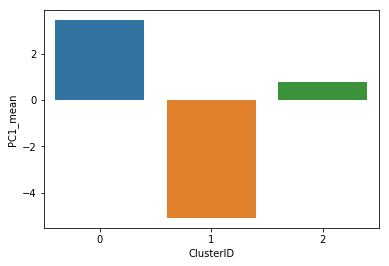

In [348]:
sns.barplot(x=df.ClusterID, y=df.PC1_mean)
plt.show()

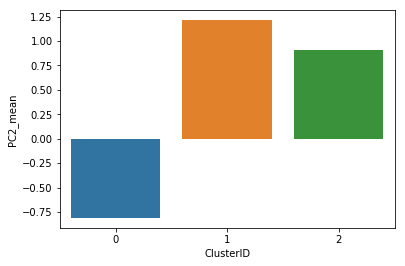

In [349]:
sns.barplot(x=df.ClusterID, y=df.PC2_mean)
plt.show()

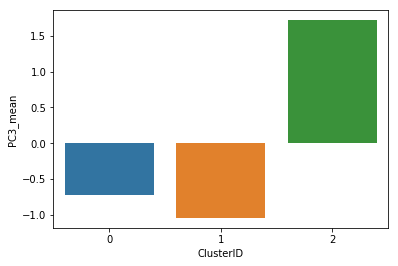

In [350]:
sns.barplot(x=df.ClusterID, y=df.PC3_mean)
plt.show()

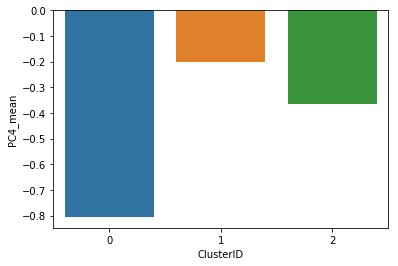

In [351]:
sns.barplot(x=df.ClusterID, y=df.PC4_mean)
plt.show()

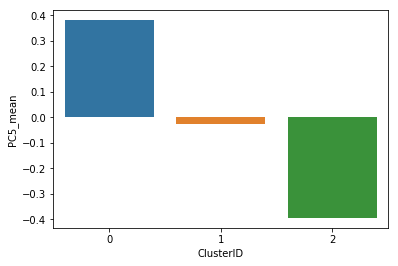

In [352]:
sns.barplot(x=df.ClusterID, y=df.PC5_mean)
plt.show()

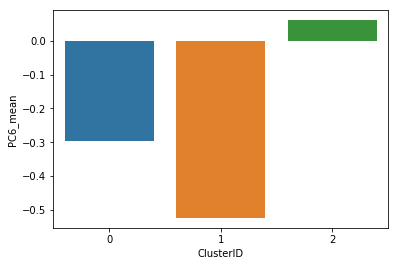

In [353]:
sns.barplot(x=df.ClusterID, y=df.PC6_mean)
plt.show()

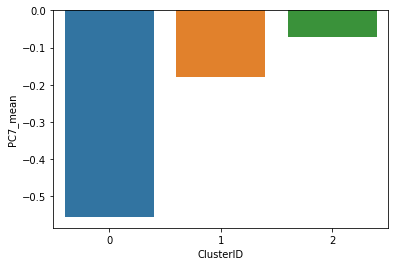

In [354]:
sns.barplot(x=df.ClusterID, y=df.PC7_mean)
plt.show()

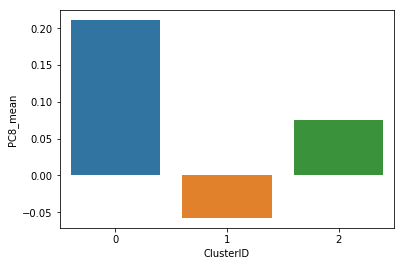

In [355]:
sns.barplot(x=df.ClusterID, y=df.PC8_mean)
plt.show()

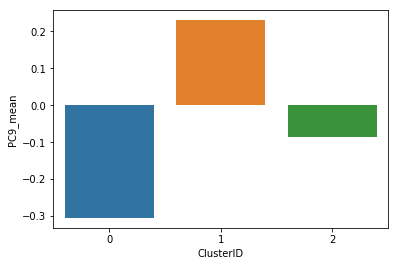

In [356]:
sns.barplot(x=df.ClusterID, y=df.PC9_mean)
plt.show()

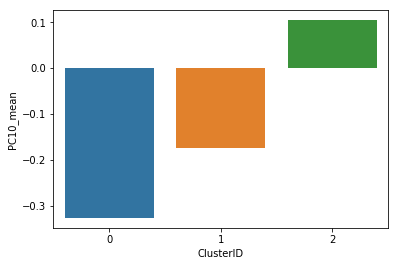

In [357]:
sns.barplot(x=df.ClusterID, y=df.PC10_mean)
plt.show()

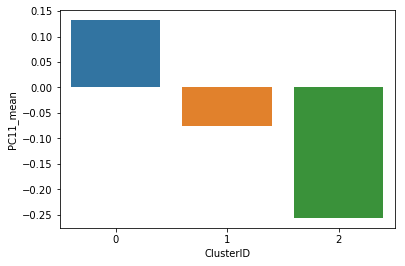

In [358]:
sns.barplot(x=df.ClusterID, y=df.PC11_mean)
plt.show()

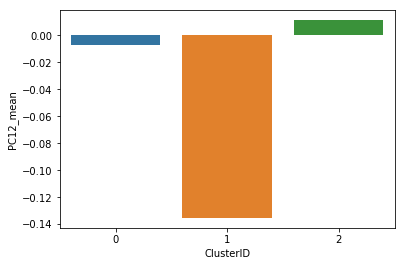

In [359]:
sns.barplot(x=df.ClusterID, y=df.PC12_mean)
plt.show()

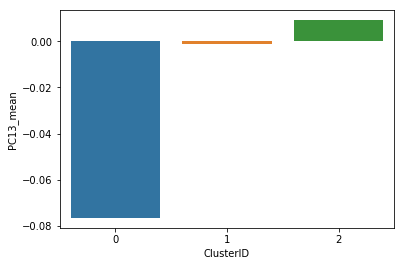

In [360]:
sns.barplot(x=df.ClusterID, y=df.PC13_mean)
plt.show()

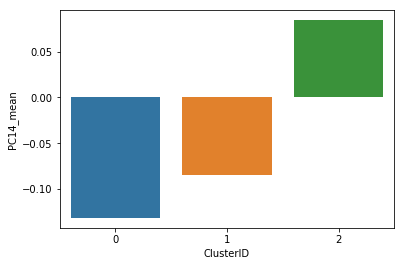

In [361]:
sns.barplot(x=df.ClusterID, y=df.PC14_mean)
plt.show()

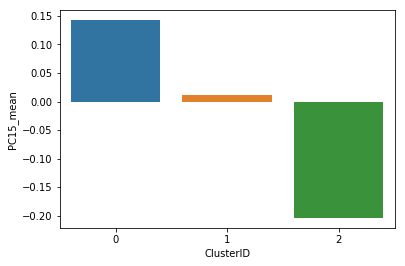

In [362]:
sns.barplot(x=df.ClusterID, y=df.PC15_mean)
plt.show()

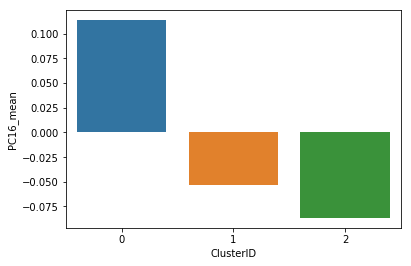

In [363]:
sns.barplot(x=df.ClusterID, y=df.PC16_mean)
plt.show()

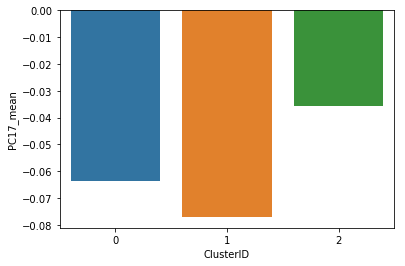

In [364]:
sns.barplot(x=df.ClusterID, y=df.PC17_mean)
plt.show()

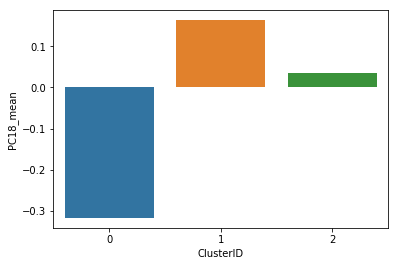

In [365]:
sns.barplot(x=df.ClusterID, y=df.PC18_mean)
plt.show()

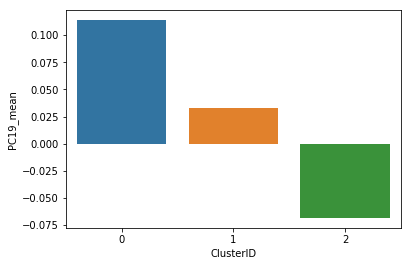

In [366]:
sns.barplot(x=df.ClusterID, y=df.PC19_mean)
plt.show()

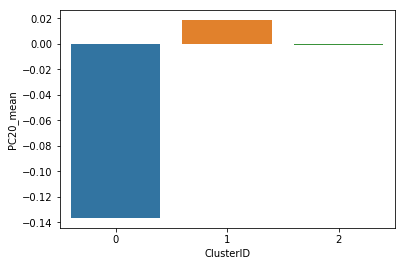

In [367]:
sns.barplot(x=df.ClusterID, y=df.PC20_mean)
plt.show()

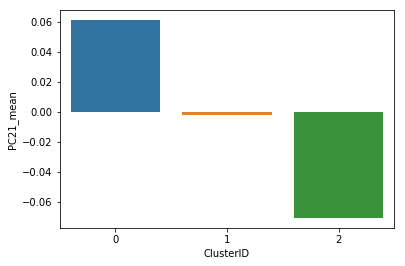

In [368]:
sns.barplot(x=df.ClusterID, y=df.PC21_mean)
plt.show()

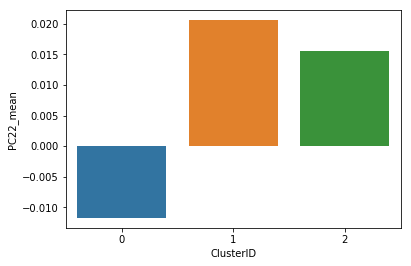

In [369]:
sns.barplot(x=df.ClusterID, y=df.PC22_mean)
plt.show()

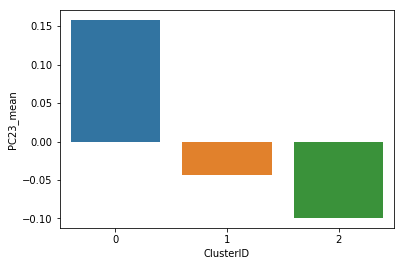

In [370]:
sns.barplot(x=df.ClusterID, y=df.PC23_mean)
plt.show()

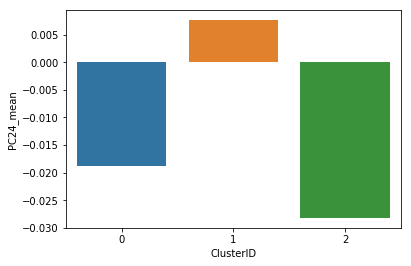

In [371]:
sns.barplot(x=df.ClusterID, y=df.PC24_mean)
plt.show()

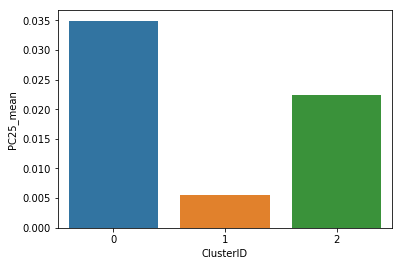

In [372]:
sns.barplot(x=df.ClusterID, y=df.PC25_mean)
plt.show()

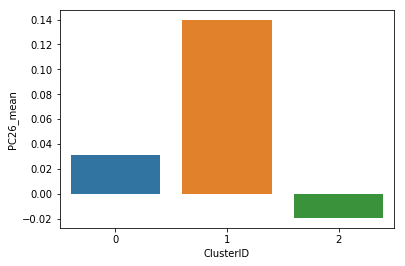

In [373]:
sns.barplot(x=df.ClusterID, y=df.PC26_mean)
plt.show()

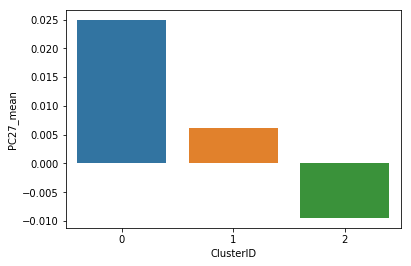

In [374]:
sns.barplot(x=df.ClusterID, y=df.PC27_mean)
plt.show()

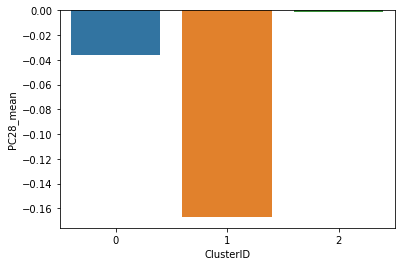

In [375]:
sns.barplot(x=df.ClusterID, y=df.PC28_mean)
plt.show()

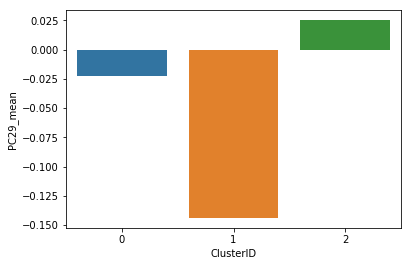

In [376]:
sns.barplot(x=df.ClusterID, y=df.PC29_mean)
plt.show()

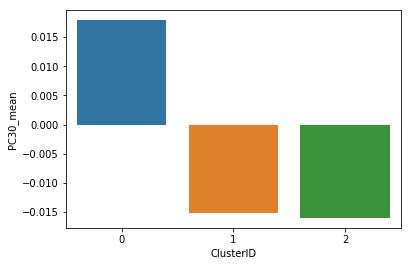

In [377]:
sns.barplot(x=df.ClusterID, y=df.PC30_mean)
plt.show()

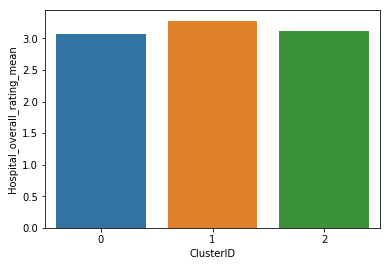

In [378]:
sns.barplot(x=df.ClusterID, y=df.Hospital_overall_rating_mean)
plt.show()

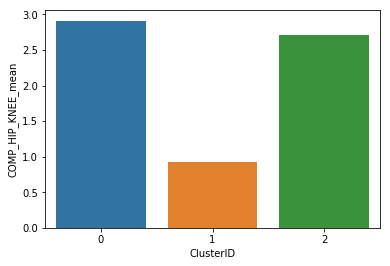

In [379]:
sns.barplot(x=df.ClusterID, y=df.COMP_HIP_KNEE_mean)
plt.show()

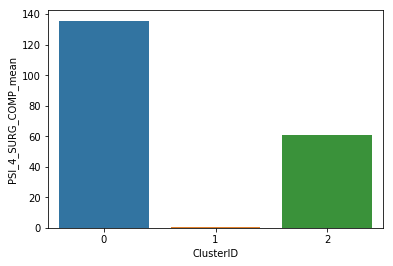

In [380]:
sns.barplot(x=df.ClusterID, y=df.PSI_4_SURG_COMP_mean)
plt.show()

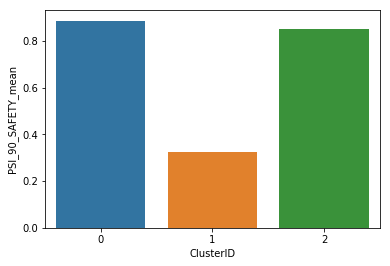

In [381]:
sns.barplot(x=df.ClusterID, y=df.PSI_90_SAFETY_mean)
plt.show()

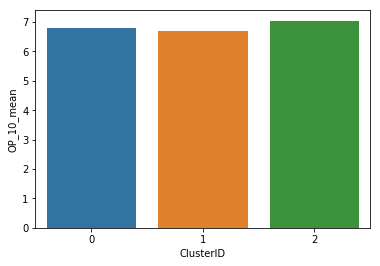

In [382]:
sns.barplot(x=df.ClusterID, y=df.OP_10_mean)
plt.show()

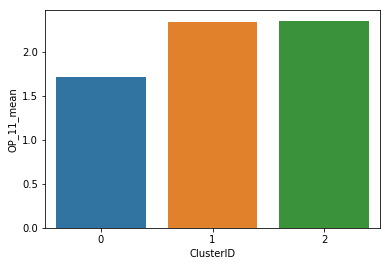

In [383]:
sns.barplot(x=df.ClusterID, y=df.OP_11_mean)
plt.show()

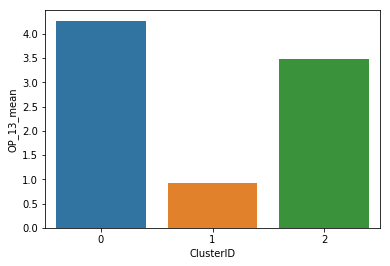

In [384]:
sns.barplot(x=df.ClusterID, y=df.OP_13_mean)
plt.show()

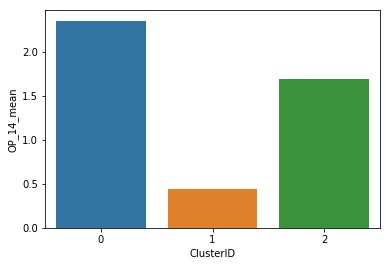

In [385]:
sns.barplot(x=df.ClusterID, y=df.OP_14_mean)
plt.show()

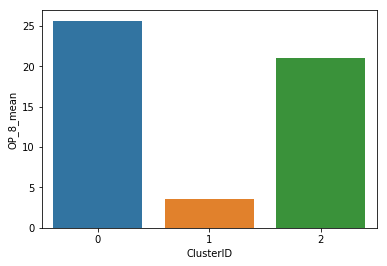

In [386]:
sns.barplot(x=df.ClusterID, y=df.OP_8_mean)
plt.show()

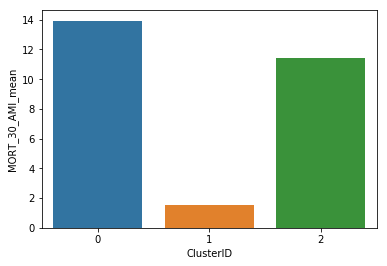

In [387]:
sns.barplot(x=df.ClusterID, y=df.MORT_30_AMI_mean)
plt.show()

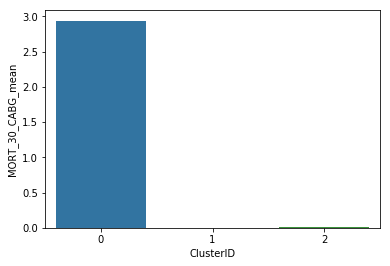

In [388]:
sns.barplot(x=df.ClusterID, y=df.MORT_30_CABG_mean)
plt.show()

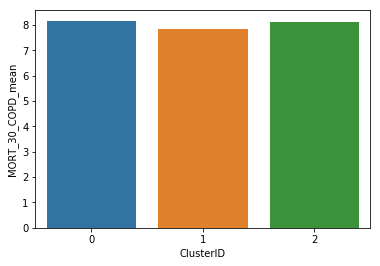

In [389]:
sns.barplot(x=df.ClusterID, y=df.MORT_30_COPD_mean)
plt.show()

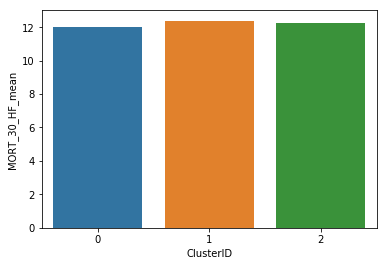

In [390]:
sns.barplot(x=df.ClusterID, y=df.MORT_30_HF_mean)
plt.show()

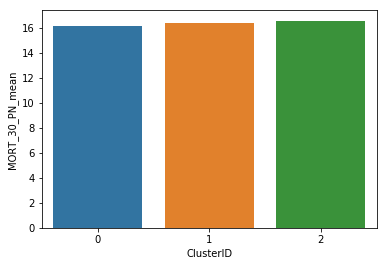

In [391]:
sns.barplot(x=df.ClusterID, y=df.MORT_30_PN_mean)
plt.show()

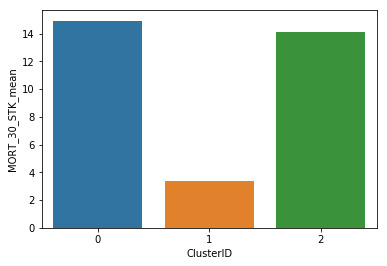

In [392]:
sns.barplot(x=df.ClusterID, y=df.MORT_30_STK_mean)
plt.show()

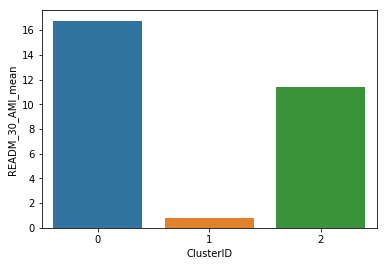

In [393]:
sns.barplot(x=df.ClusterID, y=df.READM_30_AMI_mean)
plt.show()

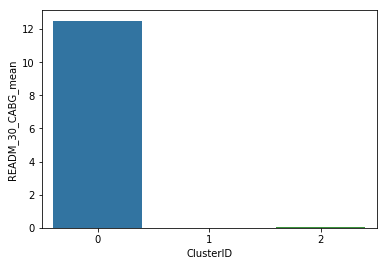

In [394]:
sns.barplot(x=df.ClusterID, y=df.READM_30_CABG_mean)
plt.show()

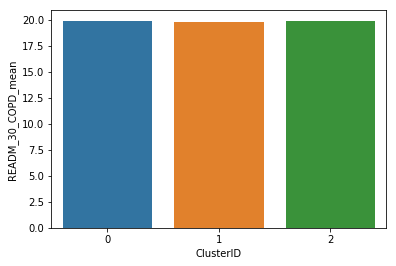

In [395]:
sns.barplot(x=df.ClusterID, y=df.READM_30_COPD_mean)
plt.show()

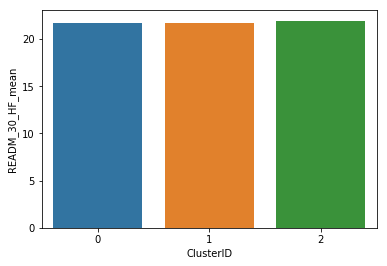

In [396]:
sns.barplot(x=df.ClusterID, y=df.READM_30_HF_mean)
plt.show()

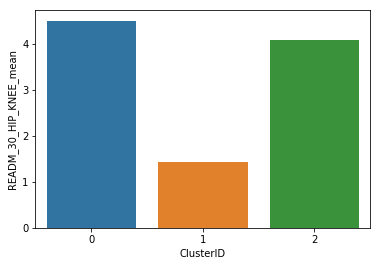

In [397]:
sns.barplot(x=df.ClusterID, y=df.READM_30_HIP_KNEE_mean)
plt.show()

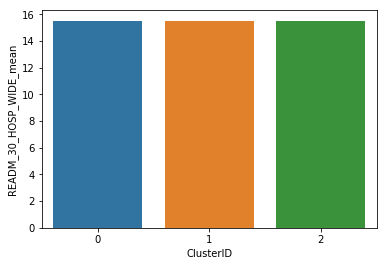

In [398]:
sns.barplot(x=df.ClusterID, y=df.READM_30_HOSP_WIDE_mean)
plt.show()

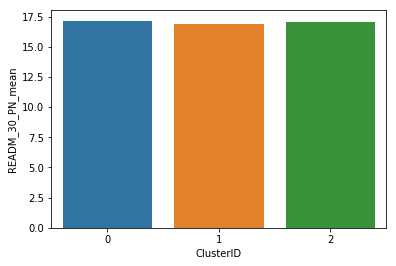

In [399]:
sns.barplot(x=df.ClusterID, y=df.READM_30_PN_mean)
plt.show()

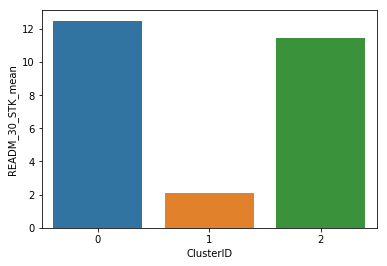

In [400]:
sns.barplot(x=df.ClusterID, y=df.READM_30_STK_mean)
plt.show()

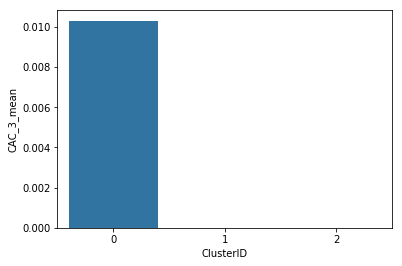

In [401]:
sns.barplot(x=df.ClusterID, y=df.CAC_3_mean)
plt.show()

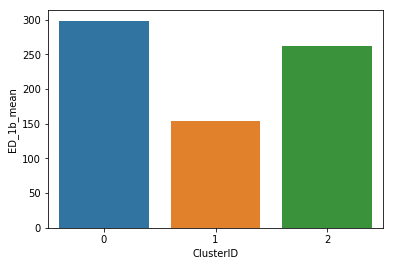

In [402]:
sns.barplot(x=df.ClusterID, y=df.ED_1b_mean)
plt.show()

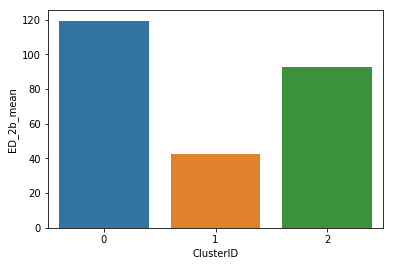

In [403]:
sns.barplot(x=df.ClusterID, y=df.ED_2b_mean)
plt.show()

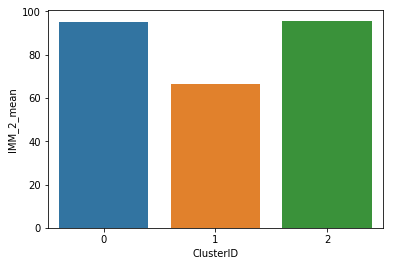

In [404]:
sns.barplot(x=df.ClusterID, y=df.IMM_2_mean)
plt.show()

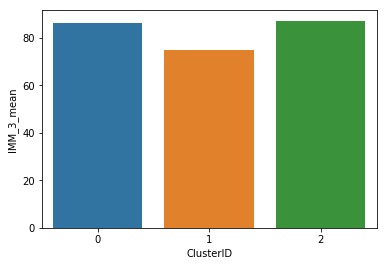

In [405]:
sns.barplot(x=df.ClusterID, y=df.IMM_3_mean)
plt.show()

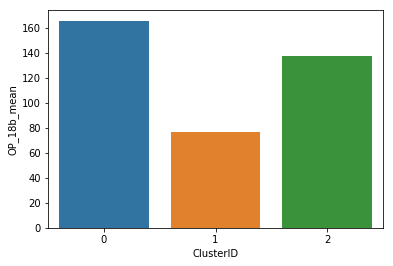

In [406]:
sns.barplot(x=df.ClusterID, y=df.OP_18b_mean)
plt.show()

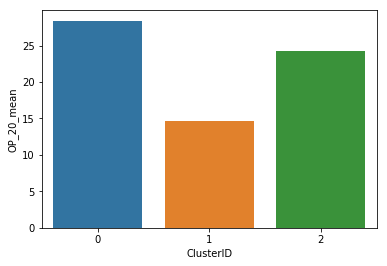

In [407]:
sns.barplot(x=df.ClusterID, y=df.OP_20_mean)
plt.show()

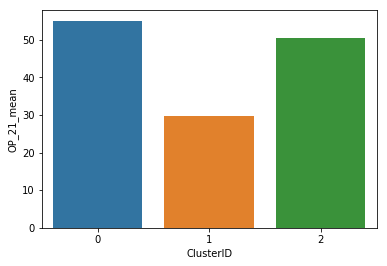

In [408]:
sns.barplot(x=df.ClusterID, y=df.OP_21_mean)
plt.show()

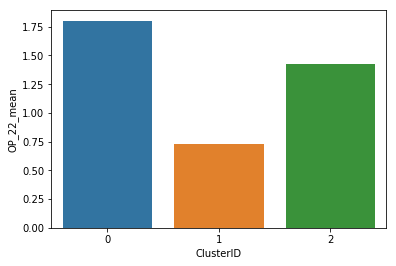

In [409]:
sns.barplot(x=df.ClusterID, y=df.OP_22_mean)
plt.show()

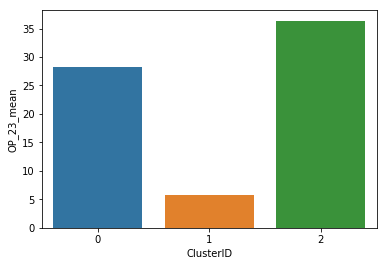

In [410]:
sns.barplot(x=df.ClusterID, y=df.OP_23_mean)
plt.show()

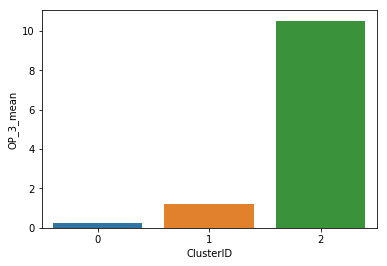

In [411]:
sns.barplot(x=df.ClusterID, y=df.OP_3_mean)
plt.show()

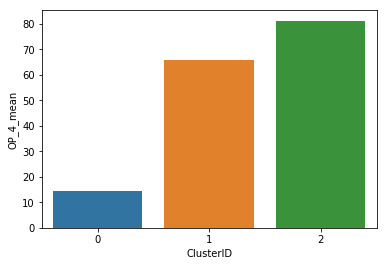

In [412]:
sns.barplot(x=df.ClusterID, y=df.OP_4_mean)
plt.show()

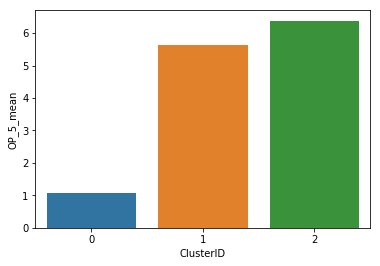

In [413]:
sns.barplot(x=df.ClusterID, y=df.OP_5_mean)
plt.show()

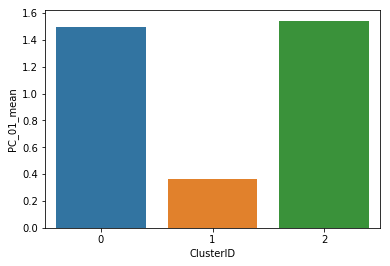

In [414]:
sns.barplot(x=df.ClusterID, y=df.PC_01_mean)
plt.show()

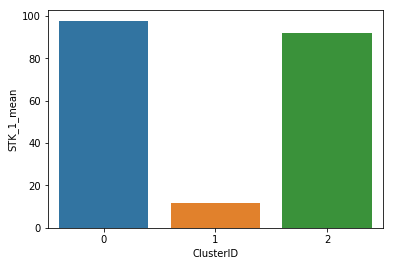

In [415]:
sns.barplot(x=df.ClusterID, y=df.STK_1_mean)
plt.show()

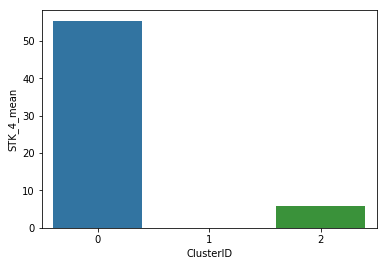

In [416]:
sns.barplot(x=df.ClusterID, y=df.STK_4_mean)
plt.show()

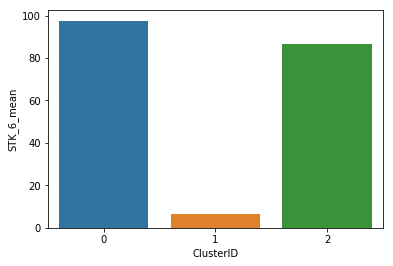

In [417]:
sns.barplot(x=df.ClusterID, y=df.STK_6_mean)
plt.show()

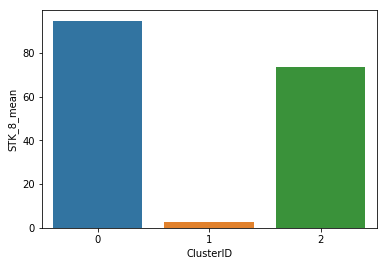

In [418]:
sns.barplot(x=df.ClusterID, y=df.STK_8_mean)
plt.show()

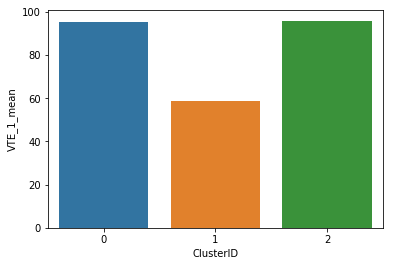

In [419]:
sns.barplot(x=df.ClusterID, y=df.VTE_1_mean)
plt.show()

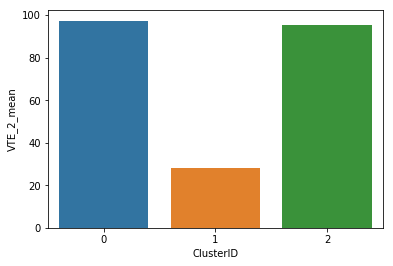

In [420]:
sns.barplot(x=df.ClusterID, y=df.VTE_2_mean)
plt.show()

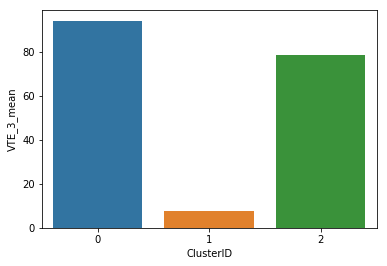

In [421]:
sns.barplot(x=df.ClusterID, y=df.VTE_3_mean)
plt.show()

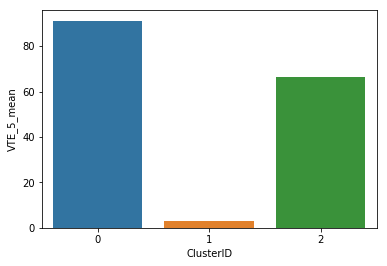

In [422]:
sns.barplot(x=df.ClusterID, y=df.VTE_5_mean)
plt.show()

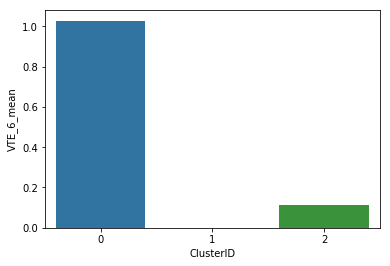

In [423]:
sns.barplot(x=df.ClusterID, y=df.VTE_6_mean)
plt.show()

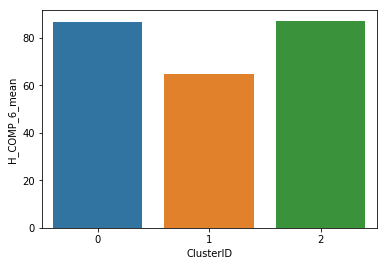

In [424]:
sns.barplot(x=df.ClusterID, y=df.H_COMP_6_mean)
plt.show()

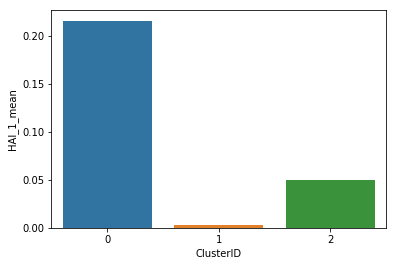

In [425]:
sns.barplot(x=df.ClusterID, y=df.HAI_1_mean)
plt.show()

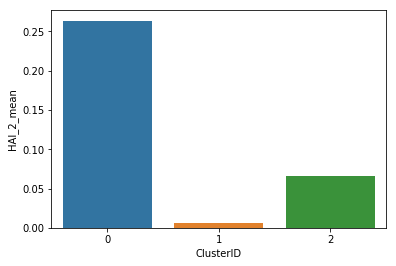

In [426]:
sns.barplot(x=df.ClusterID, y=df.HAI_2_mean)
plt.show()

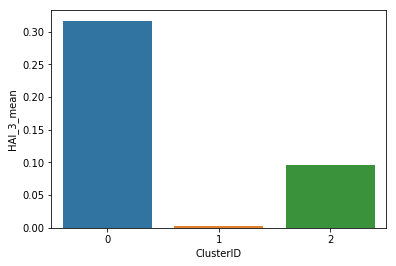

In [427]:
sns.barplot(x=df.ClusterID, y=df.HAI_3_mean)
plt.show()

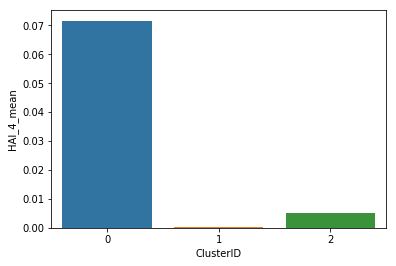

In [428]:
sns.barplot(x=df.ClusterID, y=df.HAI_4_mean)
plt.show()

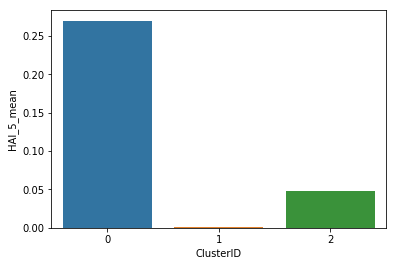

In [429]:
sns.barplot(x=df.ClusterID, y=df.HAI_5_mean)
plt.show()

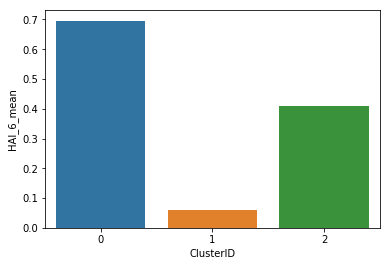

In [430]:
sns.barplot(x=df.ClusterID, y=df.HAI_6_mean)
plt.show()

Looks like Cluster 1 has the lowest values among others.

In [431]:
df1 = df_provider_clusterid.loc[df_provider_clusterid['ClusterID'] == 0]
result = pd.DataFrame(df1['Provider_ID'])
result

,Provider_ID
1,10006
4,10016
9,10033
16,10055
17,10056
27,10100
37,10139
43,20017
45,30002
46,30006


# Recommendations for Hospital

## Recommendation to EVANSTON HOSPITAL is to improve on below parameter in order to increrase the rating to atleast 4 by next year:

• Readmission (Hospital wide all cause unplanned readmission)

• Patient Experience (Discharge Information)

• Mortality (Pueumonia, Chronic Obstructive Pulmonary Disease, Heart Failure Mortality rate)

• Timeliness of Care (Median Time fo ED Dep for admitted ED patients)

• Effectiveness of Care (Influenza Immunization and Healtcare personnel Influenza Vaccination)

### Validate the Measure values for Evanston Hospital

In [432]:
df_evanston = df_final[df_final['Provider ID'] == 140010]

In [433]:
df_evanston_imp_measure = df_evanston[['READM_30_HOSP_WIDE','PSI_90_SAFETY','H_COMP_6','MORT_30_PN','READM_30_PN','READM_30_HF','MORT_30_HF','MORT_30_COPD','ED_2b','ED_1b']]


Let's check the score of Hospitals for the important Measures where Hospital Rating is atleast 4

In [434]:
df_4 = df_final[df_final['Hospital overall rating'] == 4]

In [435]:
df_4_imp_measure = df_4[['READM_30_HOSP_WIDE','PSI_90_SAFETY','H_COMP_6','MORT_30_PN','READM_30_PN','READM_30_HF','MORT_30_HF','MORT_30_COPD','ED_2b','ED_1b']]
df_4_imp_measure.describe()

,READM_30_HOSP_WIDE,PSI_90_SAFETY,H_COMP_6,MORT_30_PN,READM_30_PN,READM_30_HF,MORT_30_HF,MORT_30_COPD,ED_2b,ED_1b
count,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000
mean,15.040768,0.627905,85.733402,14.944917,15.855809,19.930913,11.028216,7.154149,77.406639,223.601660
std,0.935815,0.353005,16.364567,3.635570,3.484849,5.385253,3.288248,2.491830,54.109352,103.960308
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.700000,0.607500,87.000000,14.100000,15.600000,20.300000,10.800000,6.900000,47.000000,193.750000
50%,15.100000,0.760000,89.000000,15.400000,16.400000,21.200000,11.700000,7.700000,71.000000,232.000000
75%,15.500000,0.860000,91.000000,16.800000,17.200000,22.000000,12.700000,8.400000,103.000000,281.250000
max,17.300000,1.340000,99.000000,22.500000,21.800000,27.400000,17.900000,11.600000,567.000000,792.000000


Validate the score of Important Measure for Evanston Hospital

In [436]:
df_evanston_imp_measure

,READM_30_HOSP_WIDE,PSI_90_SAFETY,H_COMP_6,MORT_30_PN,READM_30_PN,READM_30_HF,MORT_30_HF,MORT_30_COPD,ED_2b,ED_1b
1124,15.2,1.45,84.0,13.0,16.6,21.2,9.5,5.7,76.0,245.0


## From the above values for important feature we can see that if Evanston Hospital improve on few measures, it can improve it's rating from 3 to 4 atleast

- PSI_90_SAFETY from 1.45 to 0.62
- H_COMP_6 from 84 to 85.7
- MORT_30_PN from 13 to 14.9
- READM_30_PN from 16.6 to 15.85
- READM_30_HF from 21.2 to 19.93
- MORT_30_HF from 9.5 to 11.02
- MORT_30_COPD from 5.7 to 7.1
- ED_2b FROM 76 to 77.4
- ED_1b from 245 to 223


## Hence, Evanston Hospital should improve on :
#### Safety
#### Re-admission
#### Mortality
#### Timeliness of Care